# Connect to google account

In [ ]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [ ]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# Global Variables

In [ ]:
import os
import numpy as np
import random
import torch

def reset_seeds(seed=52):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
  np.random.seed(seed)
  torch.manual_seed(seed) # cpu 연산 무작위 고정
  torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
  torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

In [ ]:
import easydict
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/ai_lecture 252/1. Machine Learning/data/telco/'
args.train_csv = args.default_path+'train.csv'

# 데이터 분석을 위한 변수들
args.random_state = 52
args.results = []

# 1. 파일 로드

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

In [ ]:
df = pd.read_csv(args.train_csv)

df.shape

(7043, 21)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85       108.15   Yes
3  7795-CFOCW    Male              0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30      1840.75    No
4  9237-HQITU  Female              0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70       151.65   Yes

## 데이터 컬럼 설명

| **컬럼**          | **설명**                                               | **타입**              | **범주 값**                                                 | **역할**                                                   |
|-------------------|--------------------------------------------------------|-----------------------|-------------------------------------------------------------|------------------------------------------------------------|
| `customerID`      | 각 고객을 고유하게 식별할 수 있는 고객 ID                | 문자열 (범주형)         | -                                                           | 고객별로 데이터를 구분하기 위한 식별자                     |
| `gender`          | 고객의 성별                                             | 문자열 (범주형)         | `Male`, `Female`                                             | 성별에 따른 이탈율 차이를 분석할 수 있습니다.              |
| `SeniorCitizen`   | 고객이 고령자인지 여부                                   | 정수형 (0 또는 1)       | `0` (고령자 아님), `1` (고령자)                             | 나이에 따른 이탈율 차이를 분석할 수 있습니다.              |
| `Partner`         | 고객이 배우자가 있는지 여부                              | 문자열 (범주형)         | `Yes`, `No`                                                  | 파트너 여부에 따른 이탈율 차이를 분석할 수 있습니다.       |
| `Dependents`      | 고객이 부양가족이 있는지 여부                            | 문자열 (범주형)         | `Yes`, `No`                                                  | 부양 가족 여부에 따른 이탈율을 분석할 수 있습니다.         |
| `tenure`          | 서비스 이용 기간 (개월)                                  | 정수형 (수치형)         | -                                                           | 가입 기간에 따른 이탈율을 분석할 수 있습니다.              |
| `PhoneService`    | 전화 서비스 이용 여부                                    | 문자열 (범주형)         | `Yes`, `No`                                                  | 전화 서비스 이용 여부에 따른 이탈율을 분석할 수 있습니다.  |
| `MultipleLines`   | 여러 전화선 사용 여부                                    | 문자열 (범주형)         | `Yes`, `No`, `No phone service`                             | 여러 전화선 사용 여부에 따른 이탈율을 분석할 수 있습니다.  |
| `InternetService` | 인터넷 서비스 유형                                       | 문자열 (범주형)         | `DSL`, `Fiber optic`, `No`                                   | 인터넷 서비스 종류에 따른 이탈율 차이를 분석할 수 있습니다.|
| `OnlineSecurity`  | 온라인 보안 서비스 가입 여부                              | 문자열 (범주형)         | `Yes`, `No`, `No internet service`                           | 보안 서비스 가입 여부에 따른 이탈율을 분석할 수 있습니다.  |
| `OnlineBackup`    | 온라인 백업 서비스 사용 여부                              | 문자열 (범주형)         | `Yes`, `No`, `No internet service`                           | 백업 서비스 사용 여부에 따른 이탈율을 분석할 수 있습니다.  |
| `DeviceProtection`| 디바이스 보호 서비스 사용 여부                            | 문자열 (범주형)         | `Yes`, `No`, `No internet service`                           | 디바이스 보호 서비스 사용 여부에 따른 이탈율을 분석할 수 있습니다.|
| `TechSupport`     | 기술 지원 서비스 사용 여부                                | 문자열 (범주형)         | `Yes`, `No`, `No internet service`                           | 기술 지원 서비스 가입 여부에 따른 이탈율을 분석할 수 있습니다.|
| `StreamingTV`     | 스트리밍 TV 서비스 사용 여부                              | 문자열 (범주형)         | `Yes`, `No`, `No internet service`                           | 스트리밍 TV 서비스 사용 여부에 따른 이탈율을 분석할 수 있습니다.|
| `StreamingMovies` | 스트리밍 영화 서비스 사용 여부                            | 문자열 (범주형)         | `Yes`, `No`, `No internet service`                           | 스트리밍 영화 서비스 사용 여부에 따른 이탈율을 분석할 수 있습니다.|
| `Contract`        | 계약 유형                                                | 문자열 (범주형)         | `Month-to-month`, `One year`, `Two year`                     | 계약 기간에 따른 이탈율을 분석할 수 있습니다.              |
| `PaperlessBilling`| 종이 없는 청구서 사용 여부                                | 문자열 (범주형)         | `Yes`, `No`                                                  | 온라인 청구서 사용 여부에 따른 이탈율을 분석할 수 있습니다.|
| `PaymentMethod`   | 결제 방식                                                | 문자열 (범주형)         | `Electronic check`, `Mailed check`, `Bank transfer (automatic)`, `Credit card (automatic)`| 결제 방식에 따른 이탈율 차이를 분석할 수 있습니다. |
| `MonthlyCharges`  | 매월 청구 금액                                           | 수치형 (float)         | -                                                           | 월 청구 금액에 따른 이탈율을 분석할 수 있습니다.           |
| `TotalCharges`    | 총 청구 금액                                             | 수치형 (float)         | -                                                           | 누적 청구 금액에 따른 이탈율을 분석할 수 있습니다.         |
| `Churn`           | 고객의 서비스 해지 여부                                   | 문자열 (범주형)         | `Yes`, `No`                                                  | 이탈(Churn)을 예측하는 타겟 변수                          |


# 2. 데이터 전처리

In [ ]:
# nunique 결과 저장
nunique_values = df.nunique()

# info 결과를 DataFrame으로 저장
info_df = pd.DataFrame({
    'Column': df.columns,
    'DataType': df.dtypes,
    'NonNullCount': df.count(),
    'UniqueValues': nunique_values
})

# nunique와 info 결과를 함께 출력
print(info_df)

                            Column DataType  NonNullCount  UniqueValues
customerID              customerID   object          7043          7043
gender                      gender   object          7043             2
SeniorCitizen        SeniorCitizen    int64          7043             2
Partner                    Partner   object          7043             2
Dependents              Dependents   object          7043             2
tenure                      tenure    int64          7043            73
PhoneService          PhoneService   object          7043             2
MultipleLines        MultipleLines   object          7043             3
InternetService    InternetService   object          7043             3
OnlineSecurity      OnlineSecurity   object          7043             3
OnlineBackup          OnlineBackup   object          7043             3
DeviceProtection  DeviceProtection   object          7043             3
TechSupport            TechSupport   object          7043       

- 변환할 변수:
  - SeniorCitizen (고유값: 2) → 범주형으로 변환
  - TotalCharges: 현재 object 타입이므로, **수치형(float)**으로 변환하는 것이 적합


## TotalCharges 컬럼 수치형으로 변환

In [ ]:
# 'TotalCharges' 컬럼을 수치형(float)으로 변환하는 코드
# 숫자가 아닌 값 또는 오류는 NaN으로 처리
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# SeniorCitizen을 범주형으로 변환
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

# 'TotalCharges'와 'SeniorCitizen' 컬럼의 결측값 개수 확인
missing_totalcharges = df['TotalCharges'].isnull().sum()
missing_seniorcitizen = df['SeniorCitizen'].isnull().sum()

print(f"TotalCharges 컬럼의 결측값 개수: {missing_totalcharges}")
print(f"SeniorCitizen 컬럼의 결측값 개수: {missing_seniorcitizen}")

# 데이터 타입 확인
print(df.dtypes)

TotalCharges 컬럼의 결측값 개수: 11
SeniorCitizen 컬럼의 결측값 개수: 0
customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object


- TotalCharges 컬럼의 결측값 처리 방안

    - 데이터 전처리 과정에서 `TotalCharges` 컬럼의 결측값이 11개 존재하는 것을 확인. 결측값을 처리하기 위해, 해당 컬럼의 값 분포를 시각화하여 평균으로 대체할지, 중위값으로 대체할지 결정.

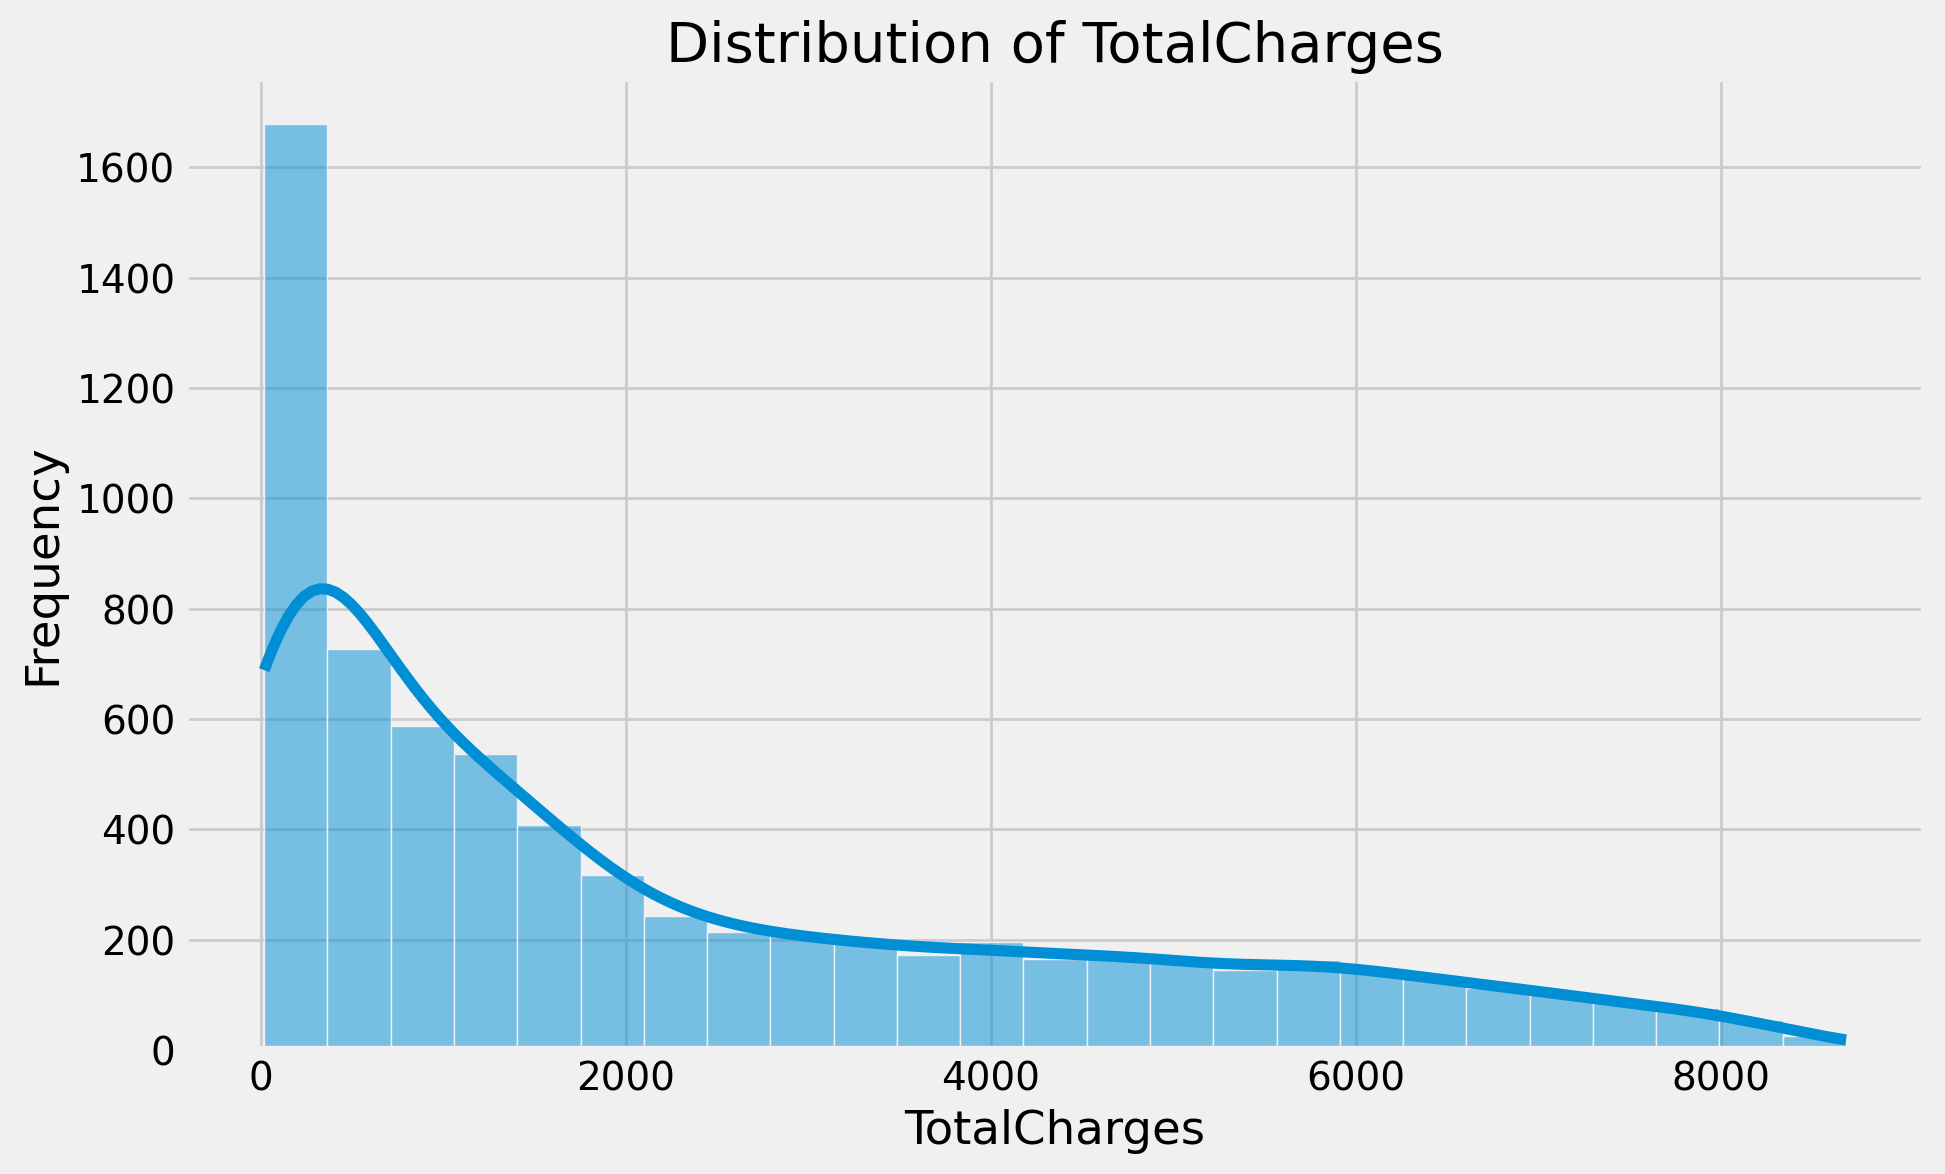

Mean of TotalCharges: 2283.3004408418656
Median of TotalCharges: 1397.475


In [ ]:
# TotalCharges 컬럼의 분포도 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'].dropna(), kde=True)
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 평균 및 중위값 계산
mean_totalcharges = df['TotalCharges'].mean()
median_totalcharges = df['TotalCharges'].median()

print(f"Mean of TotalCharges: {mean_totalcharges}")  # 평균값 출력
print(f"Median of TotalCharges: {median_totalcharges}")  # 중위값 출력

- 결측치 처리에 대한 결론:

    - 주어진 데이터에서 `TotalCharges` 컬럼의 결측치가 11개에 불과하다는 점을 고려하면, **평균값**으로 결측치를 대체하는 것이 합리적인 선택으로 보인다. 결측치가 전체 데이터에서 차지하는 비율이 매우 적기 때문에, 평균값으로 채워도 데이터 분포에 큰 영향을 미치지 않을 것이다.

    - 비록 `TotalCharges` 컬럼의 분포가 비대칭적일 수 있지만, 결측치의 수가 적으므로 평균값을 사용하여 대체하는 것이 적절한 방법이다.


In [ ]:
#  평균값으로 결측치를 대체
mean_totalcharges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_totalcharges, inplace=True)

# 결측치 처리 후 확인
print(f"Missing Value TotalCharges: {df['TotalCharges'].isnull().sum()}")

df[['TotalCharges']].head()

Missing Value TotalCharges: 0


TotalCharges
0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65

## 범주형 변수 카테고리형으로 변환

In [ ]:
# 범주형으로 변환할 컬럼 리스트
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# 각 컬럼을 카테고리형으로 변환
df[categorical_columns] = df[categorical_columns].astype('category')

# 변환 후 데이터 타입 확인
print(df.dtypes)

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object


In [ ]:
pd.set_option('display.max_columns', None)  # 모든 컬럼 출력
pd.set_option('display.expand_frame_repr', False)  # 데이터프레임을 줄바꿈 없이 한 줄로 출력
df.head(10)

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn
0  7590-VHVEG  Female             0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85         29.85    No
1  5575-GNVDE    Male             0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.50    No
2  3668-QPYBK    Male             0      No         No       2          Yes                No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85        108.15   Yes
3  7795-CFOCW    Male             0      No         No      45           No  No phone service             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30       1840.75    No
4  9237-HQITU  Female             0      No         No       2          Yes                No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70        151.65   Yes
5  9305-CDSKC  Female             0      No         No       8          Yes               Yes     Fiber optic             No           No              Yes          No         Yes             Yes  Month-to-month              Yes           Electronic check           99.65        820.50   Yes
6  1452-KIOVK    Male             0      No        Yes      22          Yes               Yes     Fiber optic             No          Yes               No          No         Yes              No  Month-to-month              Yes    Credit card (automatic)           89.10       1949.40    No
7  6713-OKOMC  Female             0      No         No      10           No  No phone service             DSL            Yes           No               No          No          No              No  Month-to-month               No               Mailed check           29.75        301.90    No
8  7892-POOKP  Female             0     Yes         No      28          Yes               Yes     Fiber optic             No           No              Yes         Yes         Yes             Yes  Month-to-month              Yes           Electronic check          104.80       3046.05   Yes
9  6388-TABGU    Male             0      No        Yes      62          Yes                No             DSL            Yes          Yes               No          No          No              No        One year               No  Bank transfer (automatic)           56.15       3487.95    No

# 3. 타겟 데이터 분석

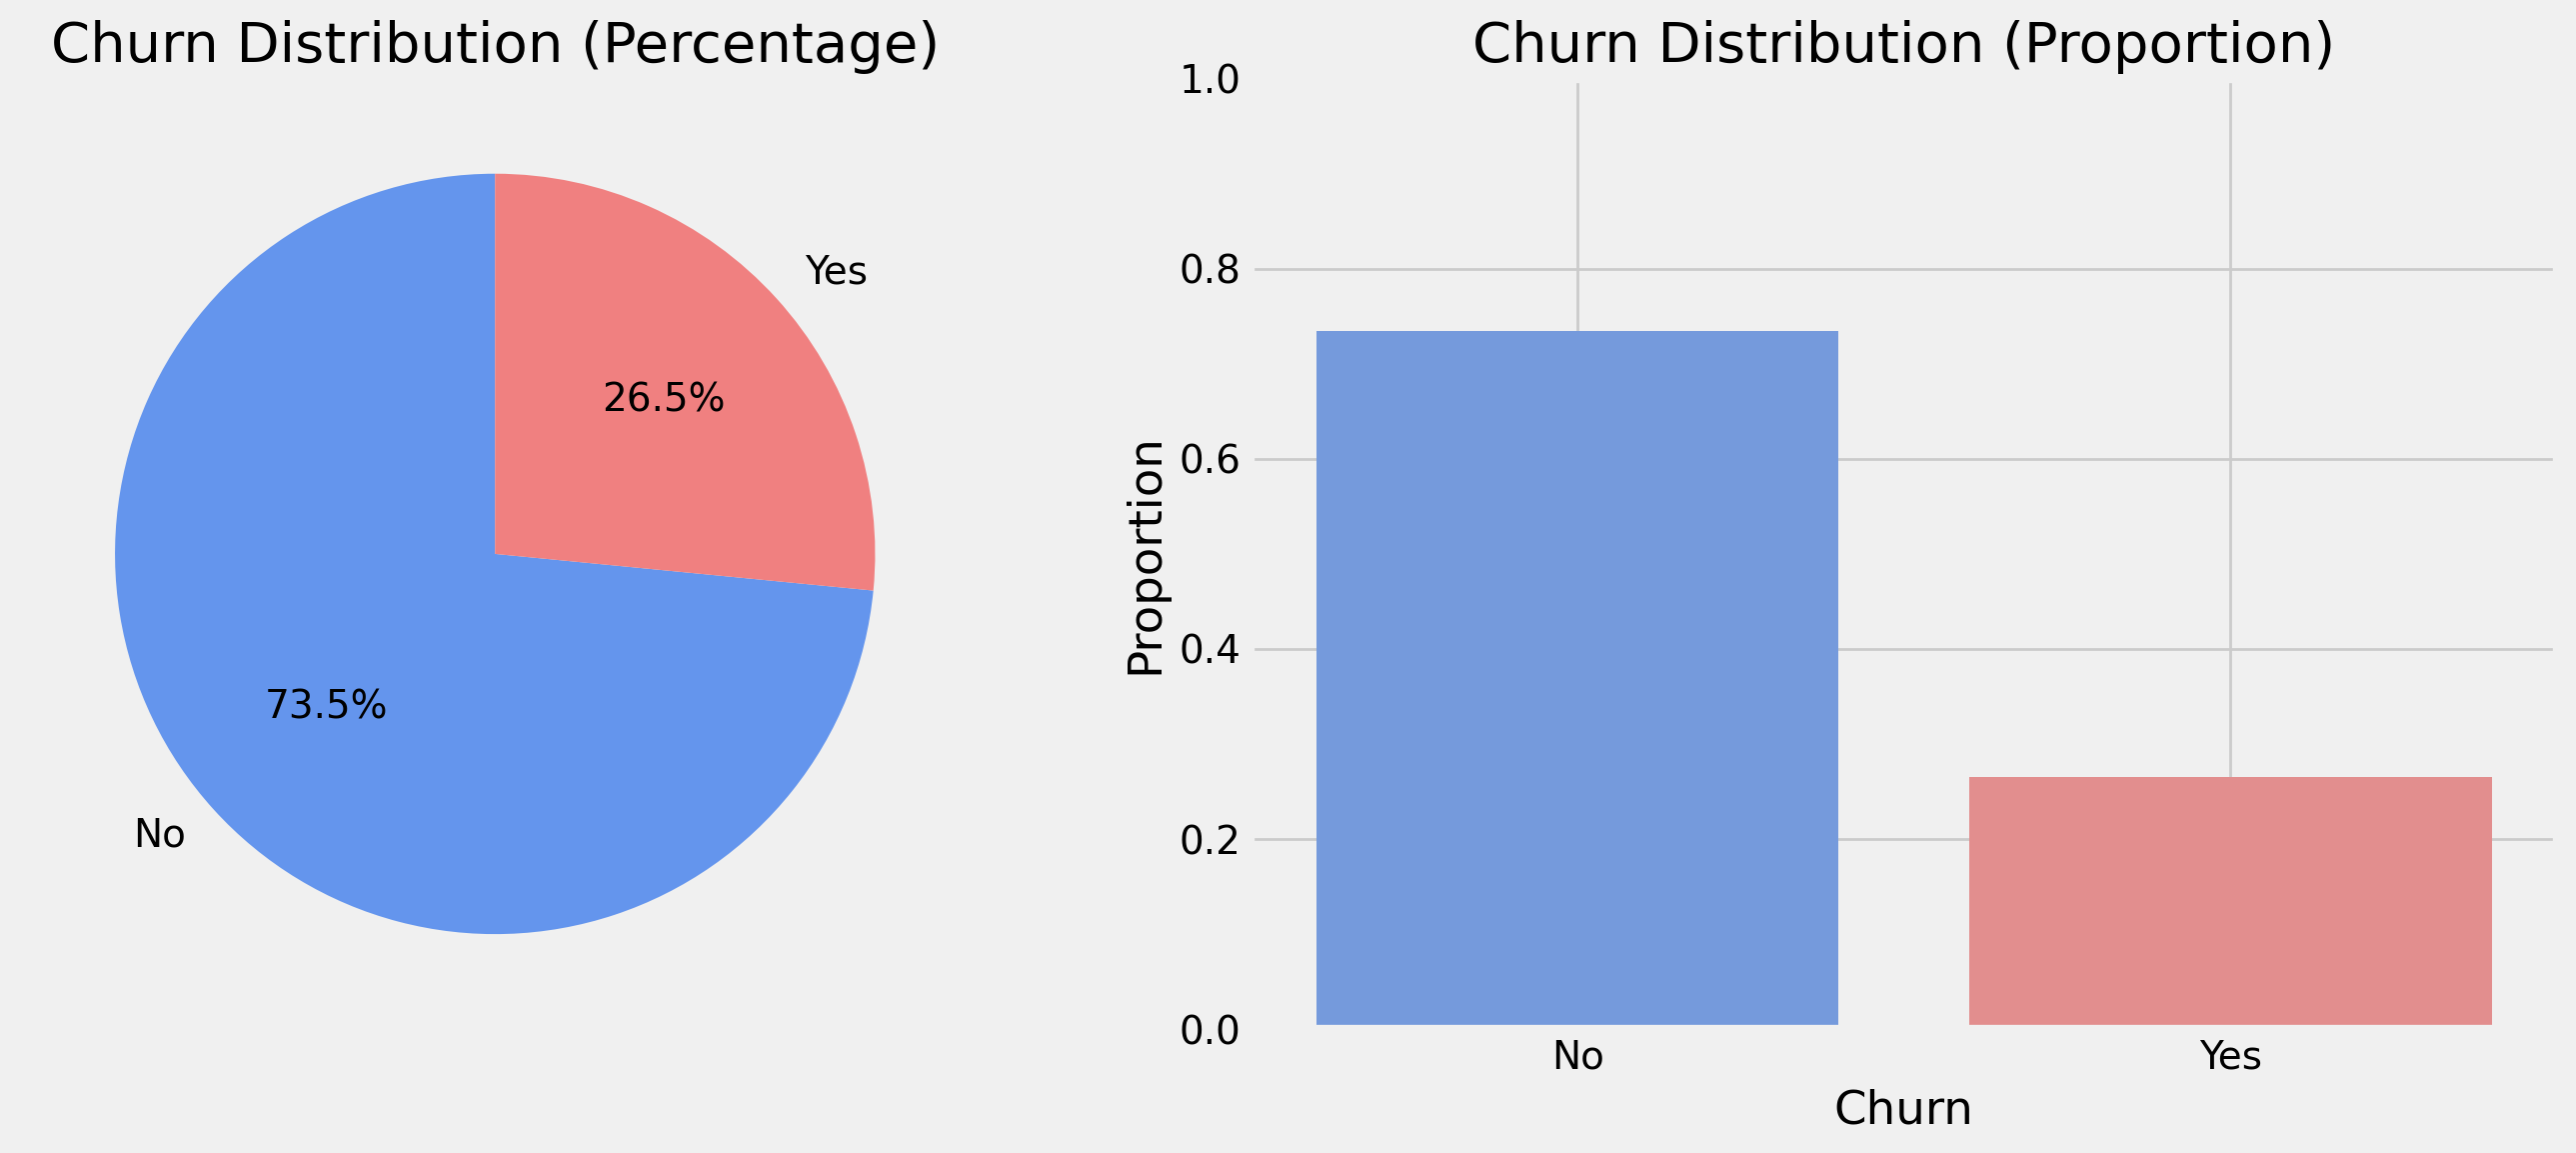

In [ ]:
# Churn 변수의 비율 계산
churn_counts = df['Churn'].value_counts()
churn_proportions = df['Churn'].value_counts(normalize=True)

colors = ['cornflowerblue', 'lightcoral']

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Churn Distribution (Percentage)')

plt.subplot(1, 2, 2)
sns.barplot(x=churn_proportions.index, y=churn_proportions.values, palette=colors, hue=churn_proportions.index, dodge=False)
plt.title('Churn Distribution (Proportion)')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.grid(True)

plt.tight_layout()
plt.show()


- 이탈한 고객과 이탈하지 않은 고객의 비율을 확인할 수 있습니다.
  - **이탈하지 않은 고객**: 전체 고객 중 약 **73.5%**를 차지하며, 다수의 고객이 서비스를 유지
  - **이탈한 고객**: 약 **26.5%**가 이탈하였으며, 이탈률이 상대적으로 적긴 하지만 서비스 개선이 필요
- 결론:
  - 전체적으로 이탈하지 않은 고객이 더 많지만, **26.5%**라는 이탈률은 무시할 수 없는 수치입니다. 이탈 고객을 줄이기 위해서는 추가적인 분석을 통해 **이탈 원인**을 찾아내고, 이를 바탕으로 **고객 유지 전략**을 강화하는 것이 중요

# 4. 수치형 데이터 분석

Basic Statistics for Numerical Data:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2265.000258
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1400.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


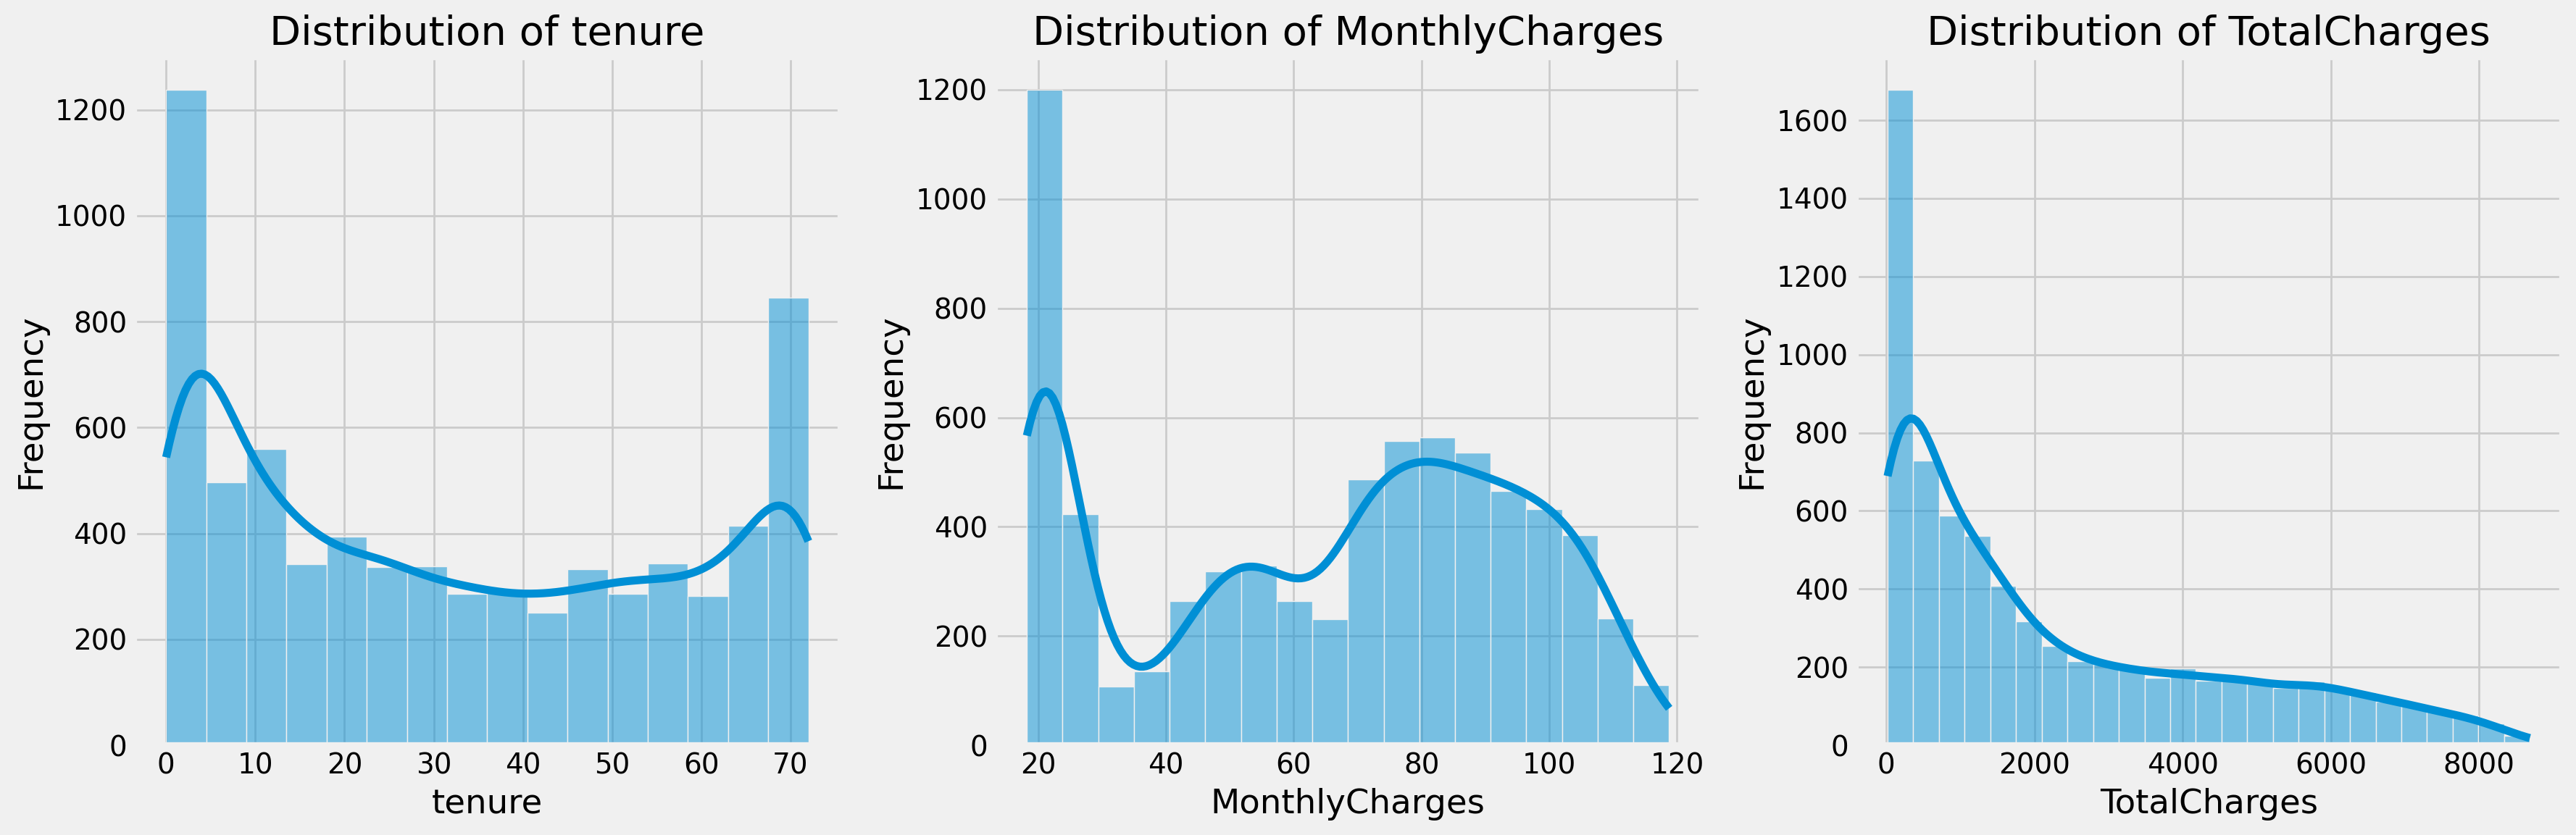

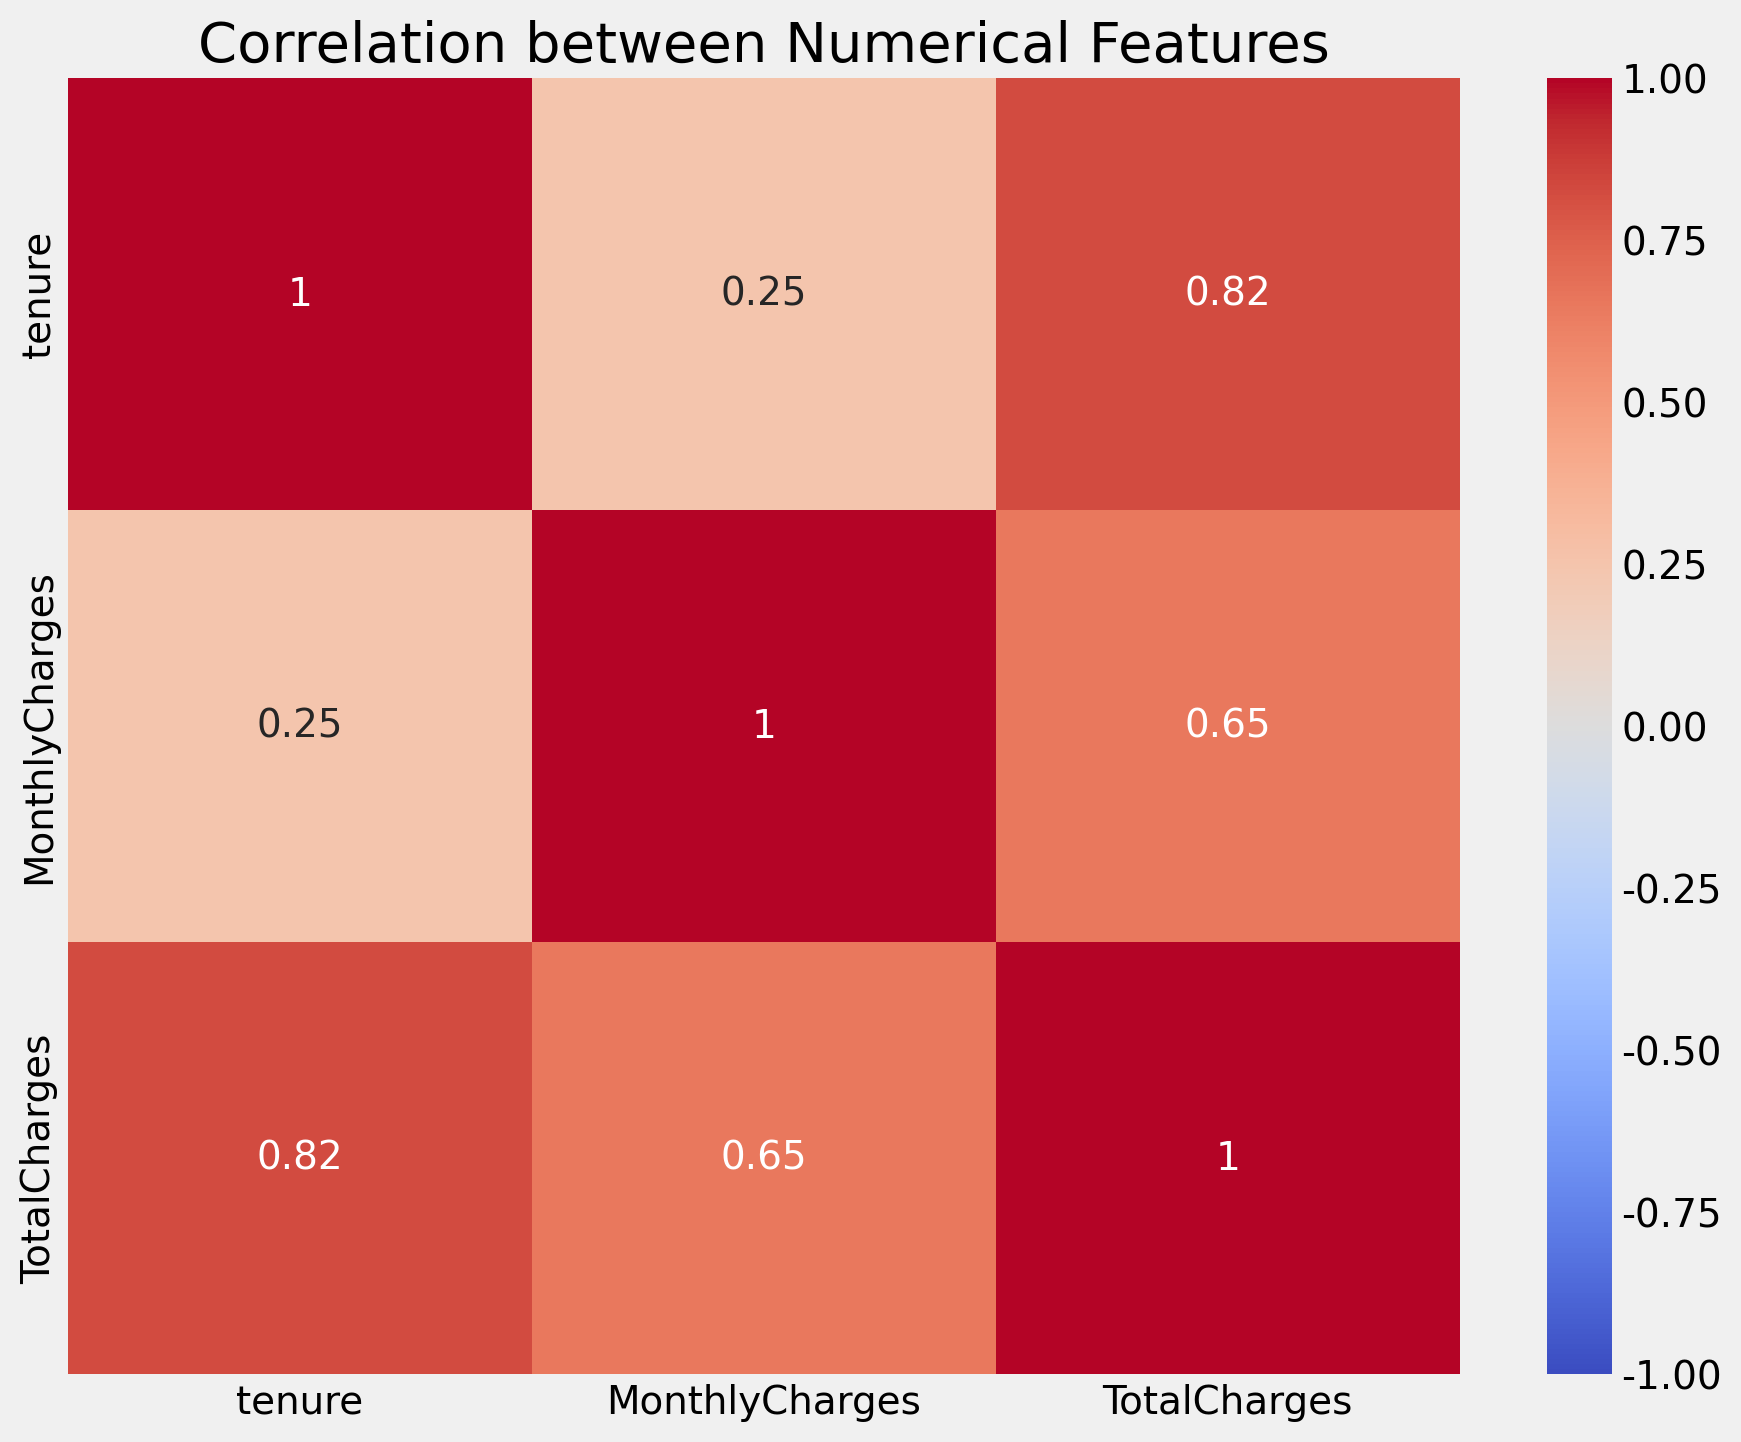

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

# 1. 기초 통계량 분석
print("Basic Statistics for Numerical Data:")
print(numerical_df.describe())

# 2. 수치형 변수들의 분포 시각화
plt.figure(figsize=(18, 6))  # 그래프 크기 조정
for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(1, 3, i)  # 1행 3열로 배치
    sns.histplot(numerical_df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

# 3. 상관관계 분석
correlation_matrix = numerical_df.corr()

# 4. 상관관계 히트맵 시각화 (크기 조정)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Numerical Features')
plt.show()

- 1. 수치형 변수들의 분포 분석:
  - **tenure** (서비스 이용 기간):
    - 데이터가 여러 구간에 고르게 분포되어 있으며, 일부 고객은 매우 짧은 이용 기간을 가진 반면, 긴 기간을 가진 고객도 많다.
    - 이 분포는 고객이 다양한 시점에서 서비스를 시작했음을 나타낸다.

  - **MonthlyCharges** (월 청구 금액):
    - 월 청구 금액은 약 20에서 120 사이에 걸쳐 있으며, 70~80 구간에 많은 고객이 집중되어 있다.
    - 이는 특정 요금제 구간에 고객들이 몰려있음을 의미하며, 요금제 간 가격 차이가 크지 않을 가능성이 존재함.

  - **TotalCharges** (총 청구 금액):
    - 총 청구 금액은 왼쪽 꼬리가 긴 분포(오른쪽으로 치우침)를 보이며, 많은 고객이 낮은 총 요금을 지불했다. 이는 주로 신규 고객이 많기 때문일 수 있다.
    - 서비스 가입 기간과 청구 금액 간에는 일정한 상관관계가 있을 것으로 추정

- 2. 수치형 변수 간의 상관관계 분석:
  - **TotalCharges와 tenure** (**강한 양의 상관관계**)
    - 이는 고객이 서비스를 더 오래 사용할수록 총 청구 금액이 증가하는 자연스러운 관계를 반영
    - **상관계수**가 매우 높으므로, 고객의 **가입 기간이 길수록 총 청구 금액이 많아짐**을 의미

  - **MonthlyCharges와 TotalCharges** (**중간 정도의 상관관계**)
    - 월 청구 금액이 높은 고객은 총 청구 금액도 높을 가능성이 있지만, 상관관계는 완벽하지는 않다. 이는 다양한 요금제나 할인 정책의 영향을 받을 수 있다.
    - 또는 신규유저가 많을수도 있다.
  
  - **MonthlyCharges와 tenure**:
    - 두 변수 간의 상관관계는 약하지만, 월 청구 금액이 높은 고객이 반드시 서비스 가입 기간이 긴 것은 아님


## VS Churn

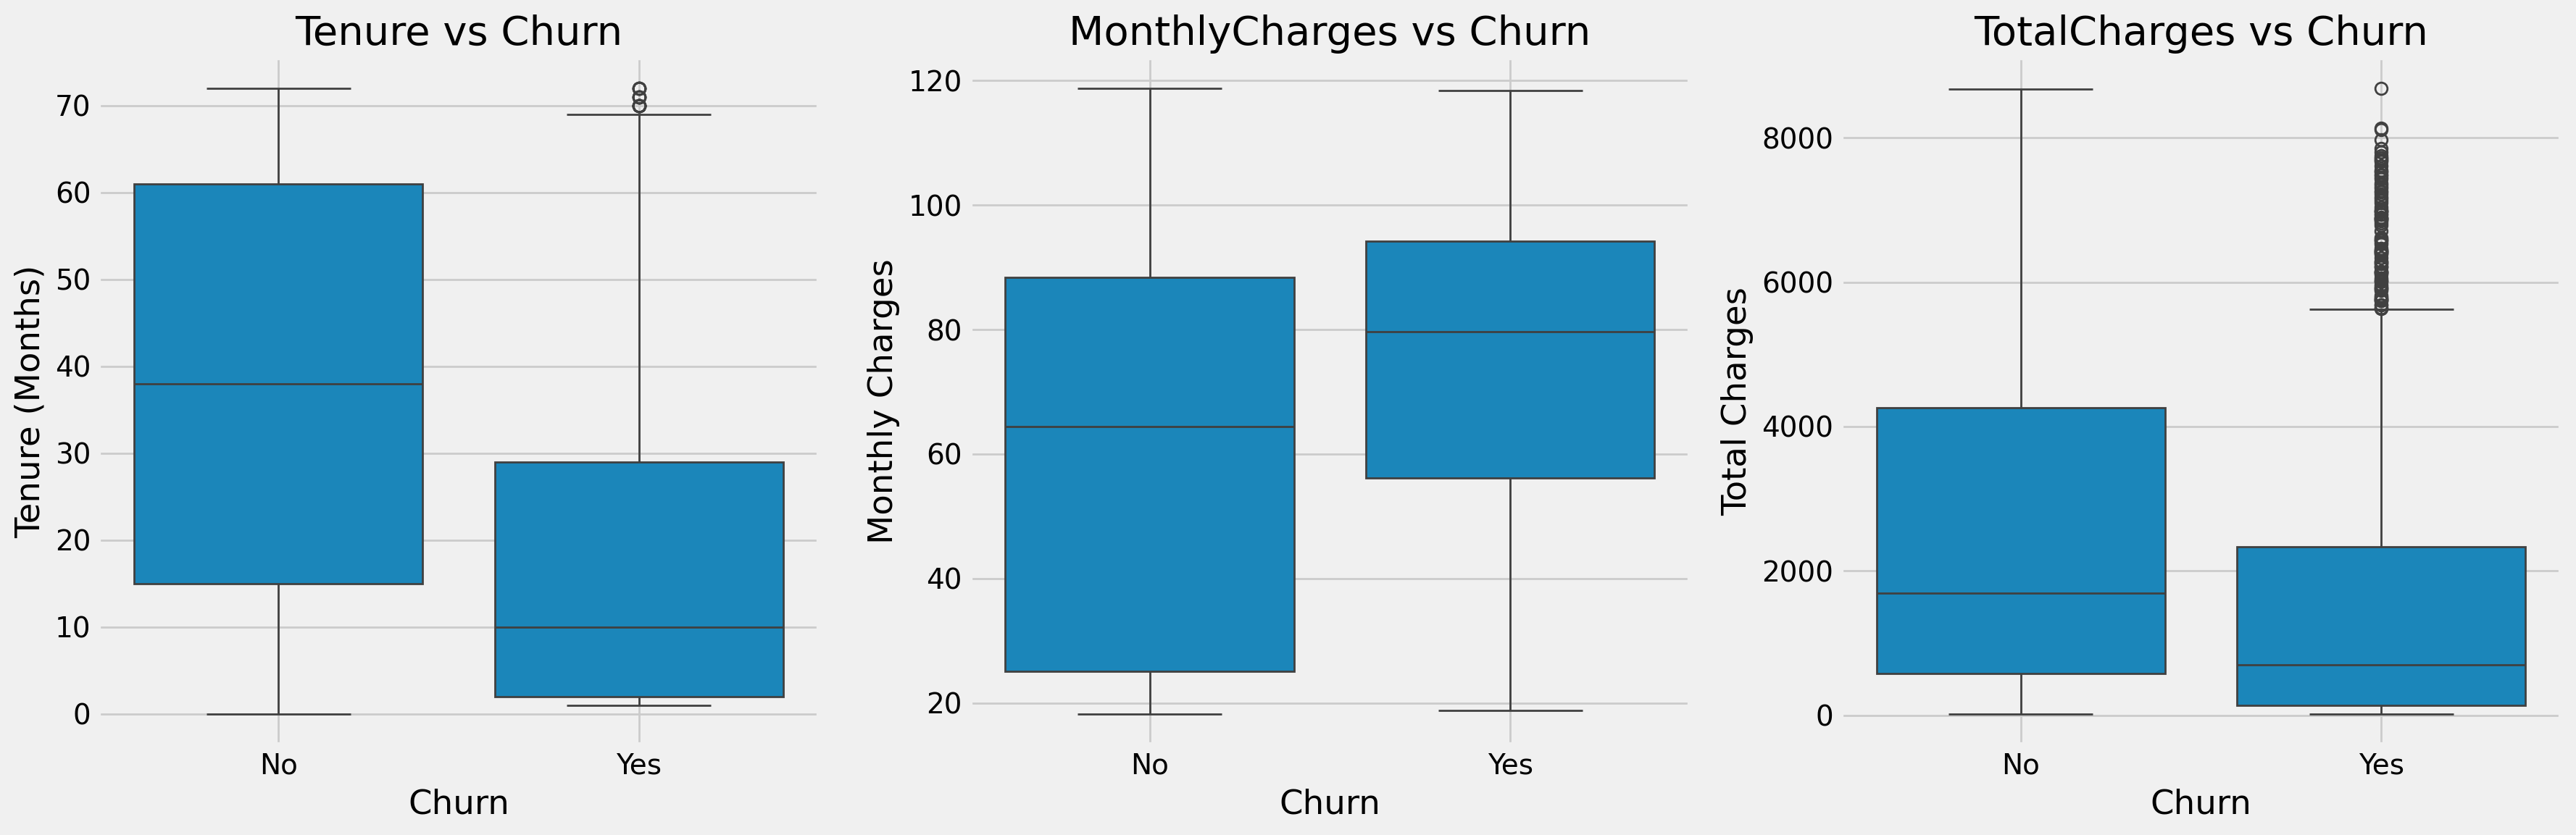

In [ ]:
plt.figure(figsize=(18, 6))

# 1. tenure vs Churn
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.grid(True)

# 2. MonthlyCharges vs Churn
plt.subplot(1, 3, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('MonthlyCharges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.grid(True)

# 3. TotalCharges vs Churn
plt.subplot(1, 3, 3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('TotalCharges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.grid(True)

plt.tight_layout()
plt.show()

### Boxplot 분석 결론

1. **Tenure vs Churn**:
   - **이탈한 고객**(Churn = Yes)은 **짧은 서비스 가입 기간(tenure)**을 가진다.
   - **이탈하지 않은 고객**(Churn = No)은 **가입 기간이 더 긴** 경향을 보여준다.
   - 따라서, **서비스 가입 기간이 짧은 고객이 이탈할 가능성이 높다**는 것을 보여준다.

2. **MonthlyCharges vs Churn**:
   - **이탈한 고객**은 월 청구 금액(MonthlyCharges)이 **상대적으로 높다**.
   - 반면, **이탈하지 않은 고객**은 **낮은 월 청구 금액**을 지불하는 경향을 보인다.
   - 이는 **고가 요금제** 이용자가 이탈할 가능성이 더 높다는 것을 나타낸다.

3. **TotalCharges vs Churn**:
   - **이탈한 고객**은 **총 청구 금액(TotalCharges)**이 낮은 경향을 보인다.
   - 이는 주로 **가입 기간이 짧은 신규 고객**이 이탈했기 때문일 가능성이 크다.
   - **총 청구 금액이 낮은** 고객이 이탈할 가능성이 더 높다고 해석할 수 있다.

4. **이상치에 대한 분석**:
   - **TotalCharges**에서 **이상치(outliers)**가 발견되며, 특히 **이탈하지 않은 고객** 중에서 높은 총 청구 금액을 가진 고객들이 존재한다.
   - 이러한 이상치는 **서비스 이용 기간이 매우 길거나 높은 요금제를 오랫동안 사용한 고객**일 가능성이 크다.
   - 이상치 고객에 대한 추가 분석을 통해, 이들의 특성을 더 깊이 파악할 필요가 있다.


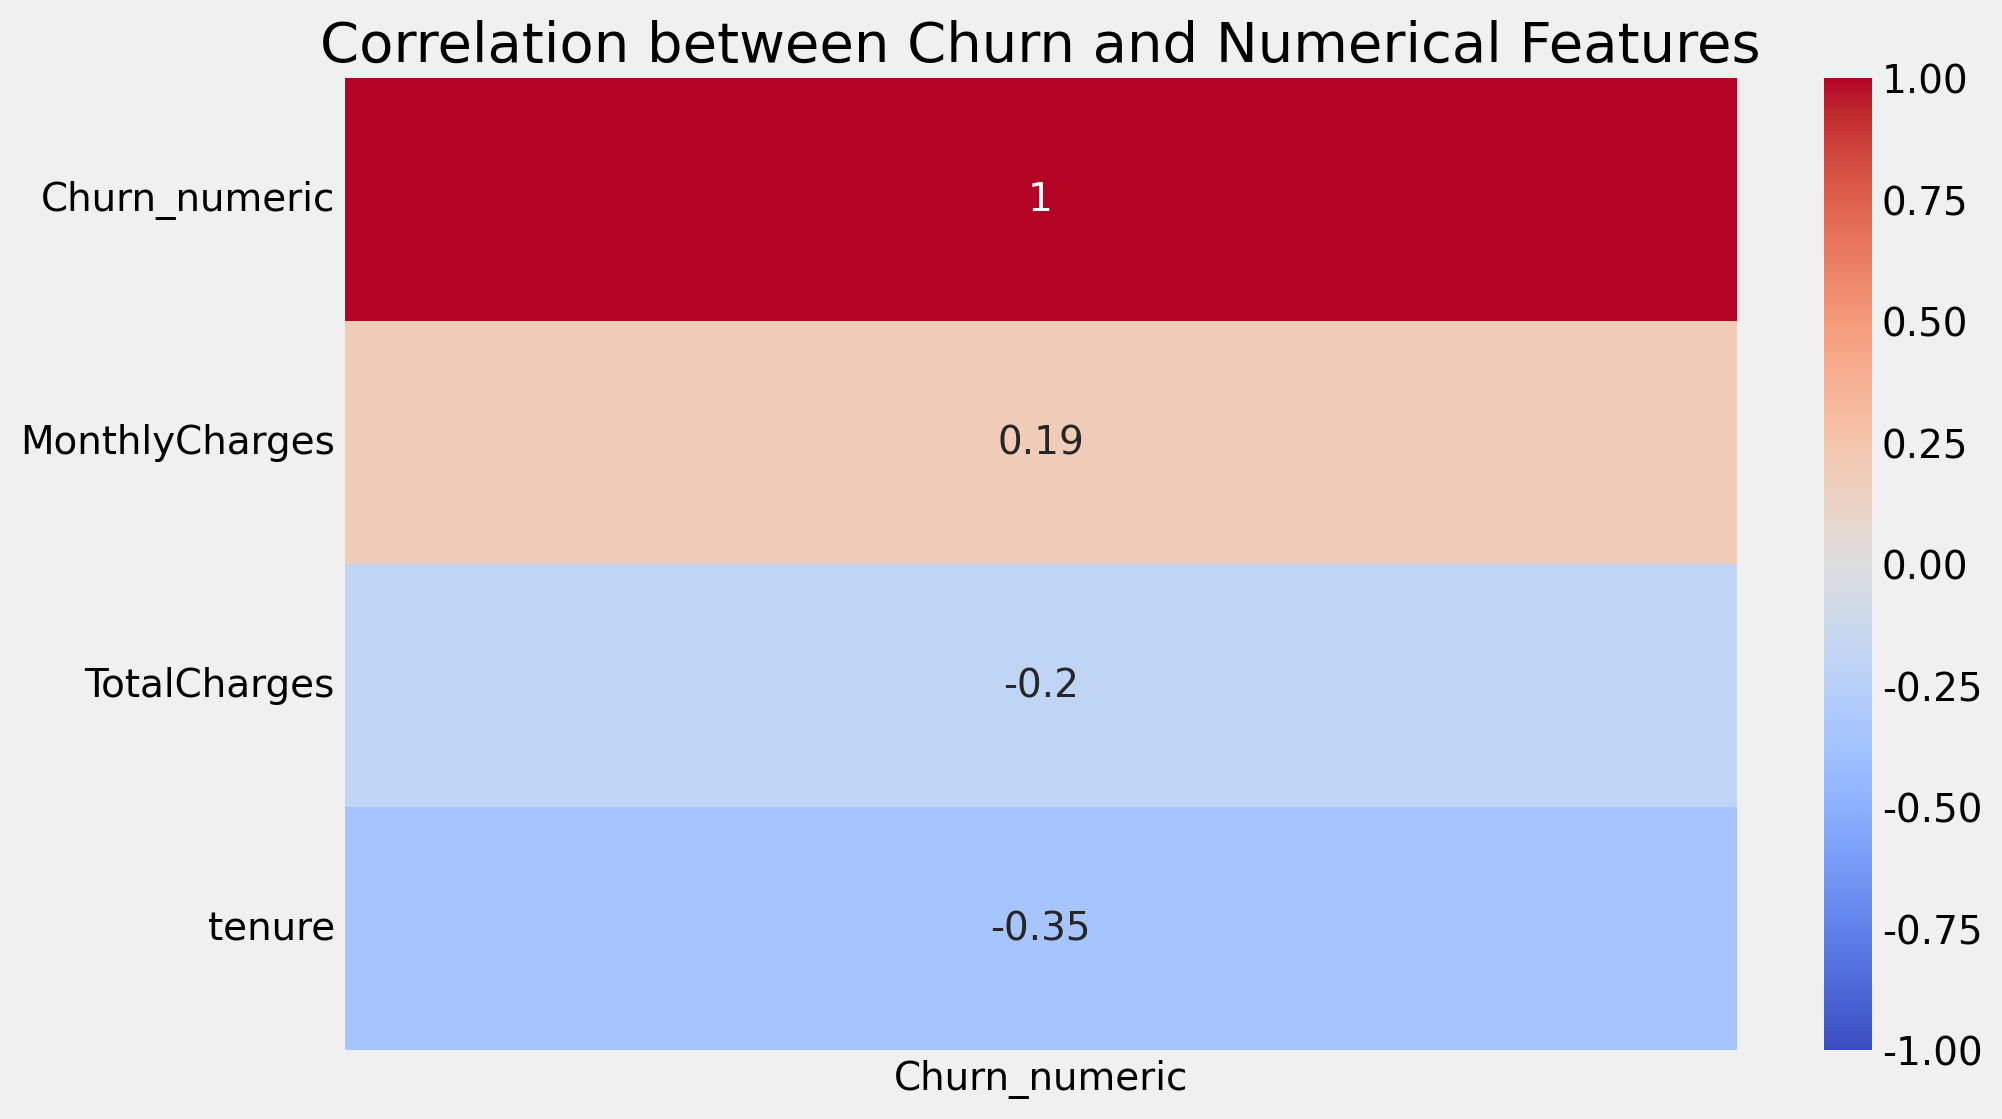

In [ ]:
df['Churn_numeric'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

numerical_df['Churn_numeric'] = df['Churn_numeric']
correlation_matrix = numerical_df.corr()

# Churn과 상관관계가 높은 변수들 확인
churn_corr = correlation_matrix['Churn_numeric'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Churn_numeric']].sort_values(by='Churn_numeric', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Churn and Numerical Features')
plt.show()

### 상관관계 분석 결과

1. **tenure와 Churn**:
   - **상관계수**: -0.35
   - **해석**: 서비스 가입 기간이 길수록 이탈할 가능성이 낮음을 의미한다. 즉, **장기 가입 고객이 이탈할 가능성이 적다**.

2. **TotalCharges와 Churn**:
   - **상관계수**: -0.20
   - **해석**: 총 청구 금액이 높을수록 이탈할 가능성이 다소 낮다. 이는 장기간 서비스 이용 고객이 총 청구 금액을 많이 지불한 경우가 많기 때문으로 해석된다.

3. **MonthlyCharges와 Churn**:
   - **상관계수**: 0.19
   - **해석**: 월 청구 금액이 높을수록 이탈할 가능성이 약간 높아진다. 이는 **고가 요금제 사용자**가 이탈할 가능성이 더 높다는 것을 시사한다.


In [ ]:
# 수치형 변수들의 왜도(Skewness)와 첨도(Kurtosis) 계산
skew_tenure = df['tenure'].skew()
kurt_tenure = df['tenure'].kurt()

skew_monthlycharges = df['MonthlyCharges'].skew()
kurt_monthlycharges = df['MonthlyCharges'].kurt()

skew_totalcharges = df['TotalCharges'].apply(pd.to_numeric, errors='coerce').skew()
kurt_totalcharges = df['TotalCharges'].apply(pd.to_numeric, errors='coerce').kurt()

# 왜도와 첨도 값 출력
print(f"Tenure의 왜도: {skew_tenure}, 첨도: {kurt_tenure}")
print(f"MonthlyCharges의 왜도: {skew_monthlycharges}, 첨도: {kurt_monthlycharges}")
print(f"TotalCharges의 왜도: {skew_totalcharges}, 첨도: {kurt_totalcharges}")

Tenure의 왜도: 0.2395397495619829, 첨도: -1.387371635971685
MonthlyCharges의 왜도: -0.22052443394398033, 첨도: -1.2572596945495056
TotalCharges의 왜도: 0.9623940229874866, 첨도: -0.22746760320629233


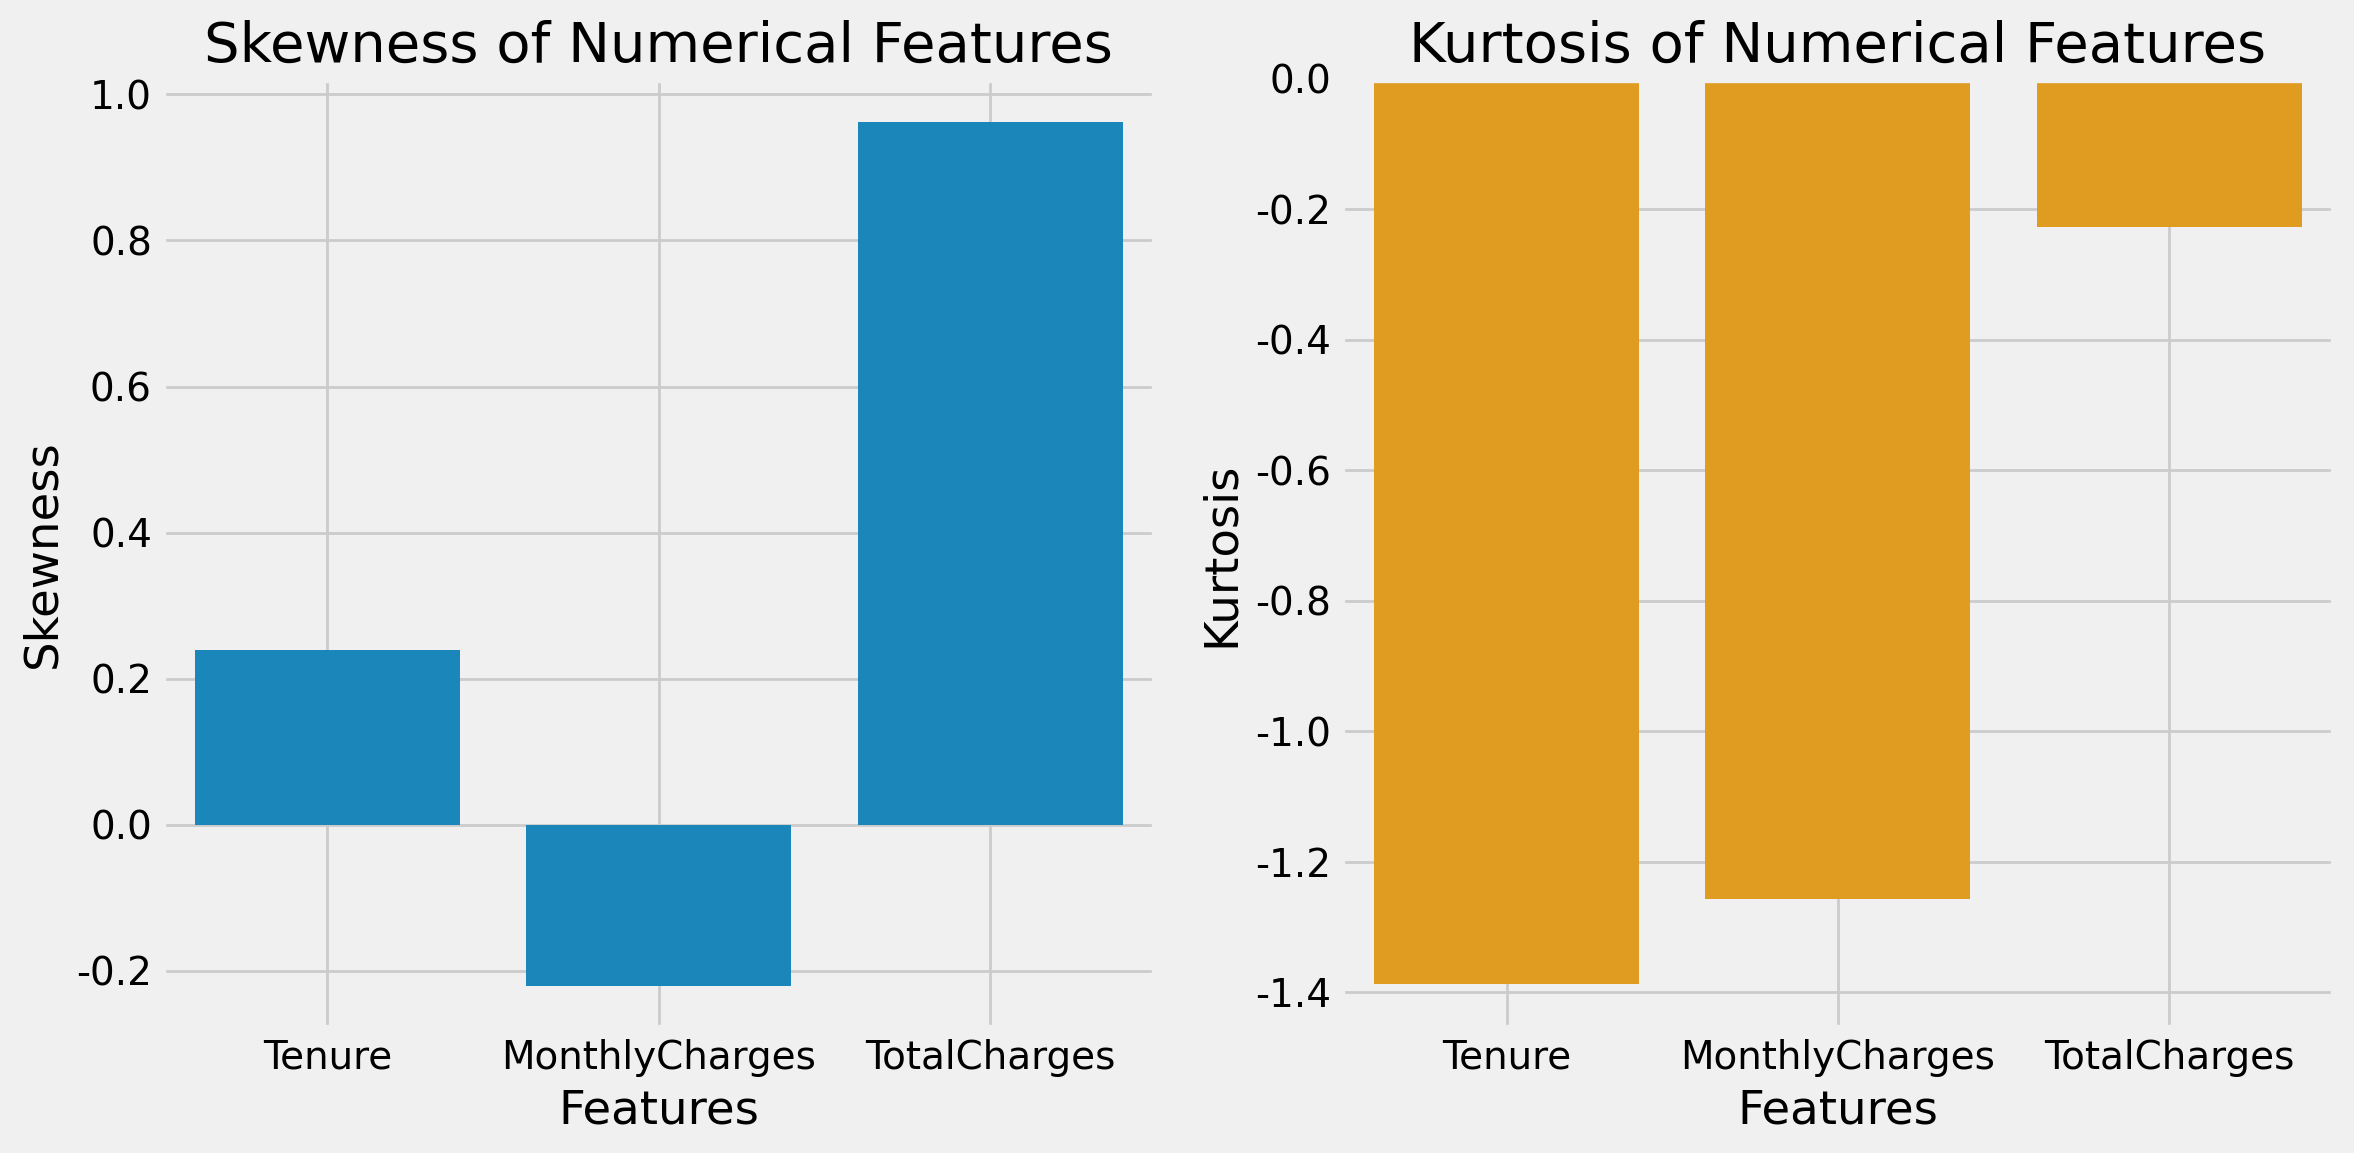

In [ ]:
metrics = {
    'Tenure': {'Skewness': skew_tenure, 'Kurtosis': kurt_tenure},
    'MonthlyCharges': {'Skewness': skew_monthlycharges, 'Kurtosis': kurt_monthlycharges},
    'TotalCharges': {'Skewness': skew_totalcharges, 'Kurtosis': kurt_totalcharges}
}

skewness_values = [metrics[feature]['Skewness'] for feature in metrics]
kurtosis_values = [metrics[feature]['Kurtosis'] for feature in metrics]
features = list(metrics.keys())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=features, y=skewness_values)
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.barplot(x=features, y=kurtosis_values, color = 'orange')
plt.title('Kurtosis of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Kurtosis')
plt.grid(True)

plt.tight_layout()
plt.show()

### 왜도(Skewness) 및 첨도(Kurtosis) 분석 결론

1. **Tenure**:
   - **왜도**: 0.24 (거의 대칭적)
   - **첨도**: -1.39 (꼬리가 얇고 극단값이 적음)
   - **결론**: **tenure**는 대체로 대칭적인 분포를 가지며, 극단값도 적으므로 **로그 변환이 불필요**하다.

2. **MonthlyCharges**:
   - **왜도**: -0.22 (거의 대칭적)
   - **첨도**: -1.26 (꼬리가 얇고 극단값이 적음)
   - **결론**: **MonthlyCharges**는 대칭적이며, 극단값도 많지 않다. **로그 변환이 필요하지 않다**.

3. **TotalCharges**:
   - **왜도**: 0.96 (다소 비대칭)
   - **첨도**: -0.23 (평균적인 꼬리 두께)
   - **결론**: **TotalCharges**는 다소 비대칭적이므로 **로그 변환을 고려할 수 있다**.

### 최종 결론:
- **Tenure**와 **MonthlyCharges**는 대칭적이므로 **로그 변환이 필요하지 않다**.
- **TotalCharges**는 **비대칭성이 크기 때문에 로그 변환이 적합**할 수 있다.


<ipython-input-139-2c76fa9ca971>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_stats = df.groupby('Churn')[numerical_columns].agg(['mean', 'std'])


          tenure            MonthlyCharges            TotalCharges             
            mean        std           mean        std         mean          std
Churn                                                                          
No     37.569965  24.113777      61.265124  31.092648  2554.765772  2327.012699
Yes    17.979133  19.531123      74.441332  24.666053  1531.796094  1890.822994


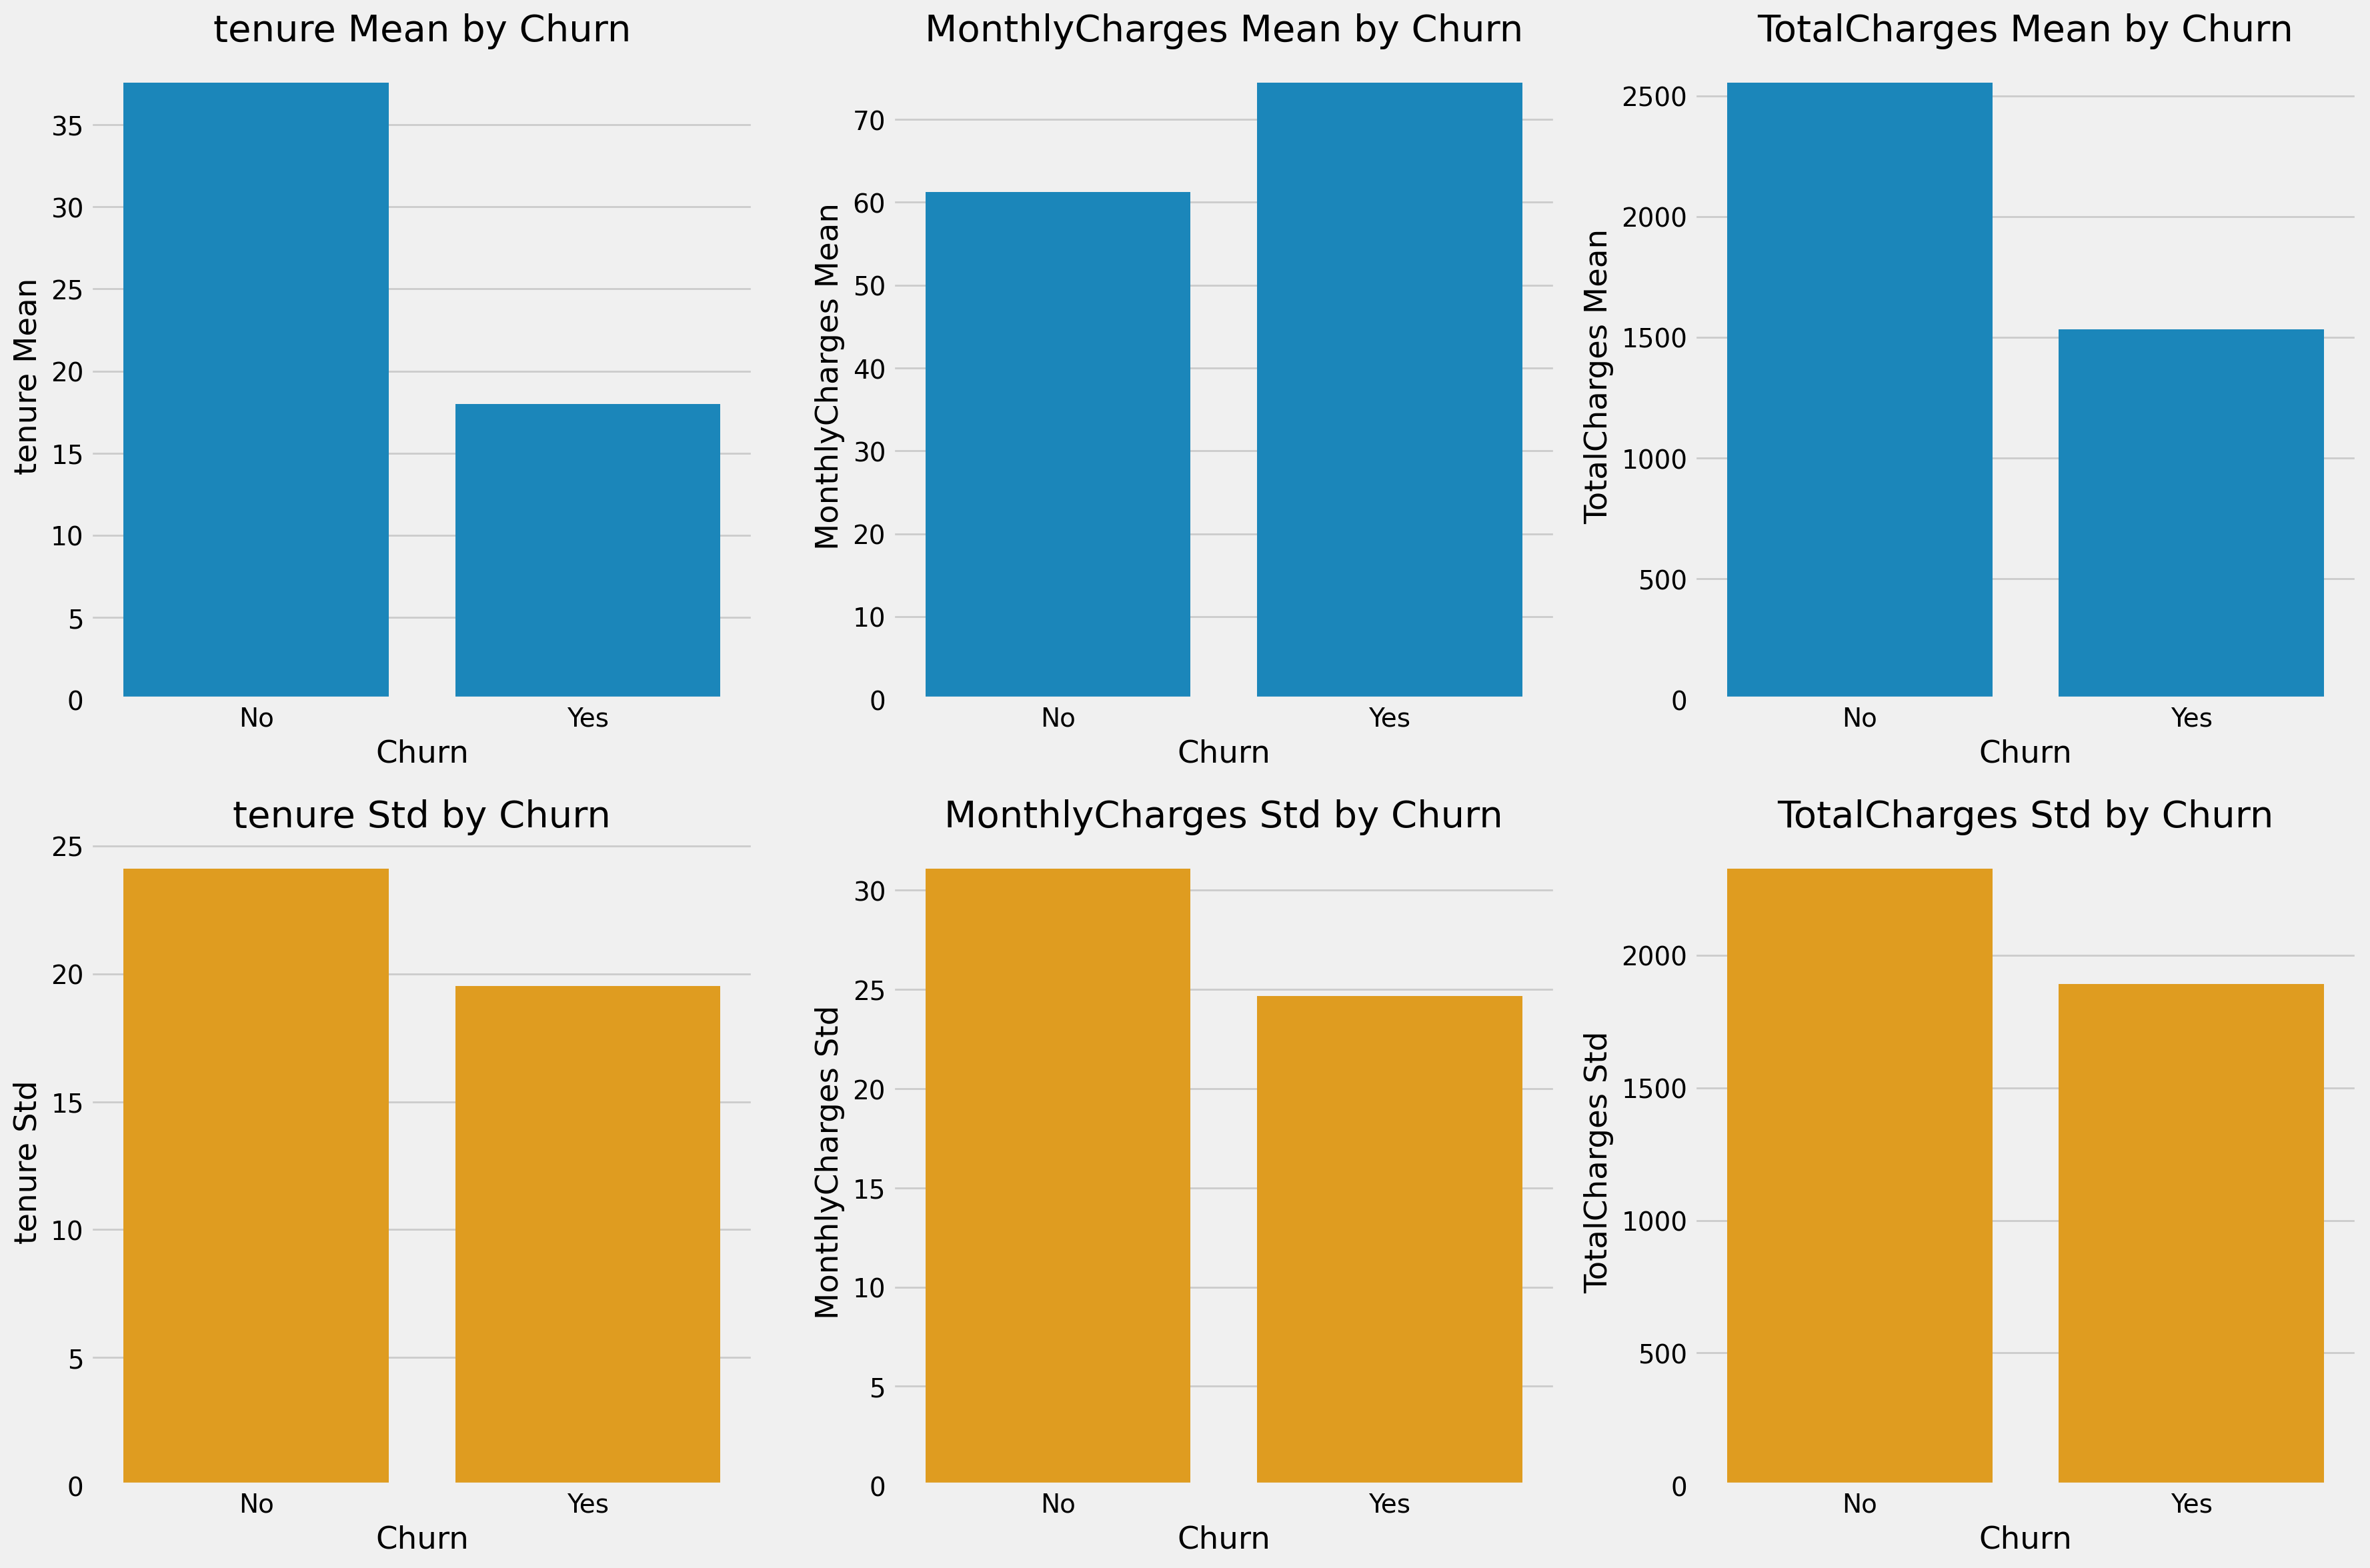

In [ ]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

churn_stats = df.groupby('Churn')[numerical_columns].agg(['mean', 'std'])

print(churn_stats)

plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=churn_stats.index, y=churn_stats[column]['mean'])
    plt.title(f'{column} Mean by Churn')
    plt.xlabel('Churn')
    plt.ylabel(f'{column} Mean')

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i + 3)
    sns.barplot(x=churn_stats.index, y=churn_stats[column]['std'], color = 'orange')
    plt.title(f'{column} Std by Churn')
    plt.xlabel('Churn')
    plt.ylabel(f'{column} Std')

plt.tight_layout()
plt.show()

### 수치형 변수들의 평균과 표준편차 비교 (Churn 여부에 따라)

1. **Tenure (서비스 가입 기간)**:
   - **평균**: 이탈한 고객(Churn = Yes)의 **평균 가입 기간**은 약 18개월로, 이탈하지 않은 고객(Churn = No)의 평균인 36개월에 비해 **짧다**.
   - **표준편차**: 이탈하지 않은 고객의 **가입 기간 변동성**(표준편차)이 더 크며, 이탈 고객은 더 **일정한 패턴**을 보인다.

2. **MonthlyCharges (월 청구 금액)**:
   - **평균**: 이탈한 고객(Churn = Yes)의 **평균 월 청구 금액**은 약 74로, 이탈하지 않은 고객의 평균인 61에 비해 **높다**.
   - **표준편차**: 이탈한 고객의 월 청구 금액 변동성(표준편차)이 이탈하지 않은 고객보다 **작다**, 즉 이탈한 고객의 월 청구 금액이 상대적으로 일정하다.

3. **TotalCharges (총 청구 금액)**:
   - **평균**: 이탈한 고객(Churn = Yes)의 **총 청구 금액**은 약 1,500으로, 이탈하지 않은 고객(Churn = No)의 총 청구 금액인 2,500에 비해 **현저히 낮다**.
   - **표준편차**: 이탈하지 않은 고객의 **총 청구 금액 변동성**(표준편차)이 더 크며, 이탈 고객은 일정한 총 청구 금액 패턴을 보인다.

### 결론:
- **이탈한 고객**은 대체로 **짧은 서비스 기간**과 **높은 월 청구 금액**을 보인다.
- **이탈하지 않은 고객**은 **서비스 가입 기간이 길고**, **총 청구 금액이 많으며** 변동성도 크다.
- 이탈 고객의 **변동성(표준편차)**이 더 작다는 점은, 이탈 고객이 더 **일정한 패턴**을 가진다는 점을 시사한다.


# 범주형 데이터 분석

In [ ]:
# 범주형 데이터 추출
categorical_df = df.select_dtypes(exclude=['number'])

# 추출한 범주형 변수 확인
print(categorical_df.columns)

categorical_df = df.select_dtypes(exclude=['number']).drop(columns=['customerID', 'Churn_numeric'])

# 추출한 범주형 변수 확인
print(categorical_df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'Churn_numeric'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


### 범주형 변수 그룹화

1. **고객 특성 관련 변수**:
   - **`gender`**: 성별 (남성, 여성)
   - **`SeniorCitizen`**: 고령자 여부 (0: 고령자 아님, 1: 고령자)
   - **`Partner`**: 배우자 여부 (Yes, No)
   - **`Dependents`**: 부양가족 여부 (Yes, No)

2. **전화 및 인터넷 서비스 관련 변수**:
   - **`PhoneService`**: 전화 서비스 여부 (Yes, No)
   - **`MultipleLines`**: 다중 전화선 여부 (Yes, No, No phone service)
   - **`InternetService`**: 인터넷 서비스 유형 (DSL, Fiber optic, No)

3. **온라인 및 기타 부가 서비스 관련 변수**:
   - **`OnlineSecurity`**: 온라인 보안 서비스 여부 (Yes, No, No internet service)
   - **`OnlineBackup`**: 온라인 백업 서비스 여부 (Yes, No, No internet service)
   - **`DeviceProtection`**: 디바이스 보호 서비스 여부 (Yes, No, No internet service)
   - **`TechSupport`**: 기술 지원 서비스 여부 (Yes, No, No internet service)
   - **`StreamingTV`**: 스트리밍 TV 서비스 여부 (Yes, No, No internet service)
   - **`StreamingMovies`**: 스트리밍 영화 서비스 여부 (Yes, No, No internet service)

4. **계약 및 결제 관련 변수**:
   - **`Contract`**: 계약 유형 (Month-to-month, One year, Two year)
   - **`PaperlessBilling`**: 종이 없는 청구서 여부 (Yes, No)
   - **`PaymentMethod`**: 결제 방식 (Electronic check, Mailed check, Bank transfer, Credit card)

5. **타겟 변수**:
   - **`Churn`**: 이탈 여부 (Yes, No)


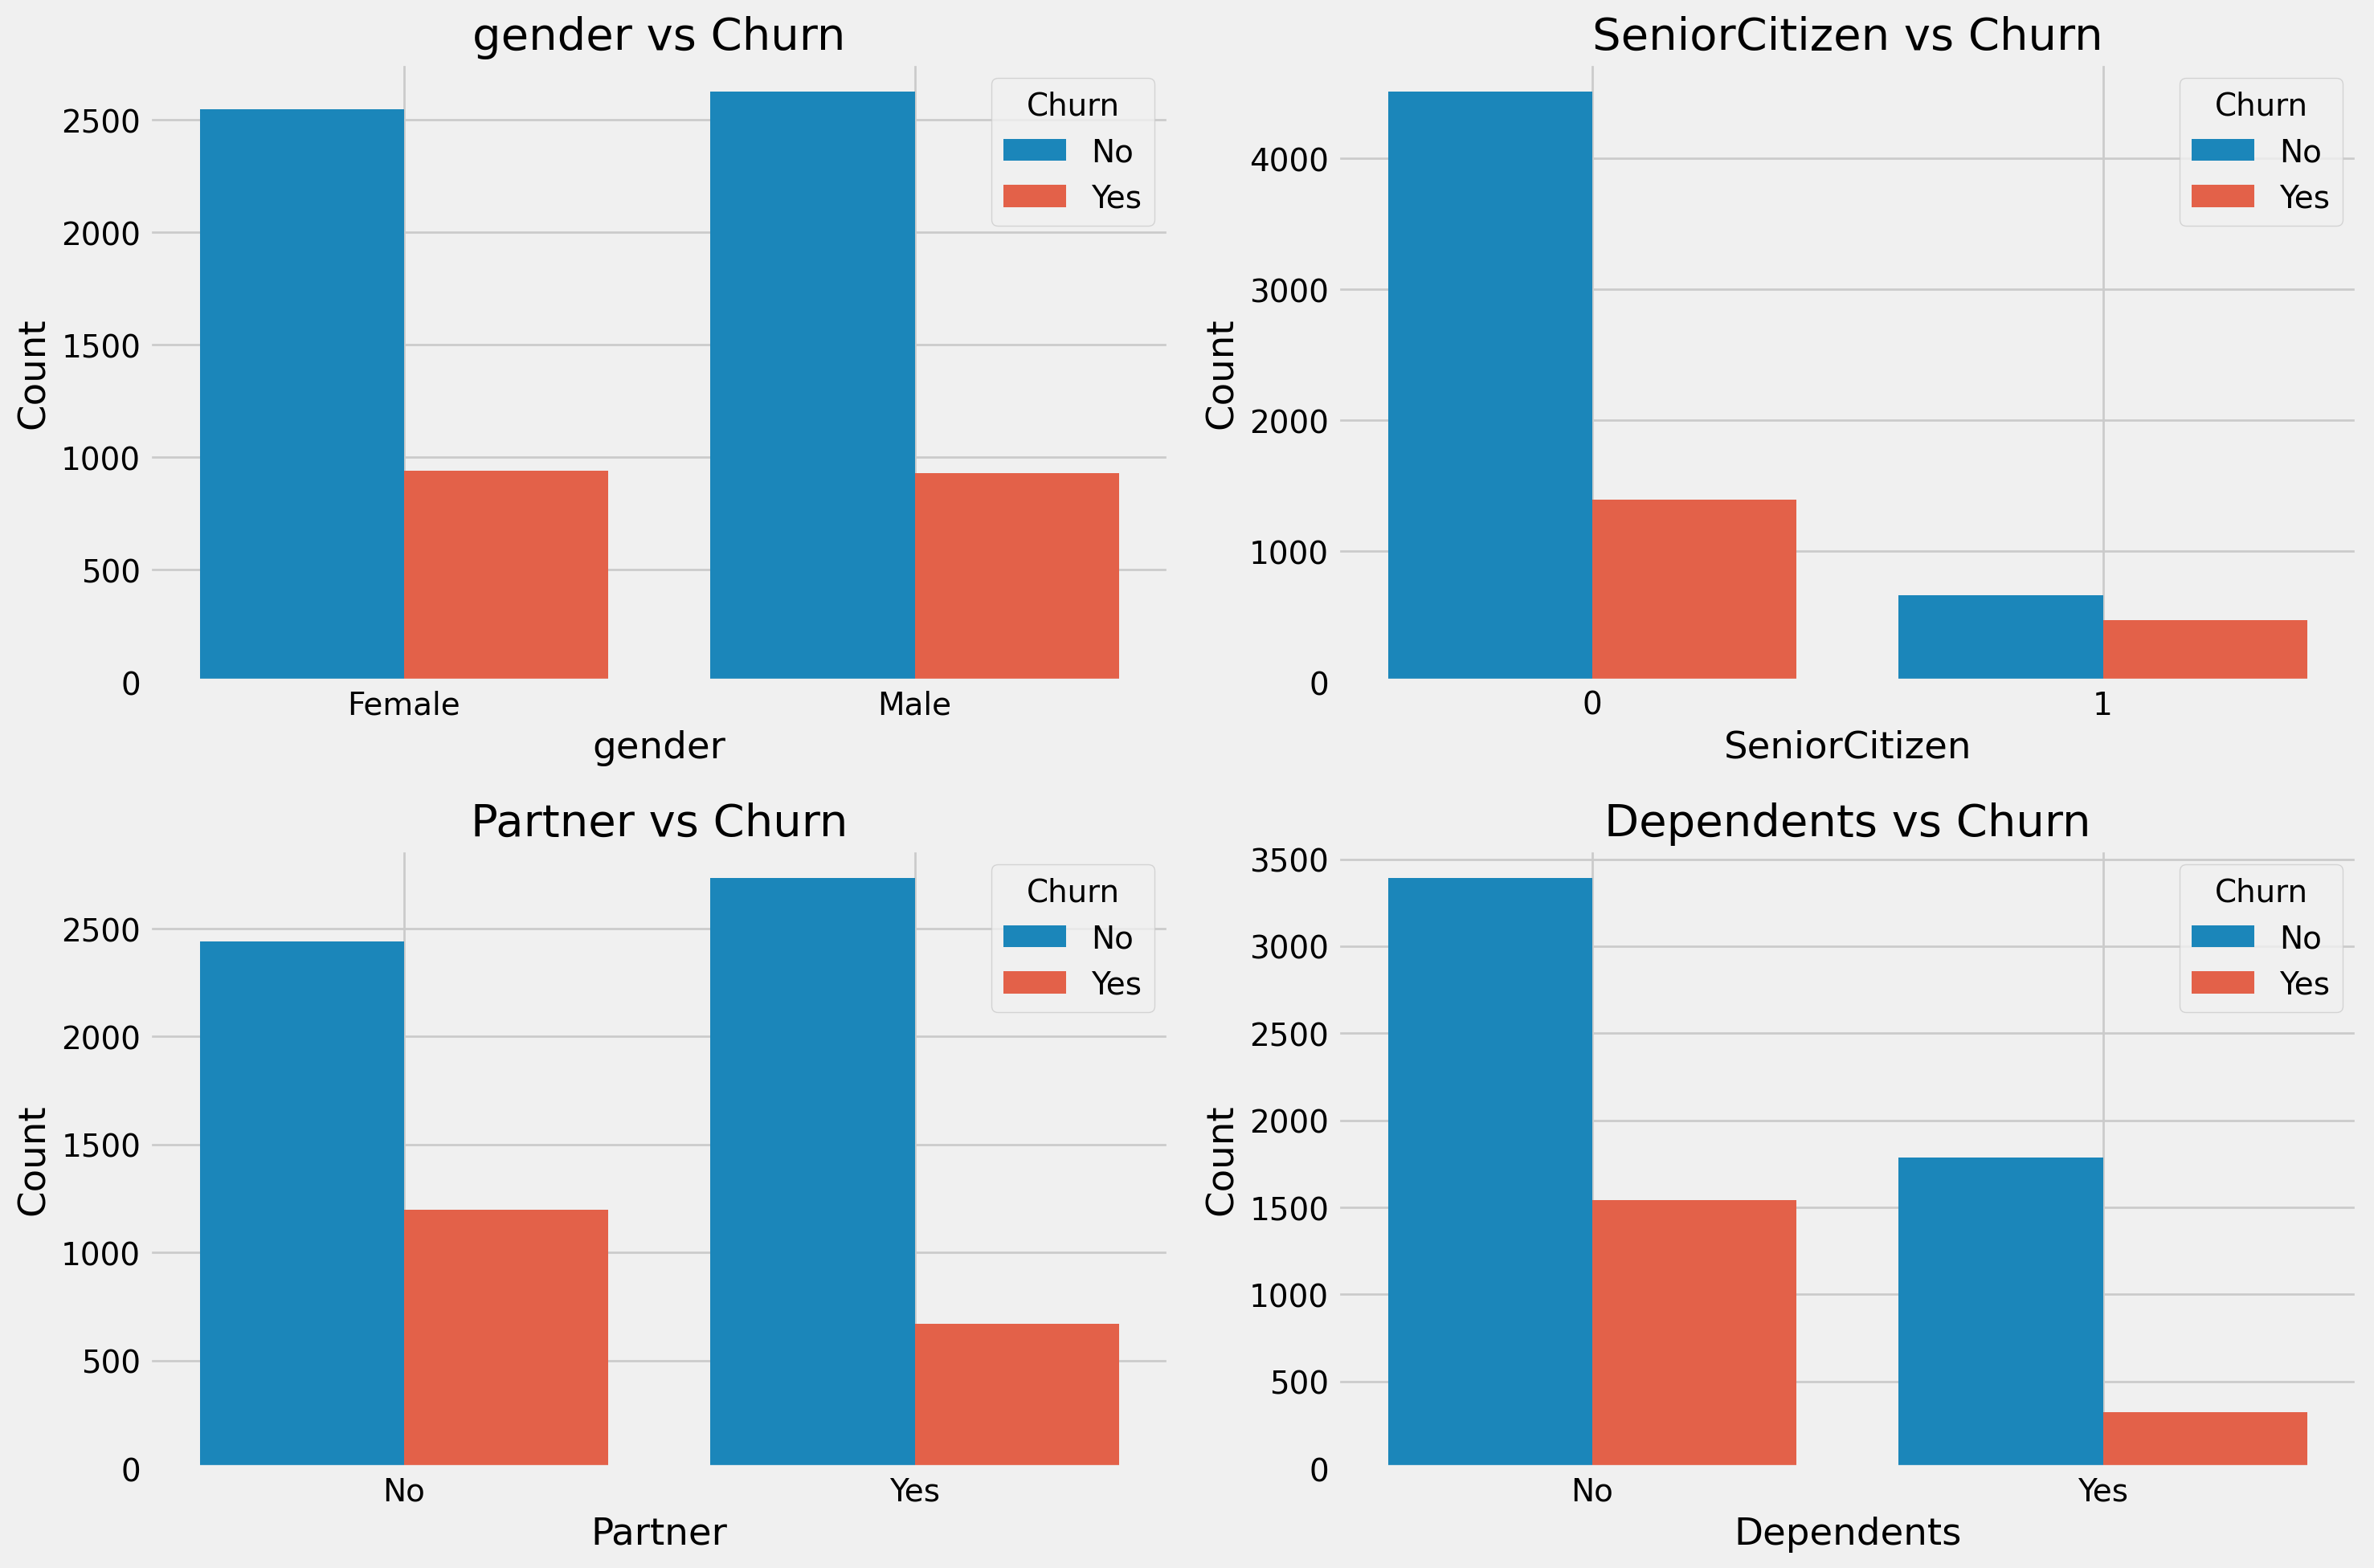

In [ ]:
# 고객 특성 관련 변수
customer_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(15, 10))

for i, column in enumerate(customer_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.grid(True)

plt.tight_layout()
plt.show()

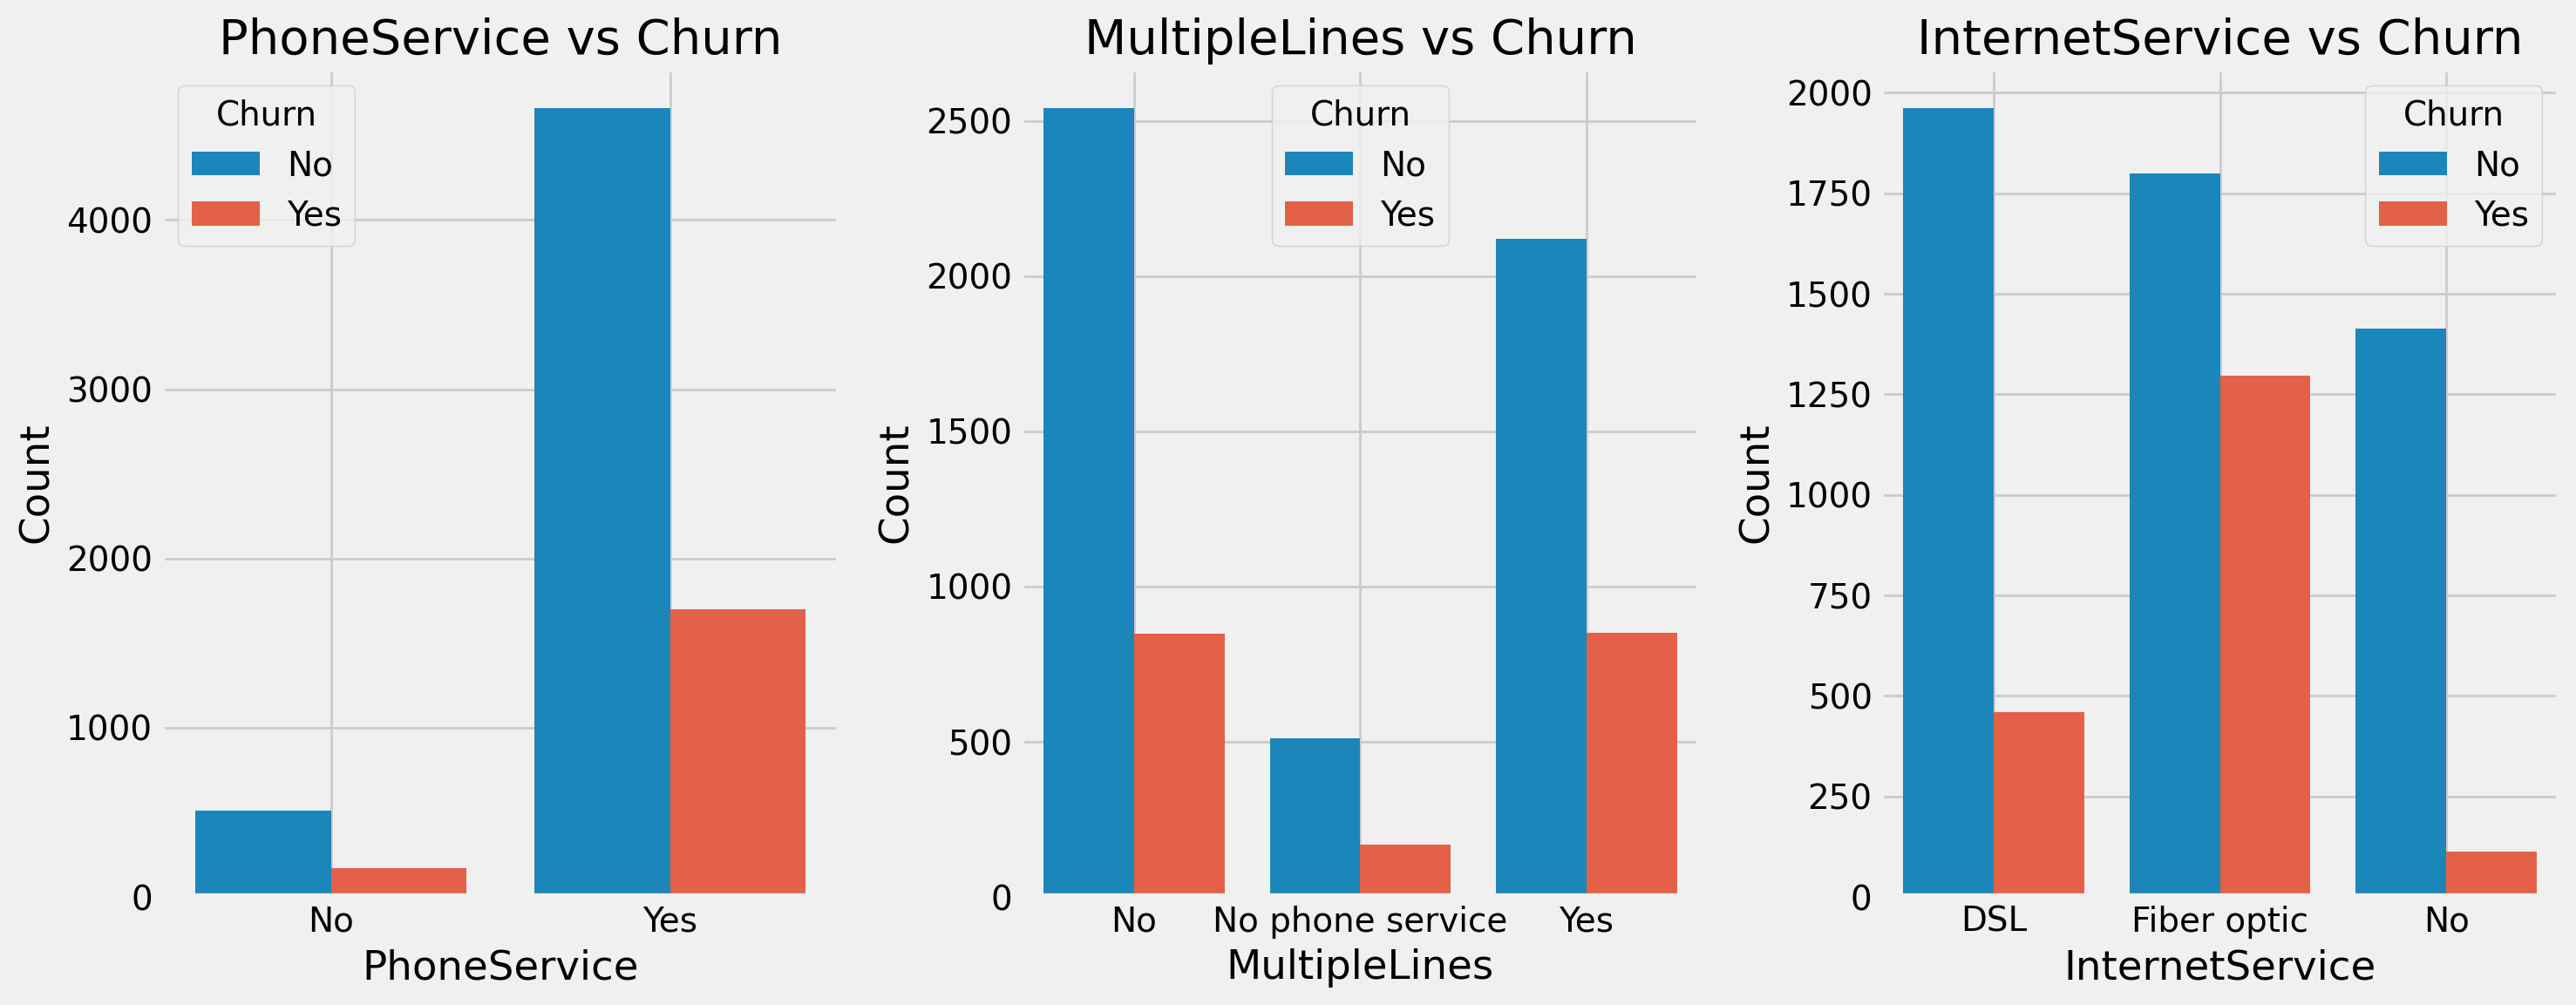

In [ ]:
# 전화 및 인터넷 서비스 관련 변수
service_columns = ['PhoneService', 'MultipleLines', 'InternetService']

plt.figure(figsize=(15, 6))

for i, column in enumerate(service_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.grid(True)

plt.tight_layout()
plt.show()

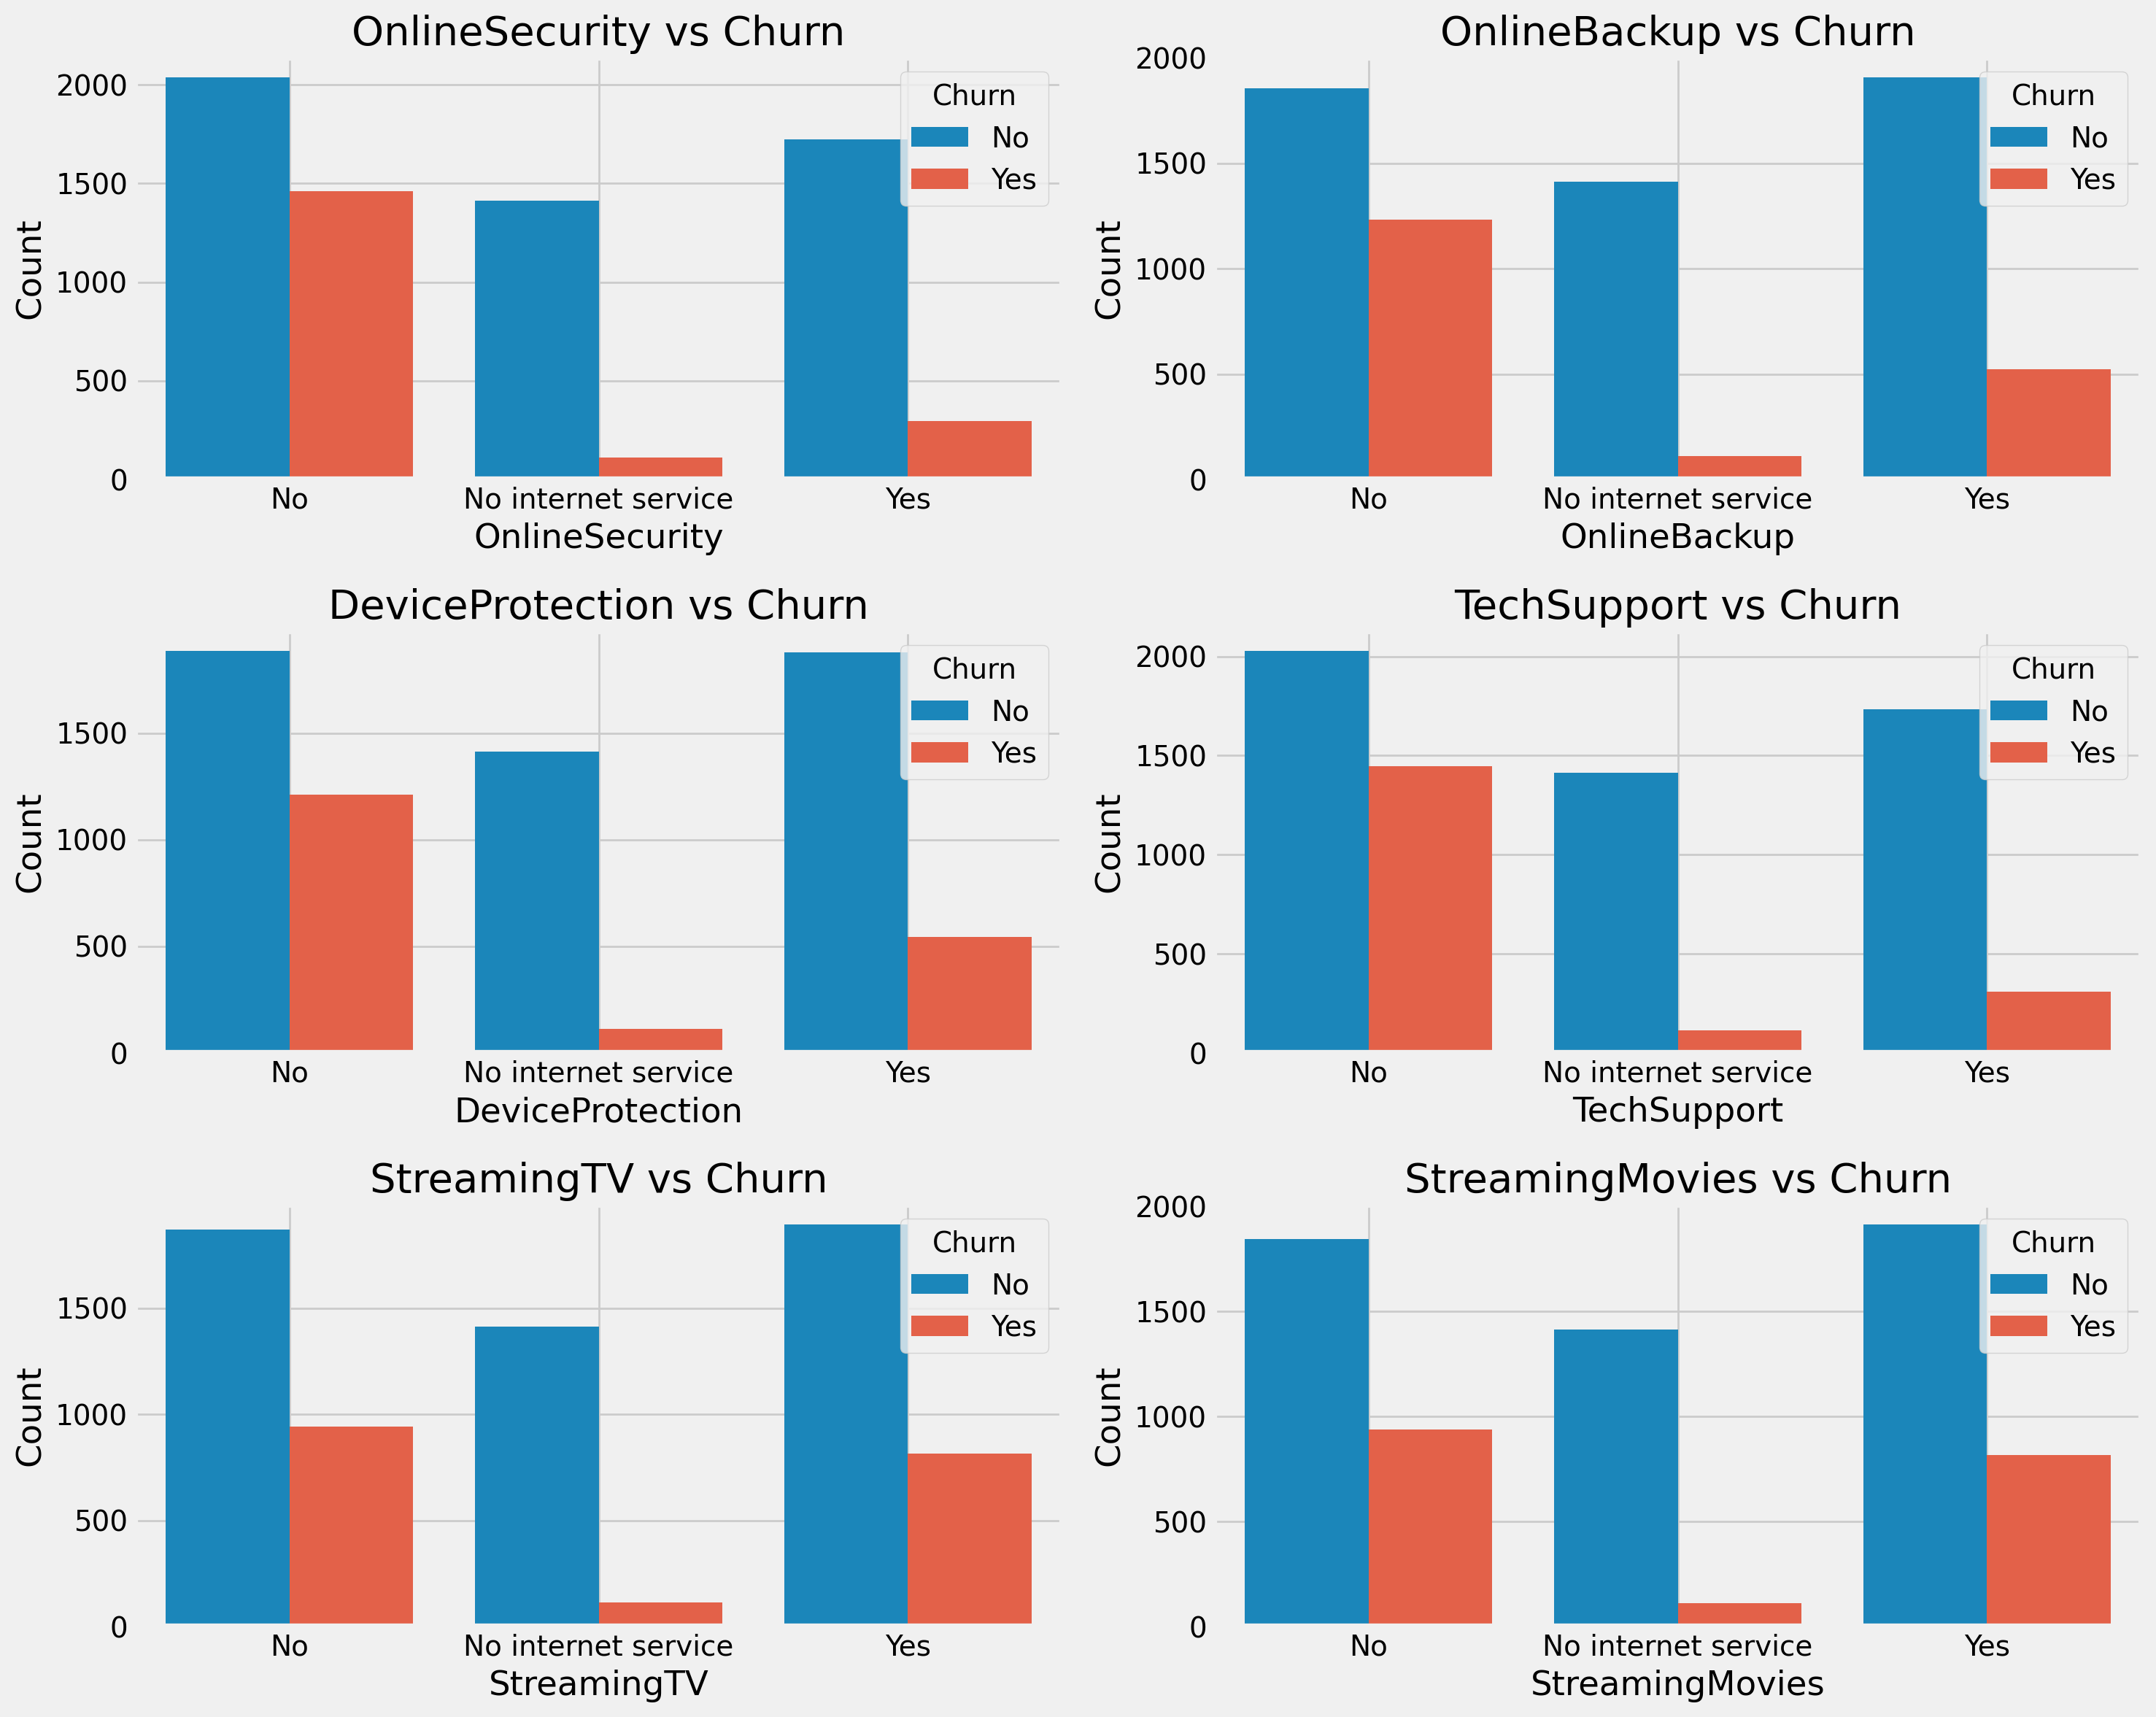

In [ ]:
# 온라인 및 기타 부가 서비스 관련 변수
online_service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                          'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(15, 12))

for i, column in enumerate(online_service_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.grid(True)

plt.tight_layout()
plt.show()

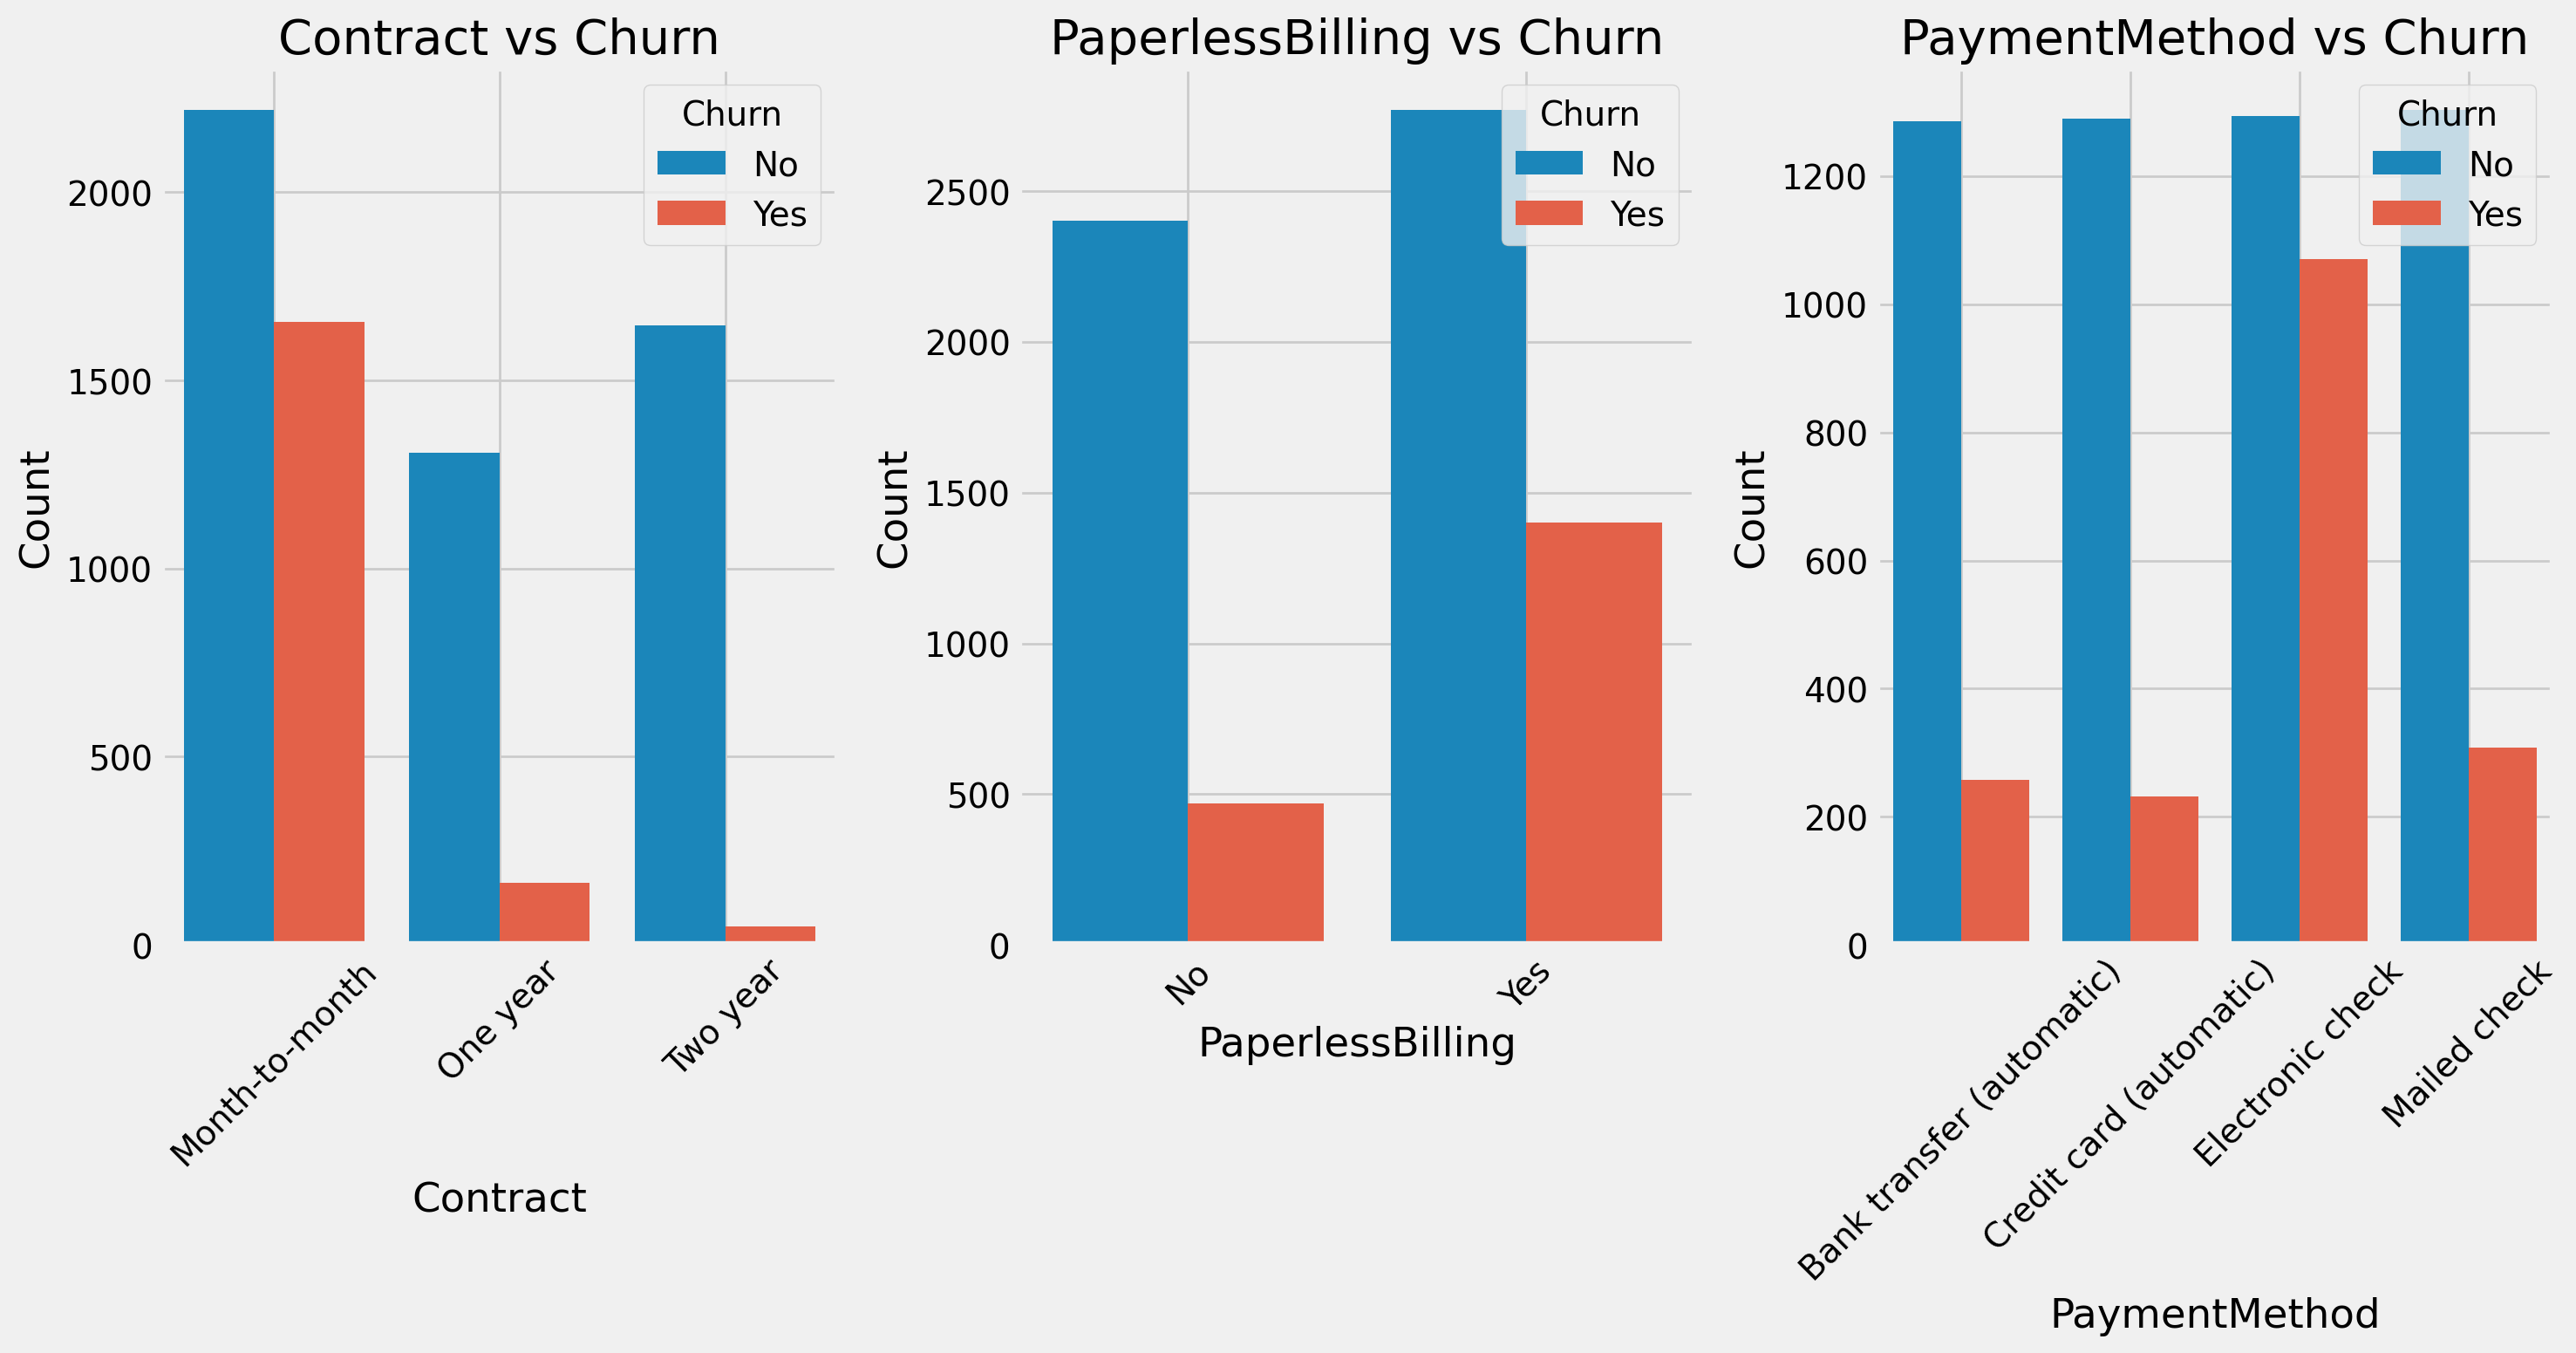

In [ ]:
# 계약 및 결제 관련 변수
contract_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(15, 8))

for i, column in enumerate(contract_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.grid(True)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

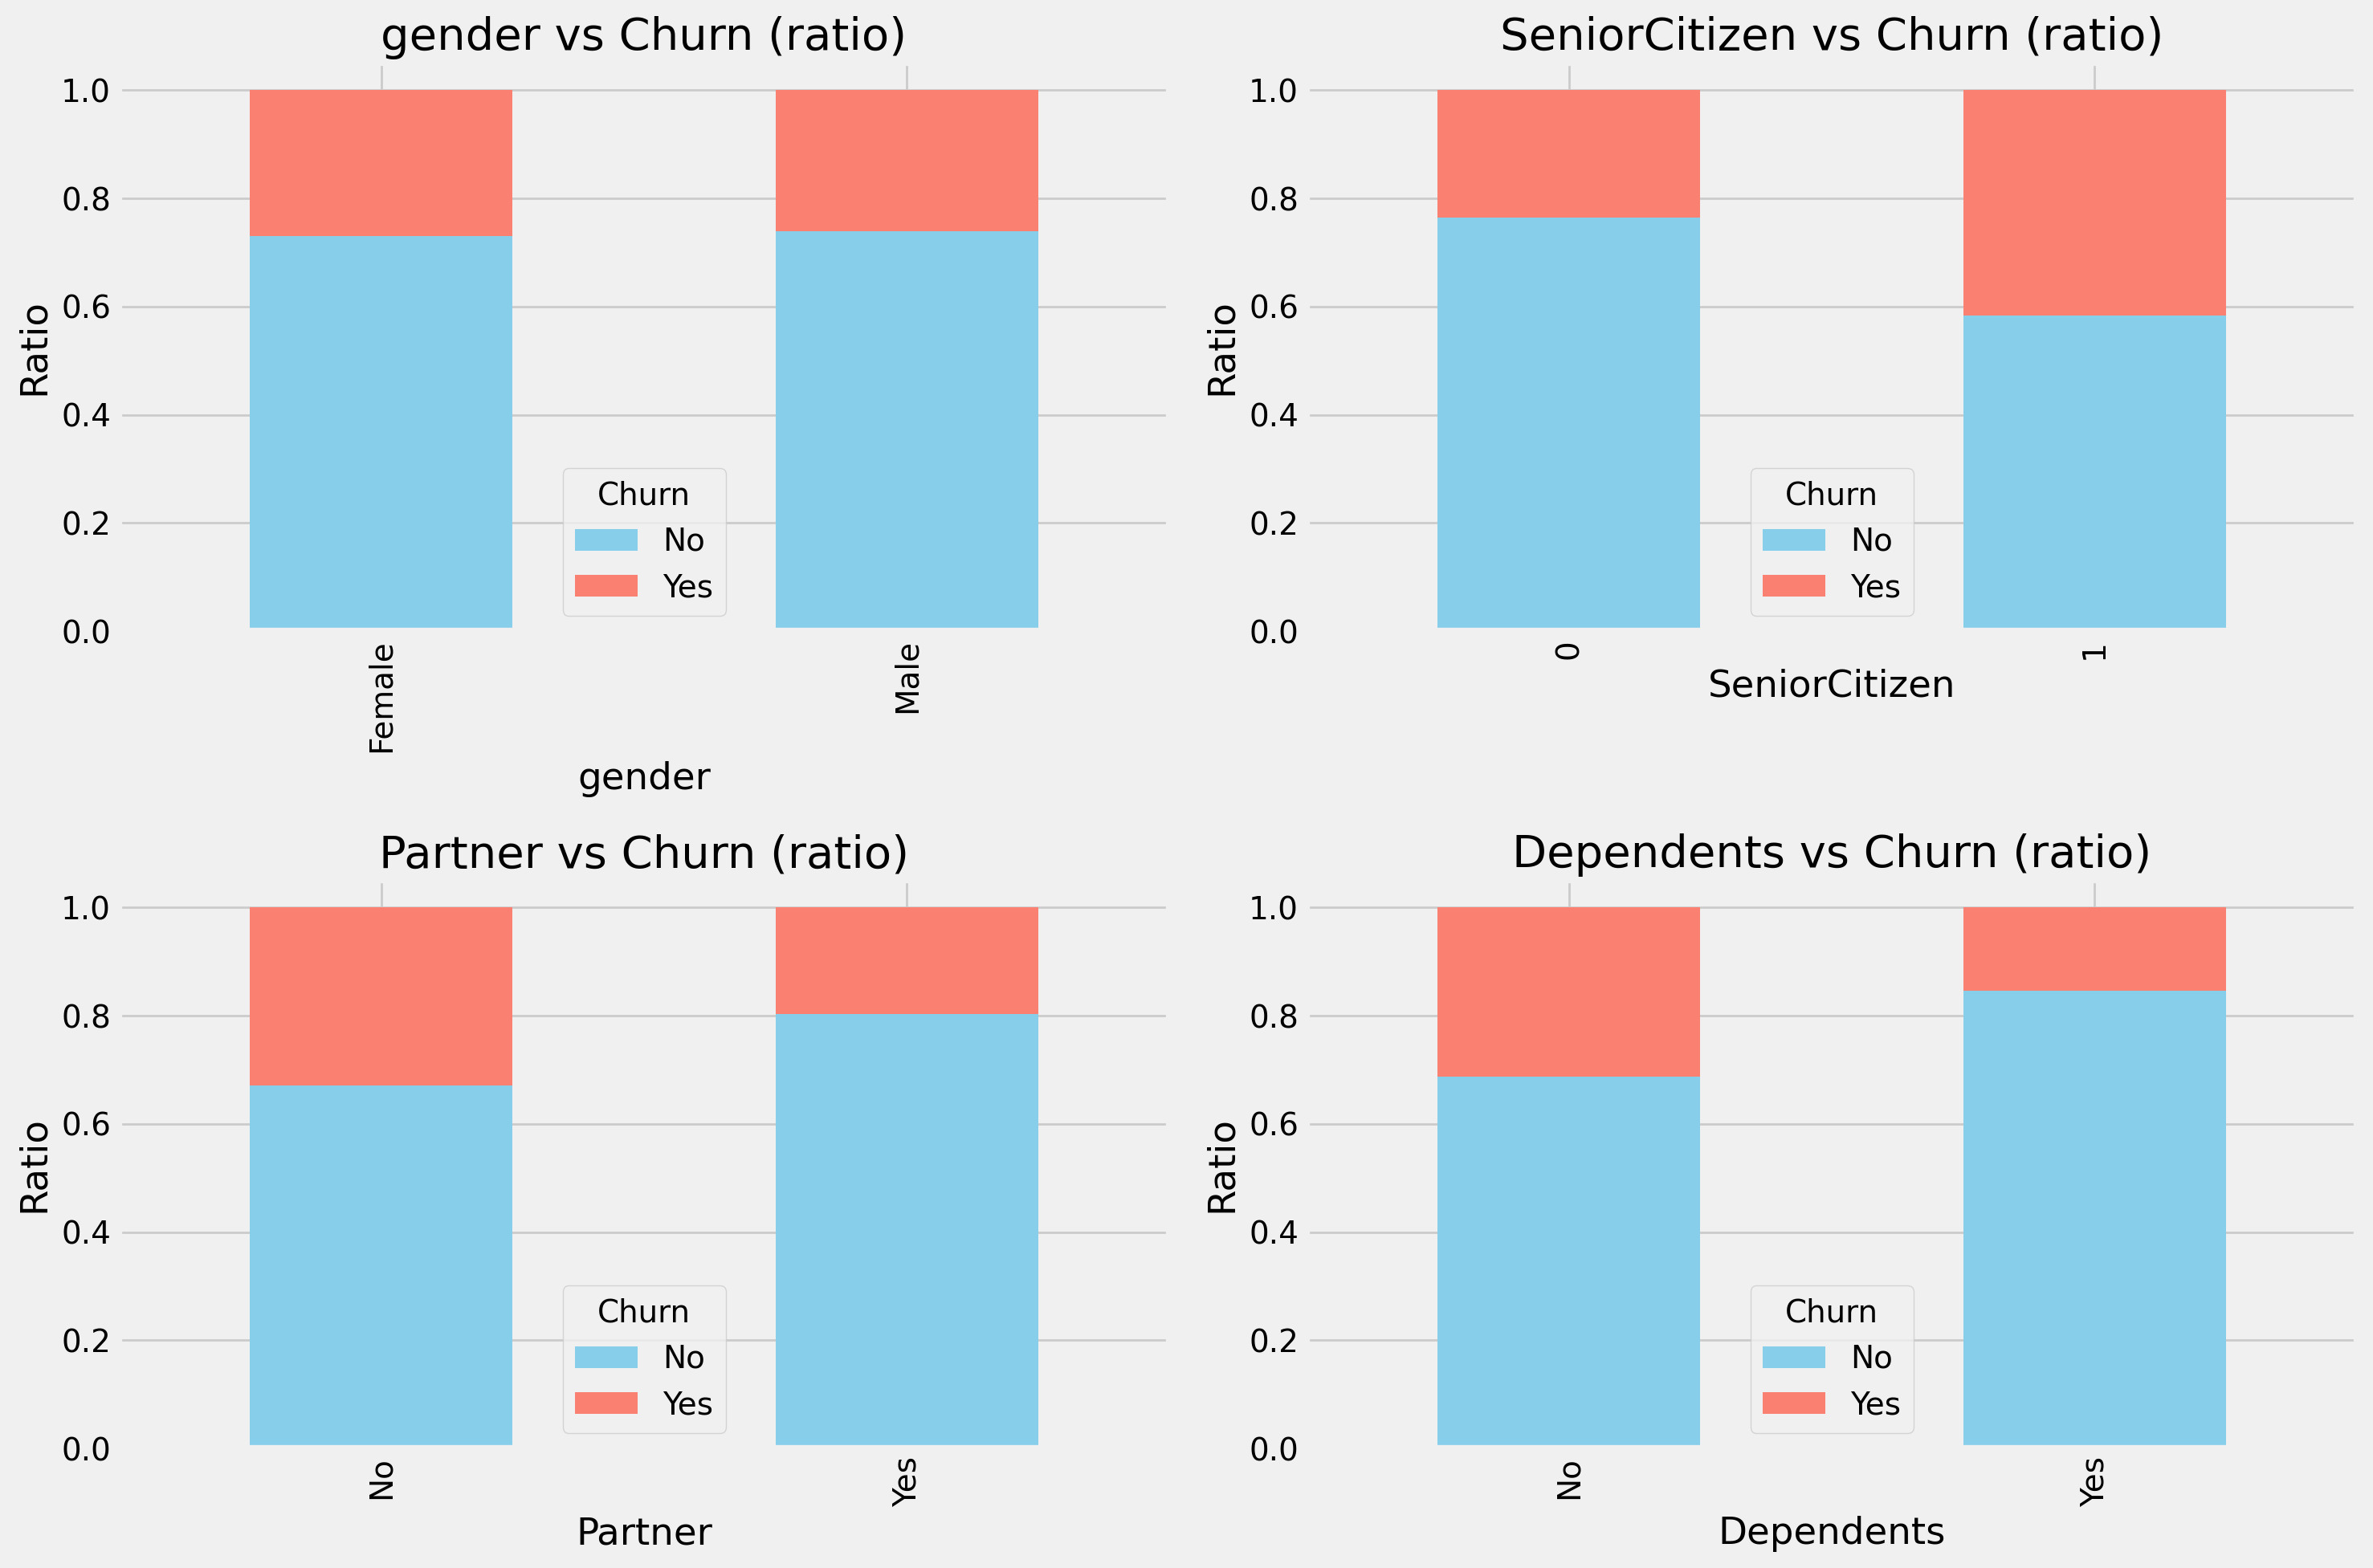

In [ ]:
def plot_categorical_vs_churn_ratio(categorical_columns, df, rows, cols, figsize=(15, 8), rotate_labels=False):
    plt.figure(figsize=figsize)

    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(rows, cols, i)
        churn_ratio = df.groupby(column, observed=True)['Churn'].value_counts(normalize=True).unstack()
        churn_ratio.plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])
        plt.title(f'{column} vs Churn (ratio)')
        plt.xlabel(column)
        plt.ylabel('Ratio')
        plt.legend(title='Churn')
        if rotate_labels:
            plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

# 고객 특성 관련 변수 vs Churn 비율
plot_categorical_vs_churn_ratio(customer_columns, df, rows=2, cols=2, figsize=(15, 10))

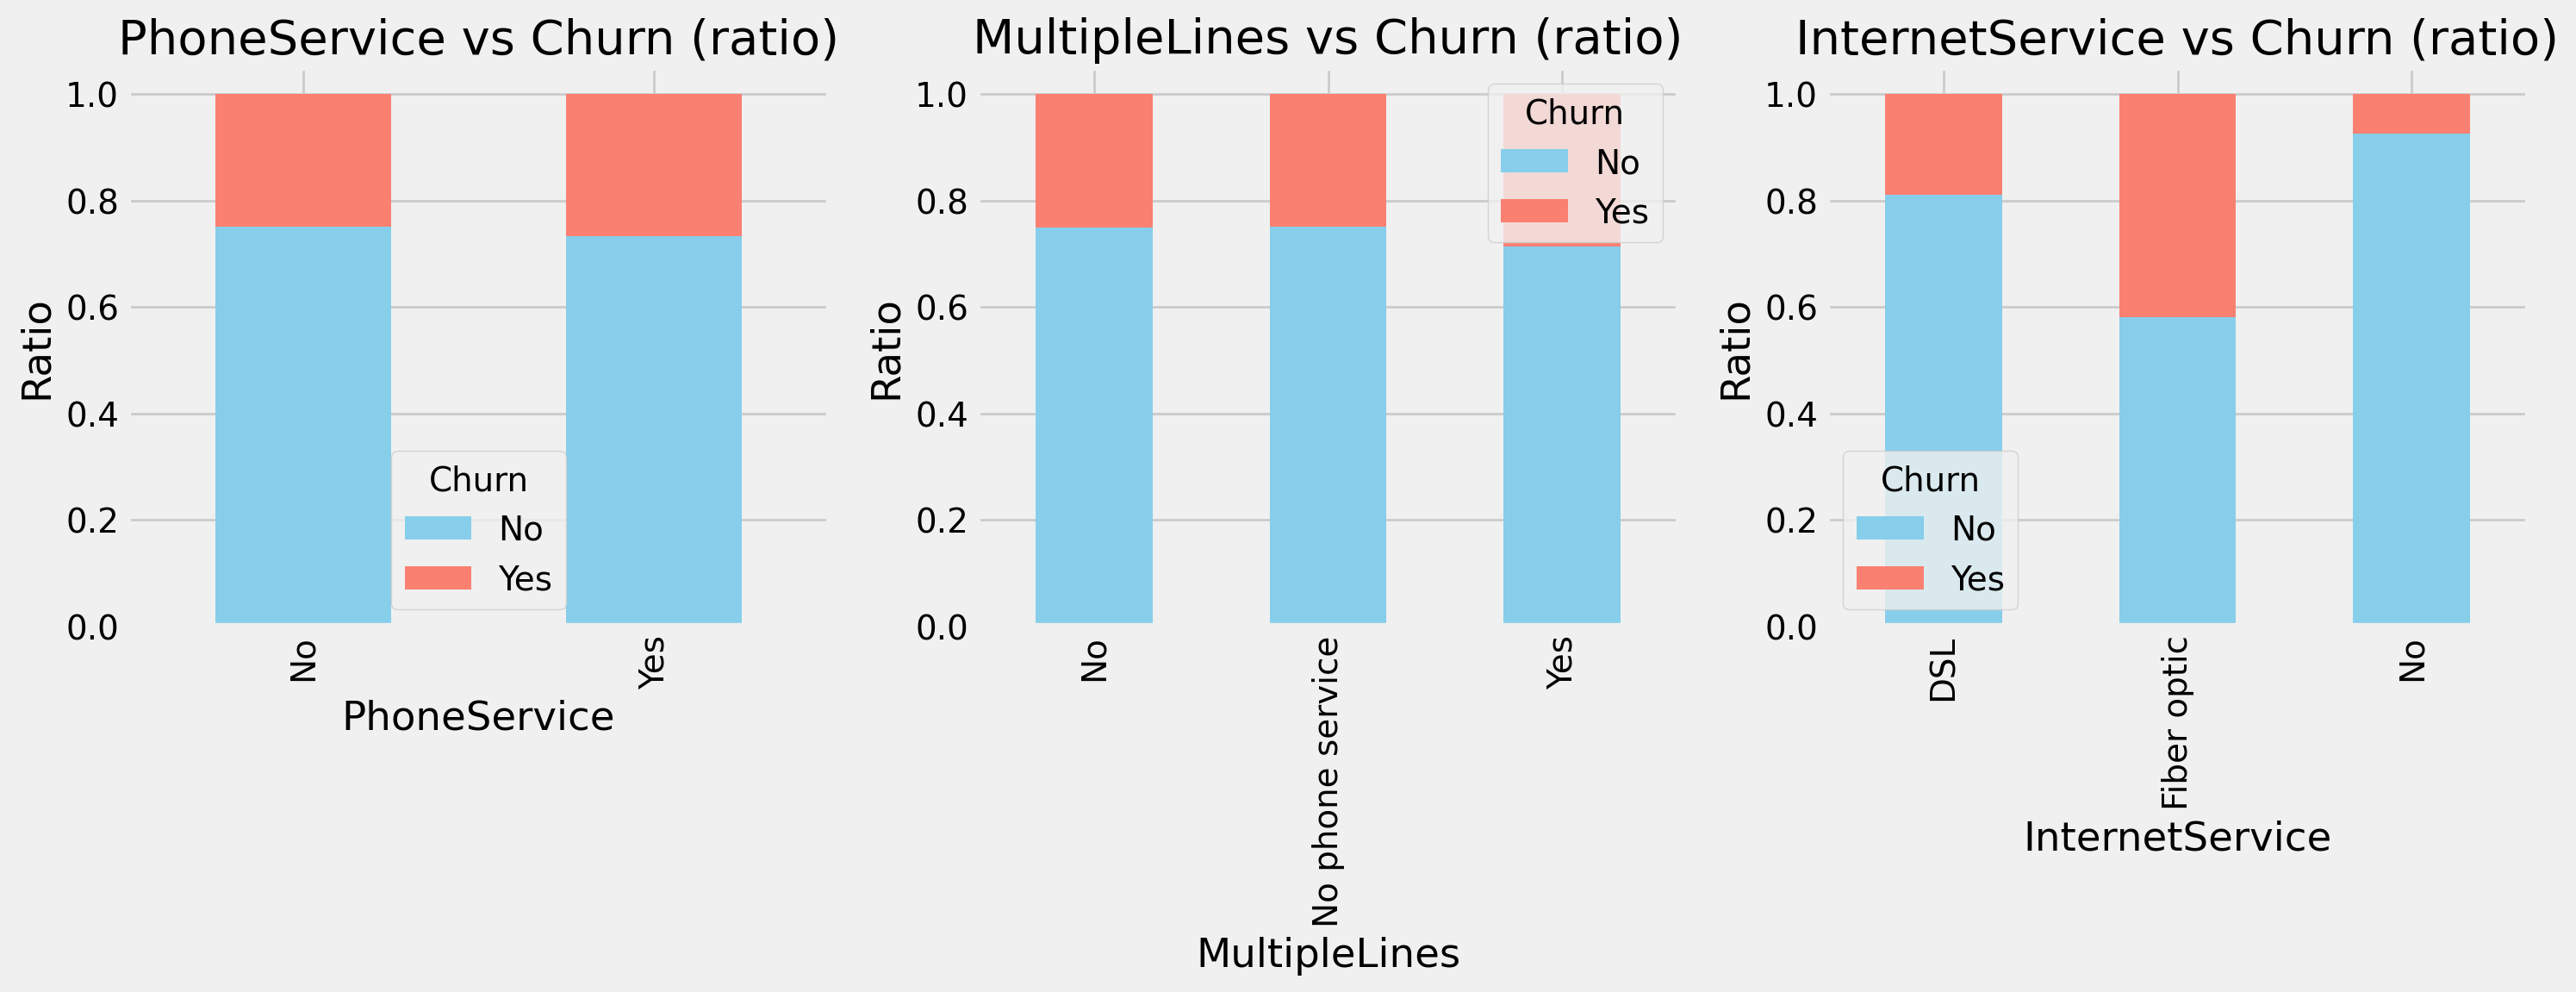

In [ ]:
# 전화 및 인터넷 서비스 관련 변수 vs Churn 비율
plot_categorical_vs_churn_ratio(service_columns, df, rows=1, cols=3, figsize=(15, 6))

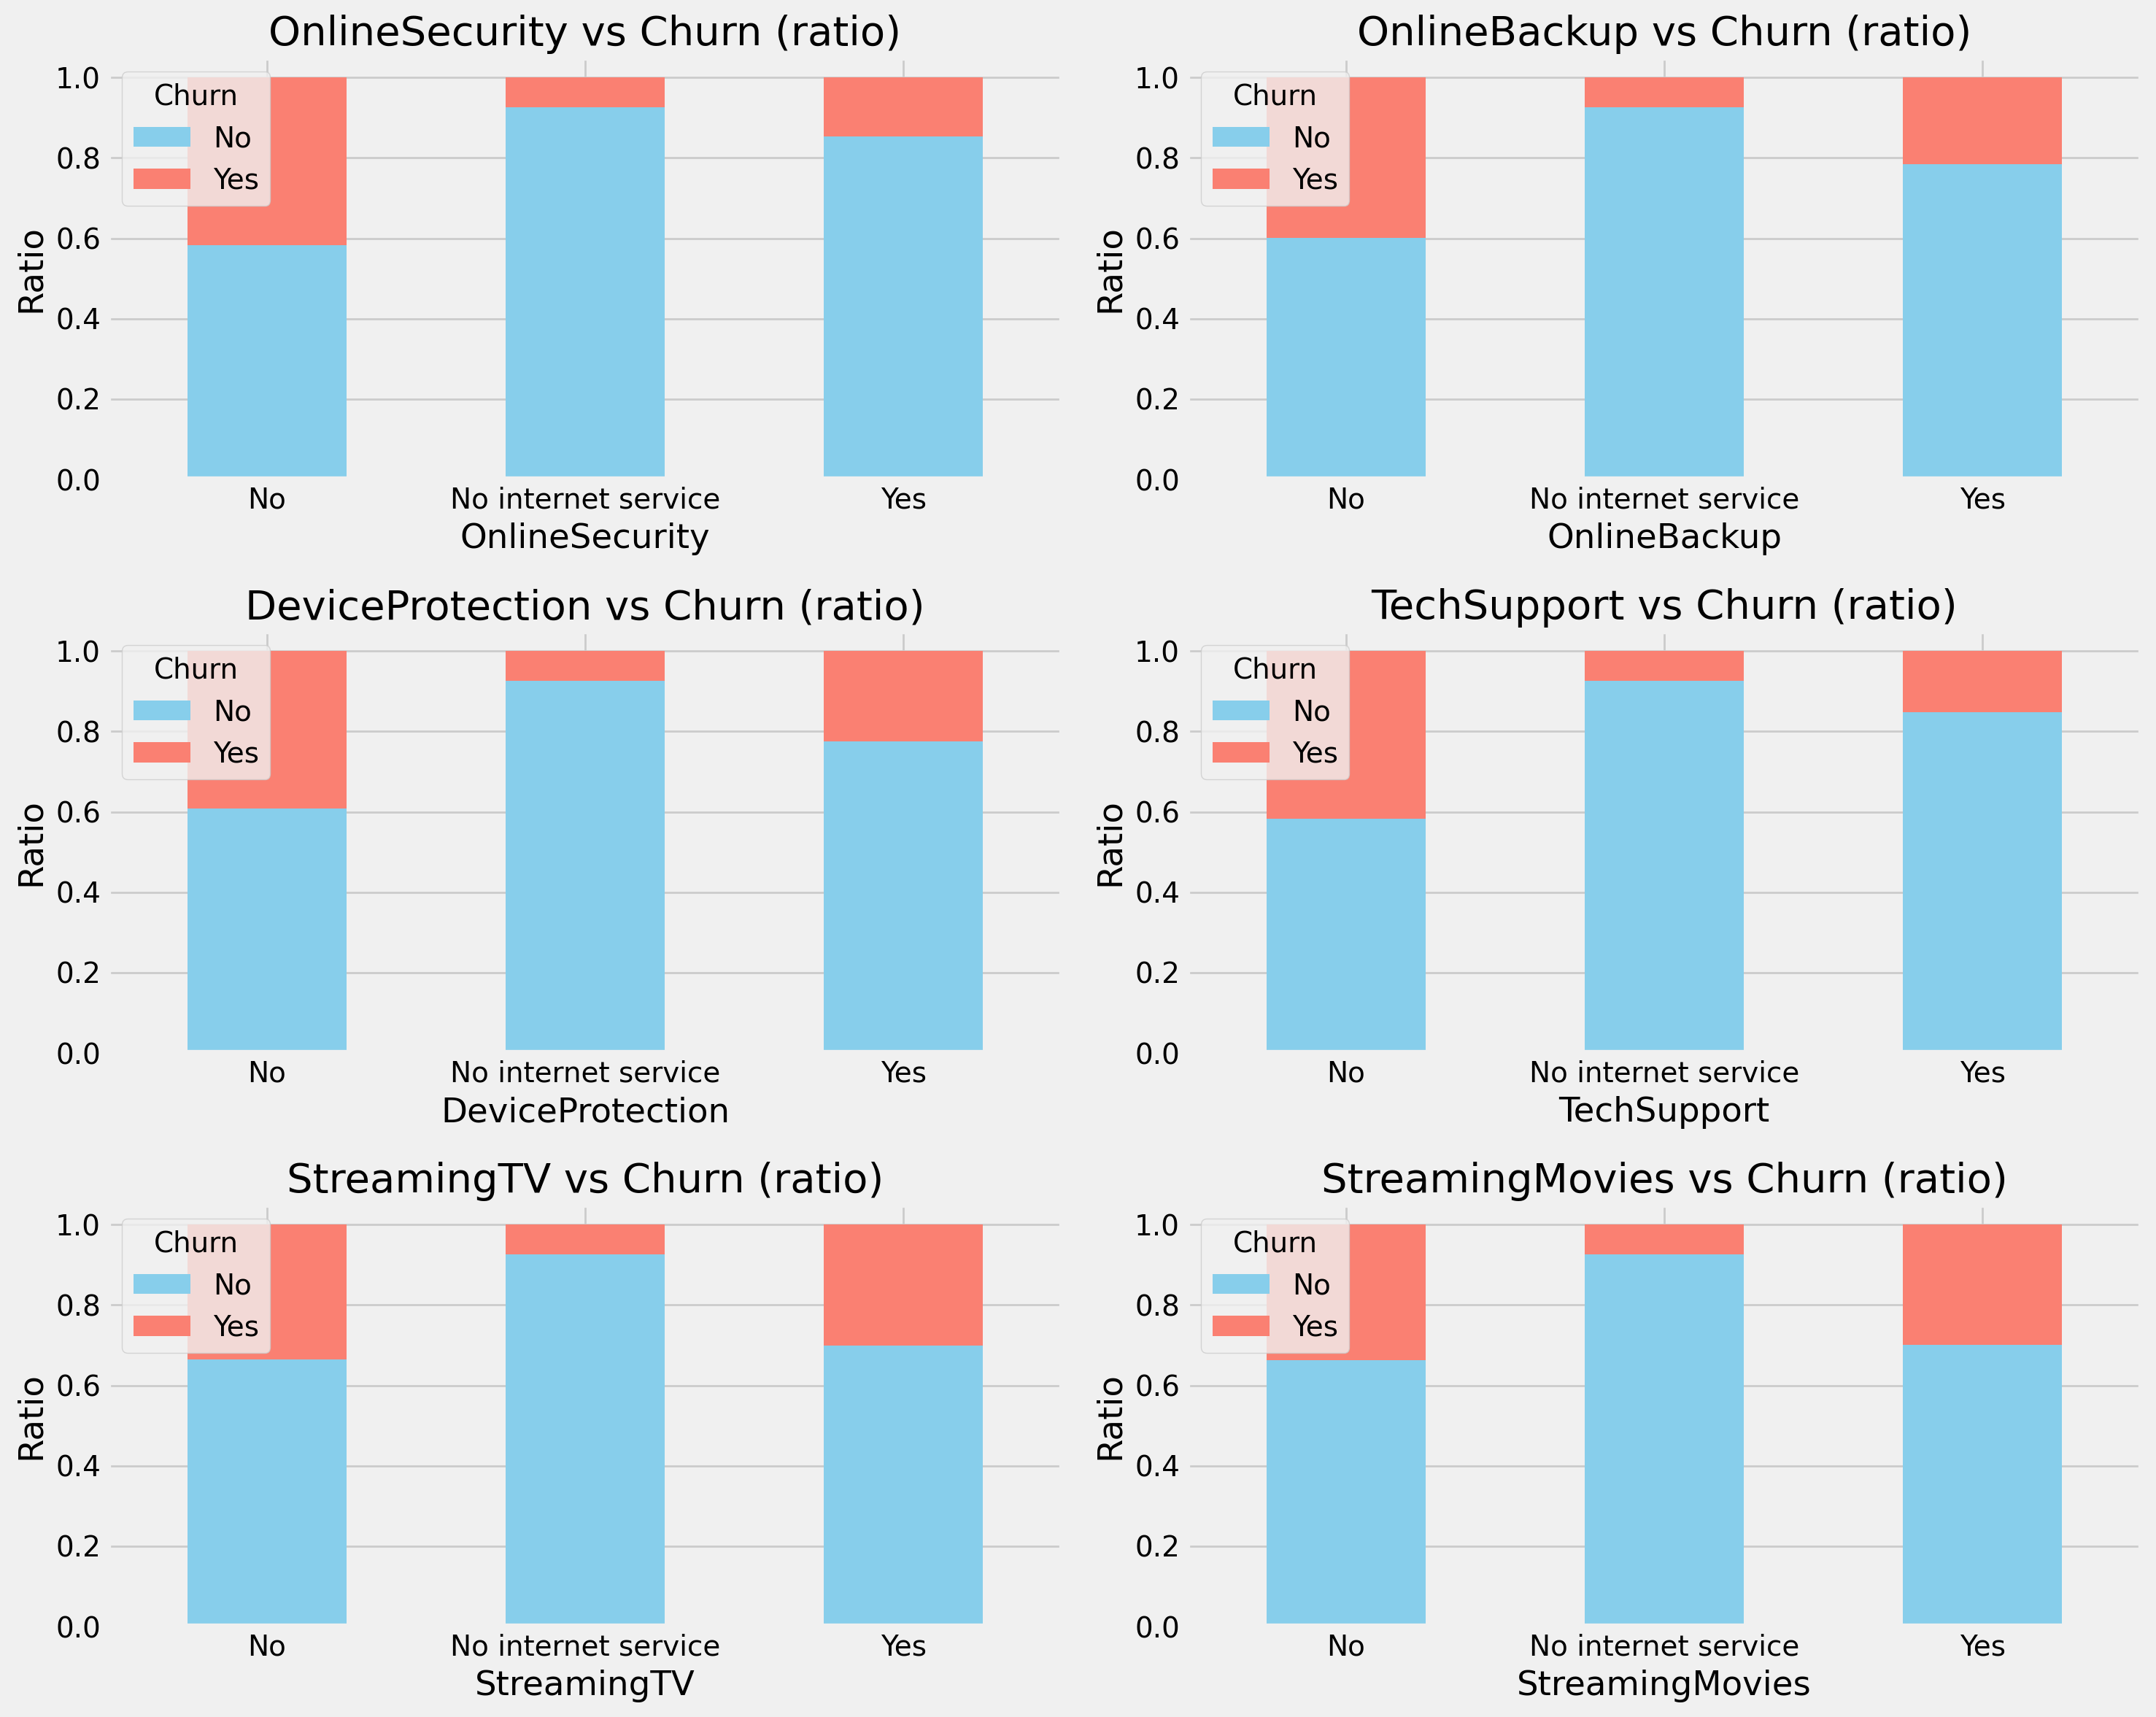

In [ ]:
# 온라인 및 기타 부가 서비스 관련 변수 vs Churn 비율 (x축 라벨 가로로 회전)
plot_categorical_vs_churn_ratio(online_service_columns, df, rows=3, cols=2, figsize=(15, 12), rotate_labels=True)

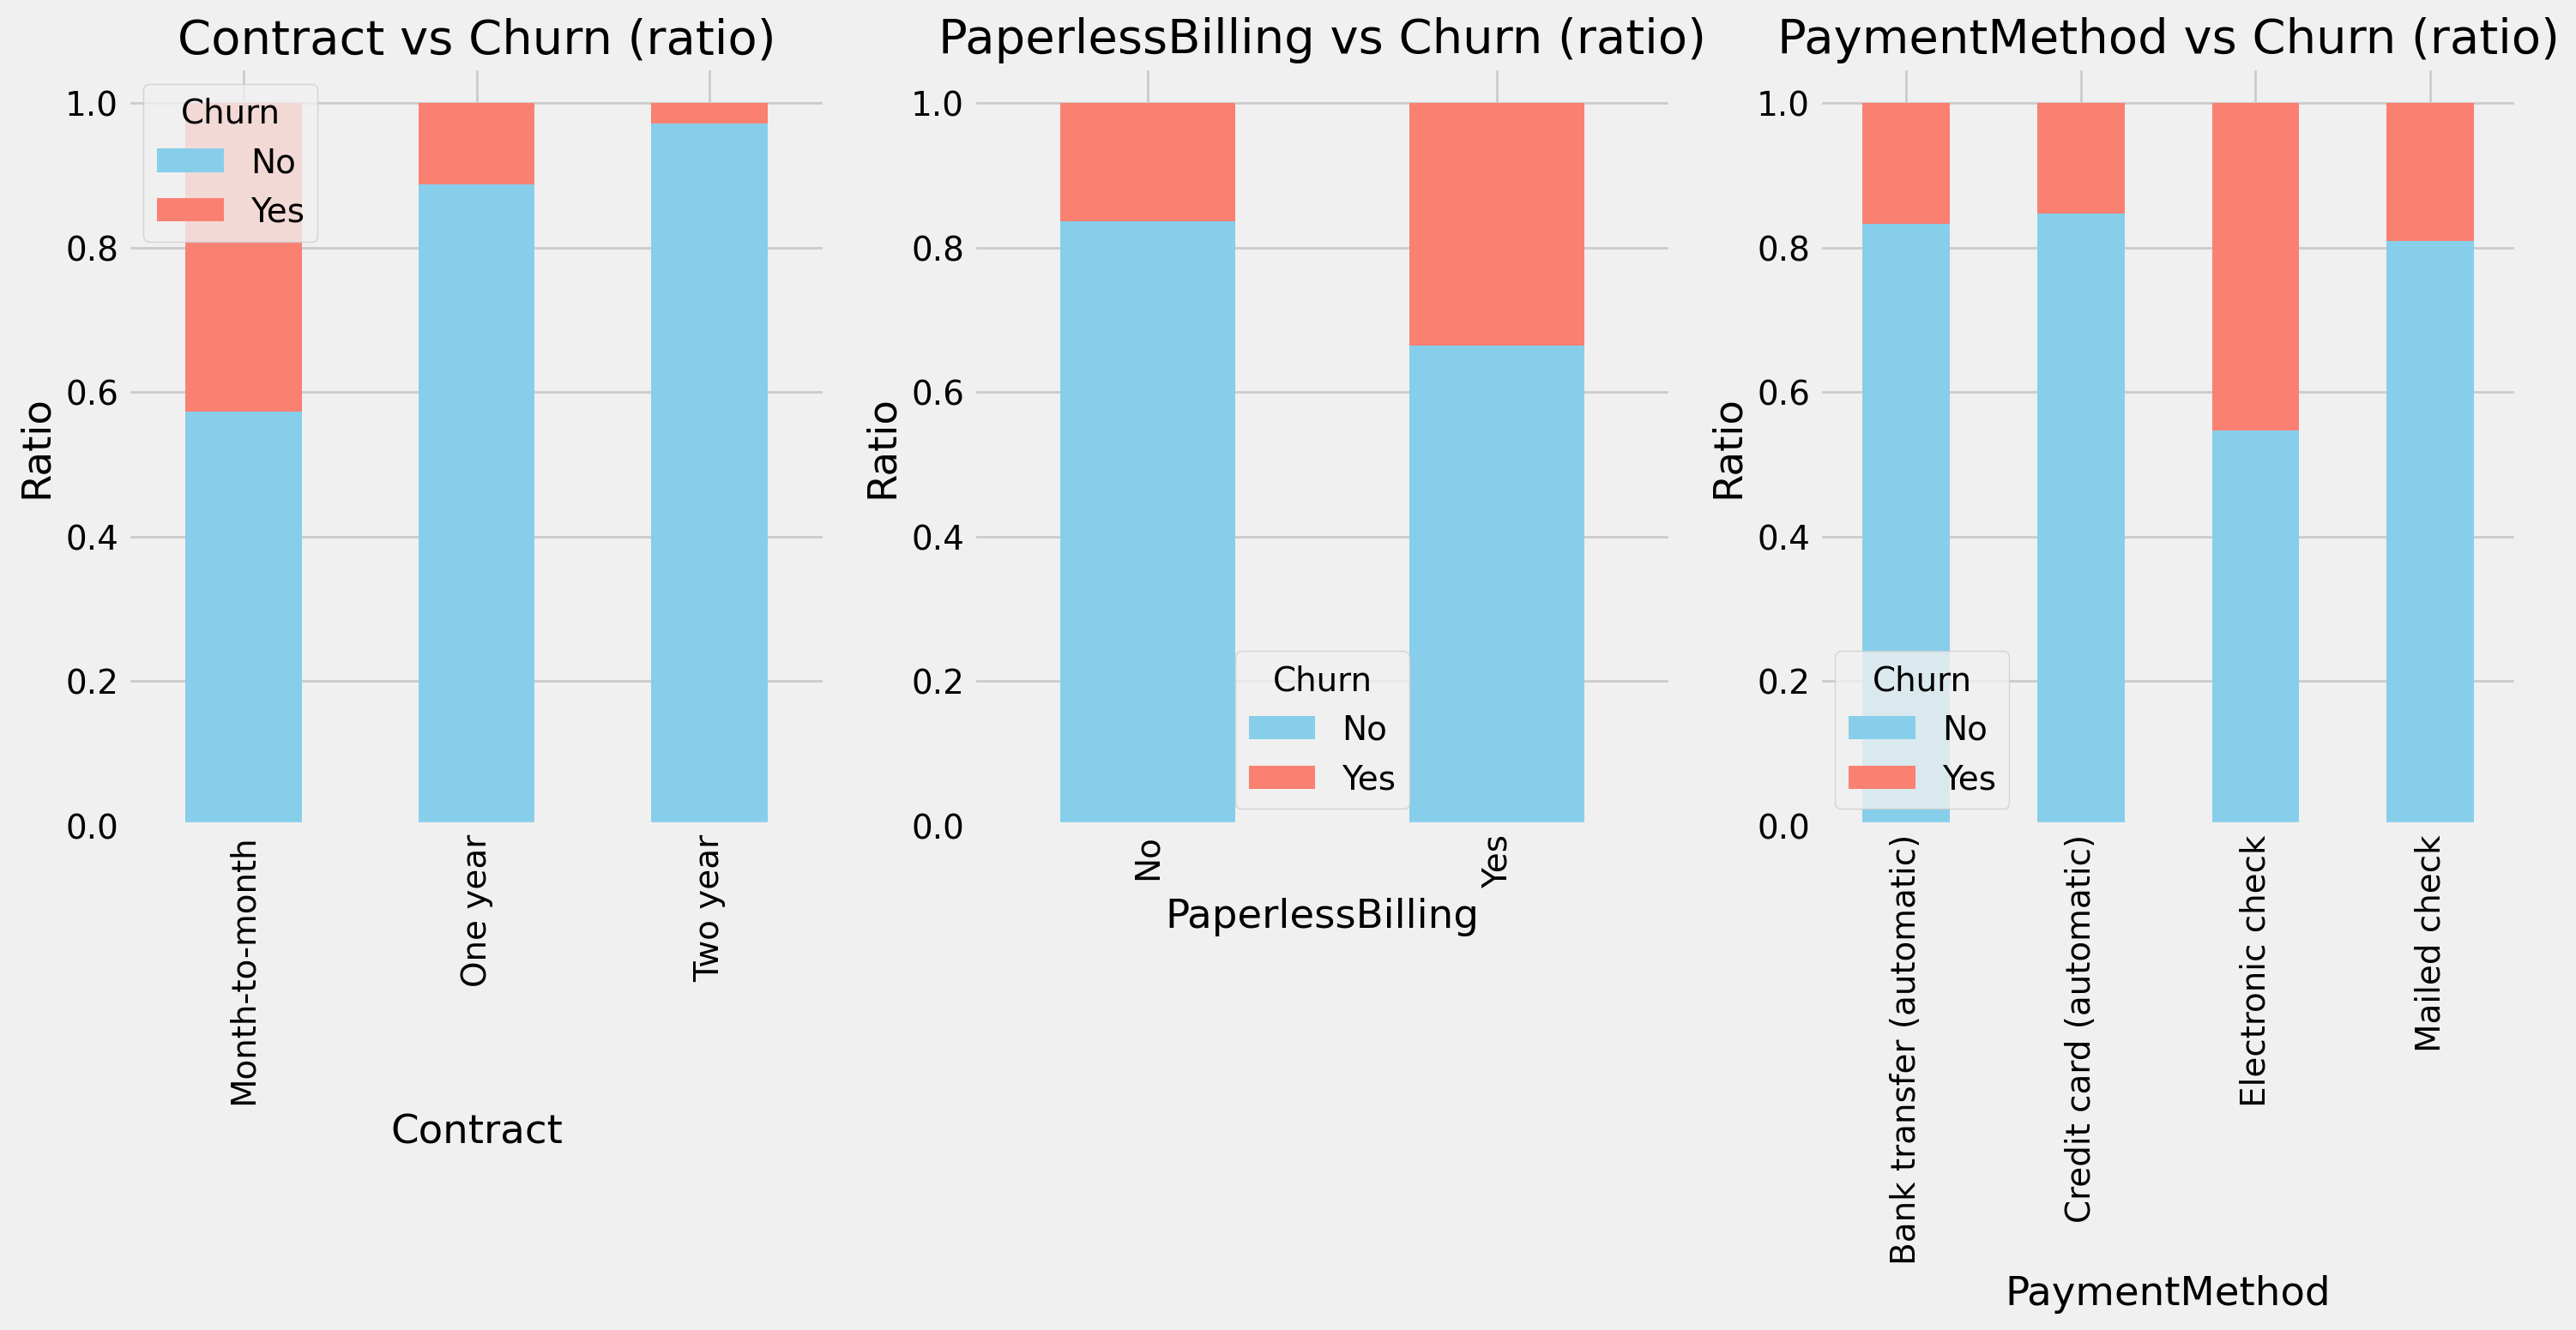

In [ ]:
# 계약 및 결제 관련 변수 vs Churn 비율
plot_categorical_vs_churn_ratio(contract_columns, df, rows=1, cols=3, figsize=(15, 8))

### 범주형 변수 vs Churn 분석 결론

1. **고객 특성 관련 변수**:
   - **`gender`**: 성별에 따른 이탈율 차이는 거의 없다.
   - **`SeniorCitizen`**: 고령자인 고객이 이탈할 확률이 더 높다.
   - **`Partner`**: 배우자가 없는 고객이 이탈할 확률이 더 높다.
   - **`Dependents`**: 부양가족이 없는 고객이 이탈할 확률이 더 높다.

2. **전화 및 인터넷 서비스 관련 변수**:
   - **`PhoneService`**: 전화 서비스 여부는 이탈율에 큰 차이를 보이지 않는다.
   - **`MultipleLines`**: 다중 전화선 여부도 이탈율에 크게 영향을 미치지 않는다.
   - **`InternetService`**: **Fiber optic**을 사용하는 고객이 이탈할 확률이 더 높으며, 인터넷 서비스를 사용하지 않는 고객은 이탈율이 매우 낮다.

3. **온라인 및 기타 부가 서비스 관련 변수**:
   - **`OnlineSecurity`**: 온라인 보안 서비스를 사용하지 않는 고객의 이탈율이 높다.
   - **`OnlineBackup`**: 백업 서비스를 사용하지 않는 고객의 이탈율이 높다.
   - **`DeviceProtection`**: 디바이스 보호 서비스를 사용하지 않는 고객의 이탈율이 높다.
   - **`TechSupport`**: 기술 지원 서비스를 받지 않는 고객의 이탈율이 높다.
   - **`StreamingTV`** 및 **`StreamingMovies`**: 스트리밍 서비스를 사용하는지 여부는 이탈율에 큰 영향을 미치지 않는다.

4. **계약 및 결제 관련 변수**:
   - **`Contract`**: **Month-to-month** 계약을 맺은 고객의 이탈율이 높으며, **Two year** 계약 고객의 이탈율이 가장 낮다.
   - **`PaperlessBilling`**: 종이 없는 청구서를 사용하는 고객의 이탈율이 더 높다.
   - **`PaymentMethod`**: **Electronic check**로 결제하는 고객의 이탈율이 가장 높다.


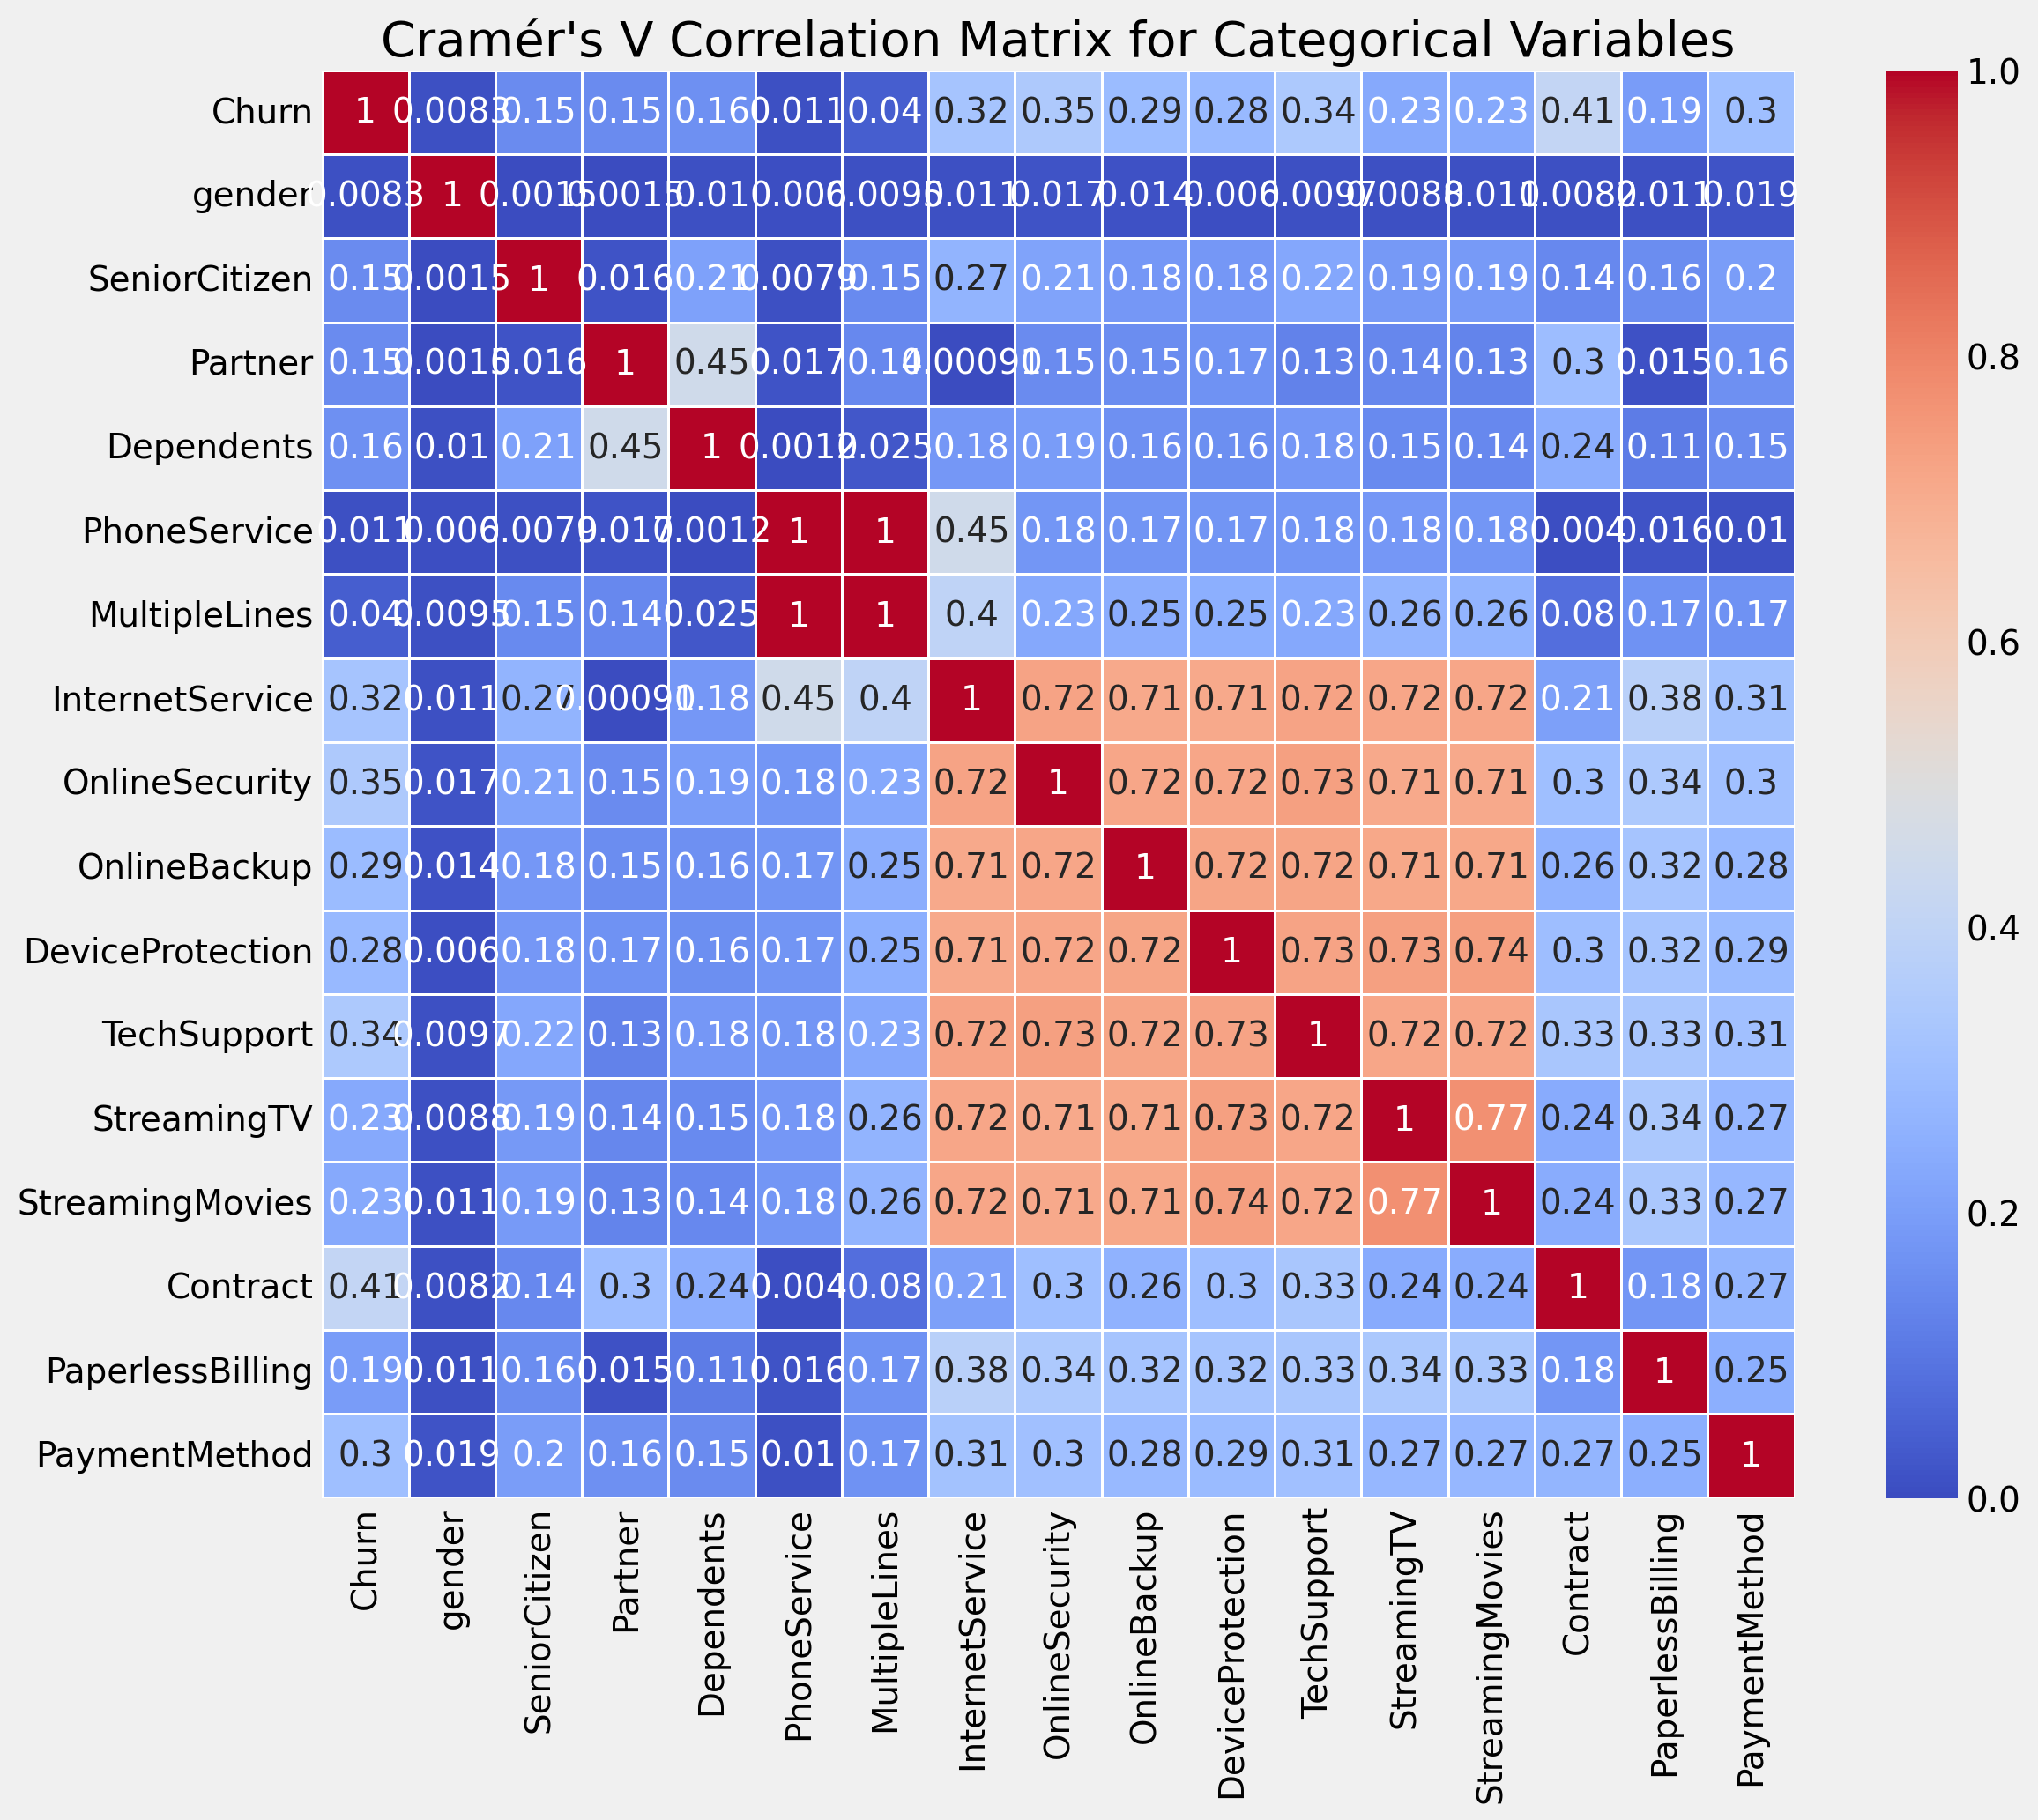

In [ ]:
from scipy.stats import chi2_contingency

# 범주형 변수 목록
category_cols = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Cramér's V 계산 함수
def cramers_v(col1, col2, df):
    """두 범주형 변수의 Cramér's V 값을 계산"""
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return (chi2 / (n * (min(confusion_matrix.shape) - 1)))**0.5

# 범주형 변수들 간의 Cramér's V 상관관계 행렬 생성
def create_cramers_v_matrix(category_cols, df):
    """범주형 변수들 간의 Cramér's V 상관관계 행렬 생성"""
    corr_matrix = pd.DataFrame(index=category_cols, columns=category_cols)

    for col1 in category_cols:
        for col2 in category_cols:
            corr_matrix.loc[col1, col2] = cramers_v(col1, col2, df)

    return corr_matrix.astype(float)

# Cramér's V 상관관계 히트맵 시각화
def plot_cramers_v_heatmap(corr_matrix):
    """Cramér's V 상관관계 히트맵을 시각화"""
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, linewidths=0.5)
    plt.title('Cramér\'s V Correlation Matrix for Categorical Variables')
    plt.show()

# Cramér's V 상관관계 행렬 생성 및 히트맵 시각화
corr_matrix = create_cramers_v_matrix(category_cols, df)
plot_cramers_v_heatmap(corr_matrix)

In [ ]:
# Cramér's V 계산 함수
def cramers_v(col1, col2, df):
    """두 범주형 변수의 Cramér's V 값을 계산"""
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return (chi2 / (n * (min(confusion_matrix.shape) - 1)))**0.5

# Churn과 각 변수 간의 Cramér's V 값 계산 및 출력 (정렬)
cramer_v_values = []

for col in category_cols:
    if col != 'Churn':  # 자신과의 비교는 제외
        cramer_v_value = cramers_v('Churn', col, df)
        cramer_v_values.append((col, cramer_v_value))

# Cramér's V 값을 정렬하여 출력
cramer_v_values.sort(key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
print("Cramér's V values for Churn vs other variables (sorted):")
for col, value in cramer_v_values:
    print(f'Cramér\'s V for Churn vs {col}: {value:.4f}')

Cramér's V values for Churn vs other variables (sorted):
Cramér's V for Churn vs Contract: 0.4101
Cramér's V for Churn vs OnlineSecurity: 0.3474
Cramér's V for Churn vs TechSupport: 0.3429
Cramér's V for Churn vs InternetService: 0.3225
Cramér's V for Churn vs PaymentMethod: 0.3034
Cramér's V for Churn vs OnlineBackup: 0.2923
Cramér's V for Churn vs DeviceProtection: 0.2816
Cramér's V for Churn vs StreamingMovies: 0.2310
Cramér's V for Churn vs StreamingTV: 0.2305
Cramér's V for Churn vs PaperlessBilling: 0.1915
Cramér's V for Churn vs Dependents: 0.1639
Cramér's V for Churn vs SeniorCitizen: 0.1505
Cramér's V for Churn vs Partner: 0.1501
Cramér's V for Churn vs MultipleLines: 0.0401
Cramér's V for Churn vs PhoneService: 0.0114
Cramér's V for Churn vs gender: 0.0083


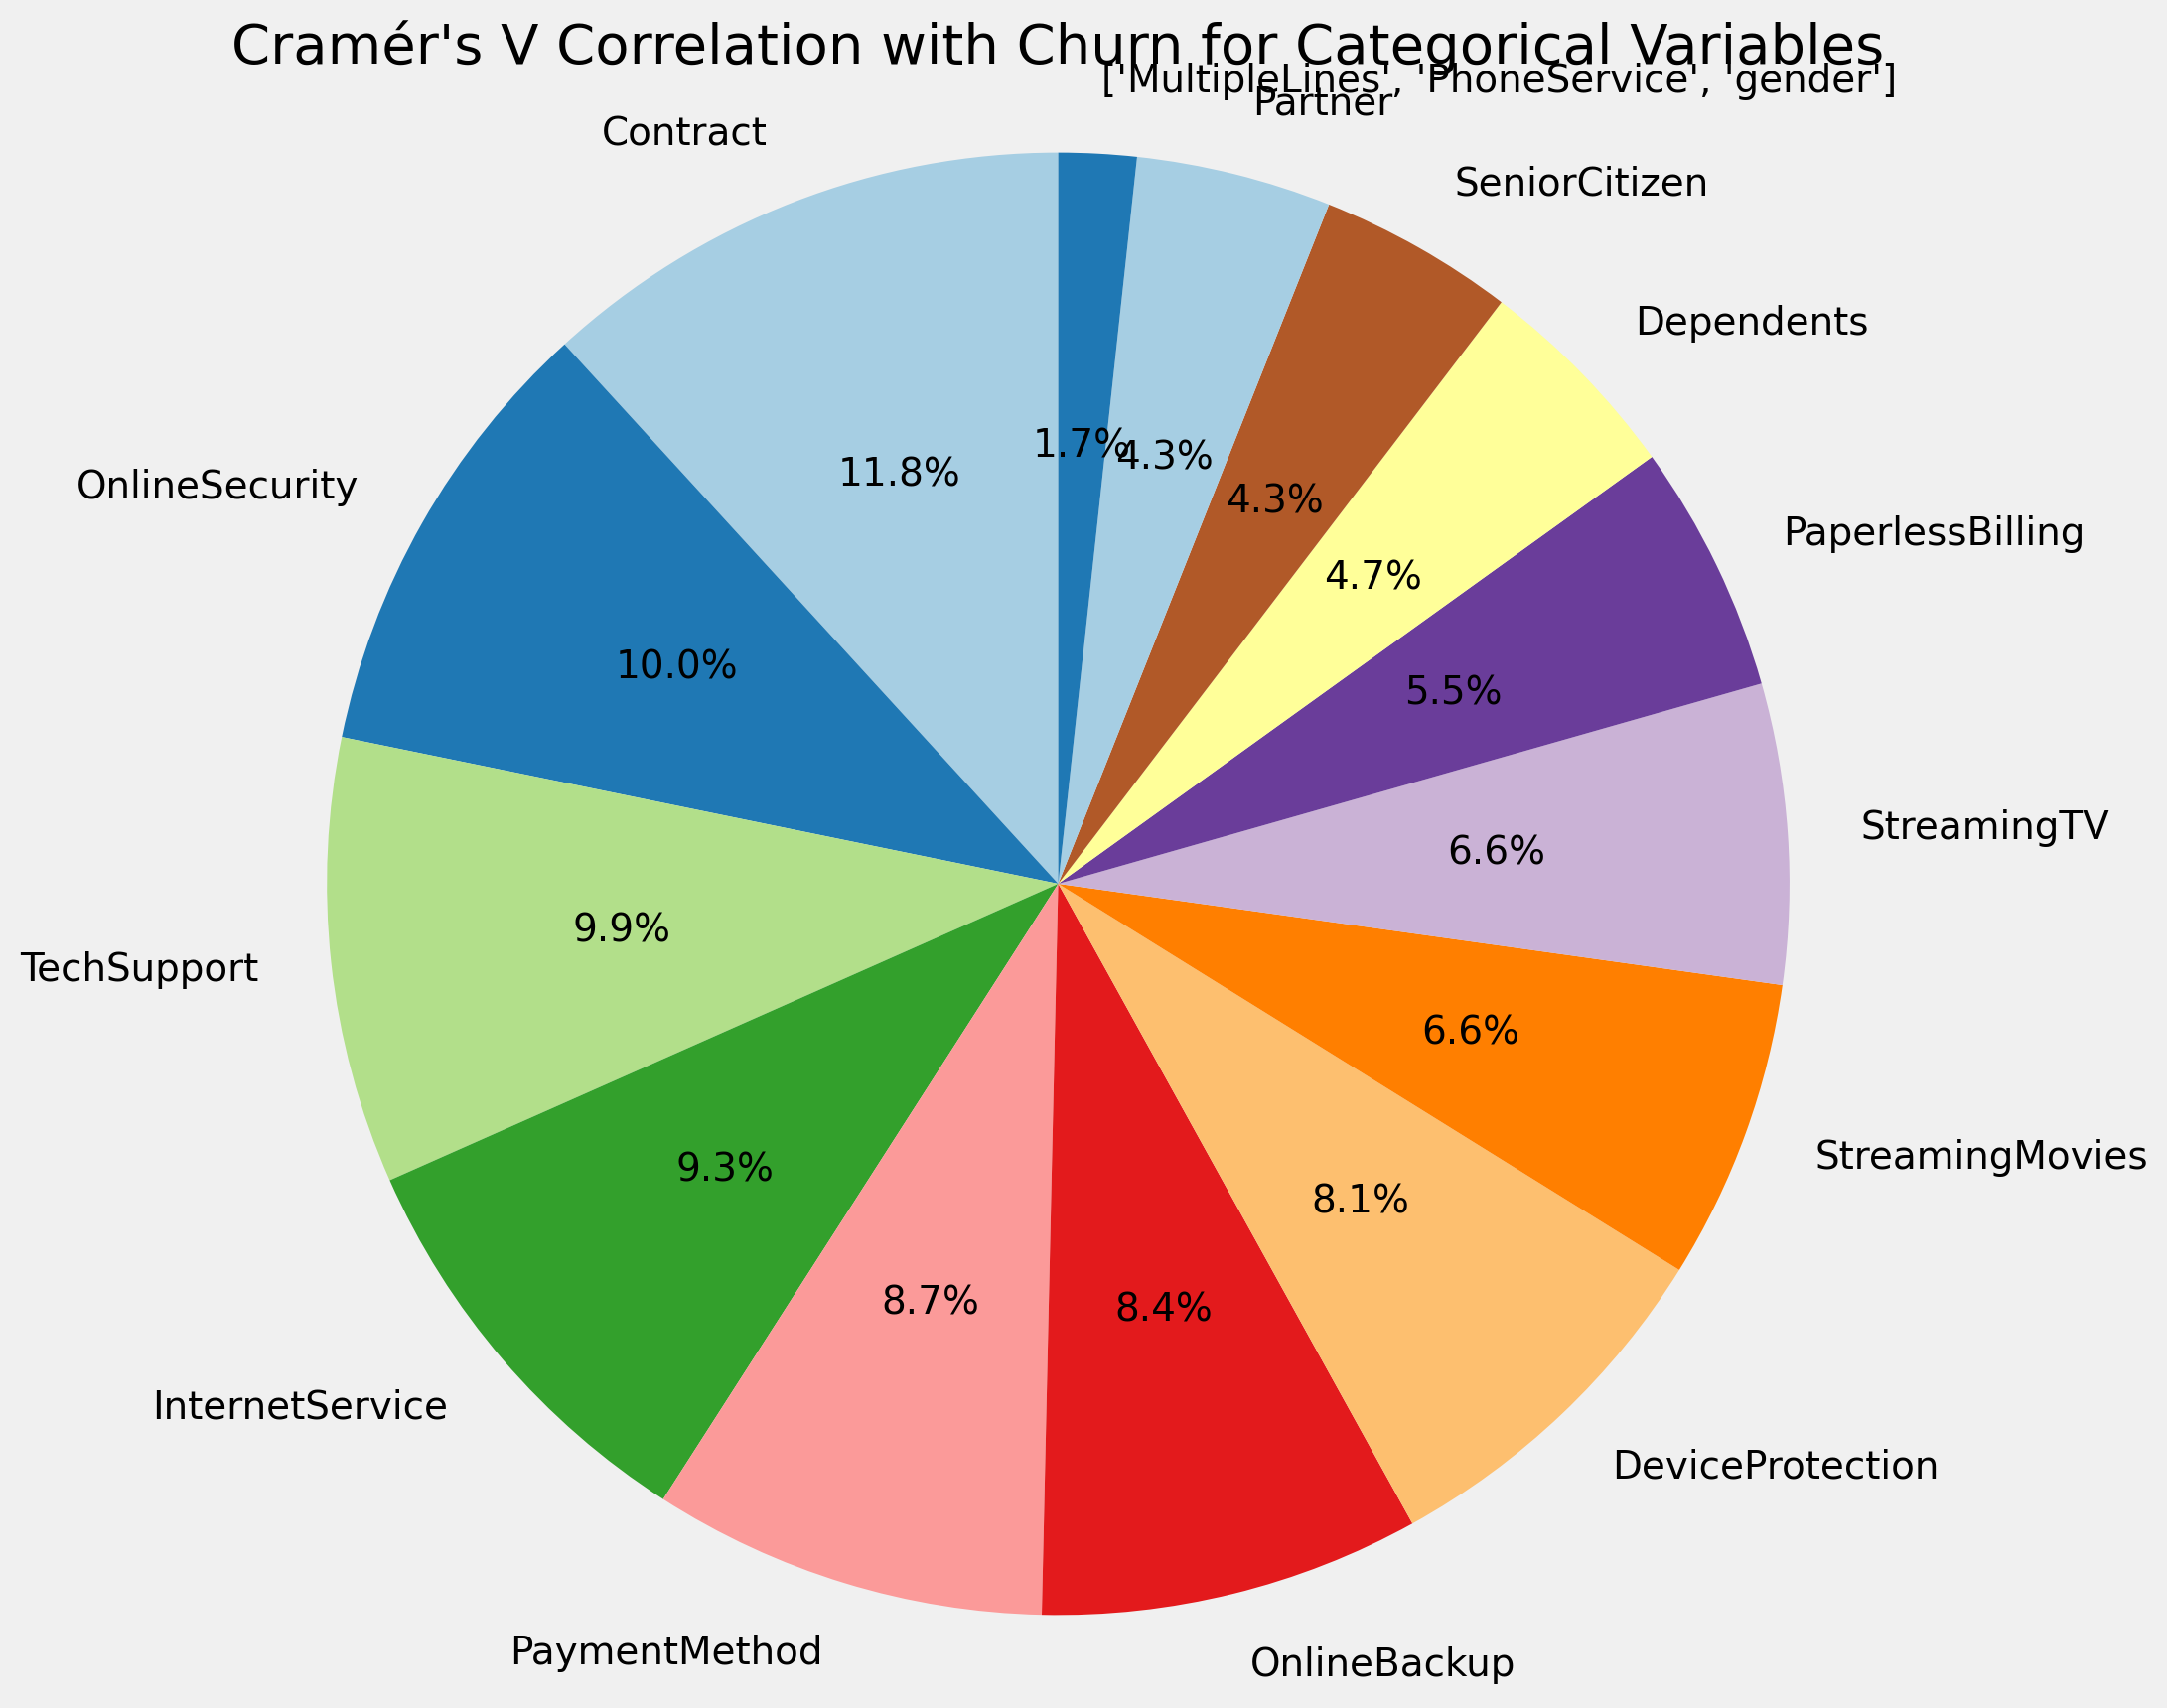

In [ ]:
features = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod', 'OnlineBackup',
            'DeviceProtection', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling', 'Dependents',
            'SeniorCitizen', 'Partner']
cramers_v_values = [0.4101, 0.3474, 0.3429, 0.3225, 0.3034, 0.2923, 0.2816, 0.2310, 0.2305,
                    0.1915, 0.1639, 0.1505, 0.1501]

remaining_features = ['MultipleLines', 'PhoneService', 'gender']
remaining_value = sum([0.0401, 0.0114, 0.0083])

features.append(remaining_features)
cramers_v_values.append(remaining_value)


plt.figure(figsize=(10, 10))
plt.pie(cramers_v_values, labels=features, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Cramér\'s V Correlation with Churn for Categorical Variables')
plt.axis('equal')
plt.show()


### 범주형 변수 간의 Cramér's V 상관관계 결론

1. **Churn과 관련된 상관관계**:
   - **InternetService**와 **OnlineSecurity**는 Churn과 가장 강한 상관관계를 보인다 (0.32, 0.35).
   - **TechSupport**와 **Contract** 또한 Churn과 비교적 높은 상관관계를 가지고 있다 (0.34, 0.41).

2. **서비스 관련 변수들 간의 상관관계**:
   - **인터넷 관련 서비스**들 (e.g., **InternetService**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**)는 서로 강한 상관관계를 보인다 (0.7 이상).
   - **StreamingTV**와 **StreamingMovies**는 서로 매우 높은 상관관계를 보인다 (0.77).

3. **가장 중요한 상관관계 - PhoneService와 MultipleLines**:
   - **PhoneService**와 **MultipleLines**는 **완벽한 상관관계**(Cramér's V = 1)를 가진다.
    - 이는 **PhoneService**가 있는 고객은 **MultipleLines**를 사용하거나 사용하지 않는 선택을 하게 되고, **PhoneService**가 없는 고객은 **MultipleLines** 역시 "No phone service" 상태로 설정되기 때문

4. **고객 특성 변수들 간의 상관관계**:
   - **Partner**와 **Dependents**는 서로 가장 높은 상관관계 (0.45)를 보인다. 이는 배우자가 있는 고객일수록 부양가족이 있을 가능성이 높음을 시사한다.
   - **SeniorCitizen**은 다른 고객 특성 변수들과는 낮은 상관관계를 보인다.

- **PhoneService** 나 **MultipleLines** 중 하나 제거 가능 일반적으로 Multiplelines 제거

### Cramér's V 상관관계 분석 결과 요약 (Churn vs Other Variables)

1. **가장 중요한 변수들**:
   - **Contract**: Churn과 가장 높은 상관관계를 보임 (**0.4101**). 계약 유형이 Churn 여부에 중요한 영향을 미침.
   - **OnlineSecurity**: 온라인 보안 서비스 사용 여부가 Churn과 강한 상관관계 (**0.3474**).
   - **TechSupport**: 기술 지원 서비스 제공 여부가 Churn과 높은 상관관계 (**0.3429**).
   - **InternetService**: 인터넷 서비스 유형도 Churn과 상관관계가 있음 (**0.3225**).
   - **PaymentMethod**: 결제 방식이 Churn과 비교적 높은 상관관계 (**0.3034**).

2. **중간 정도의 상관관계**:
   - **OnlineBackup**, **DeviceProtection**: 백업 및 디바이스 보호 서비스 여부도 Churn과 중간 정도의 상관관계 (각각 **0.2923**, **0.2816**).
   - **StreamingMovies**, **StreamingTV**: 스트리밍 서비스 사용 여부는 Churn과 중간 정도의 상관관계를 보임 (각각 **0.2310**, **0.2305**).
   - **PaperlessBilling**: 종이 없는 청구서 사용 여부가 Churn과 일부 상관관계 (**0.1915**).

3. **약한 상관관계**:
   - **Dependents**, **SeniorCitizen**, **Partner**: 고객의 개인적인 특성(부양가족, 고령자 여부, 배우자 여부)이 Churn과 약한 상관관계 (각각 **0.1639**, **0.1505**, **0.1501**).

4. **매우 낮은 상관관계**:
   - **MultipleLines**, **PhoneService**, **gender**: 다중 전화선 여부, 전화 서비스 여부, 성별은 Churn과 거의 상관관계가 없음 (각각 **0.0401**, **0.0114**, **0.0083**).


In [ ]:
# 상관관계가 높은 범주형 변수 목록
important_category_cols = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod']

# 수치형 변수 목록
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 범주형 변수에 따른 수치형 변수의 평균과 중위값 계산
for cat_col in important_category_cols:
    print(f"--- Analysis for {cat_col} ---")
    for num_col in numerical_cols:
        group_stats = df.groupby(cat_col, observed=True)[num_col].agg(['mean', 'median'])  # observed=True 추가
        print(f"\n{num_col} stats by {cat_col}:")
        print(group_stats)
    print("\n")

--- Analysis for Contract ---

tenure stats by Contract:
                     mean  median
Contract                         
Month-to-month  18.036645    12.0
One year        42.044807    44.0
Two year        56.735103    64.0

MonthlyCharges stats by Contract:
                     mean  median
Contract                         
Month-to-month  66.398490   73.25
One year        65.048608   68.75
Two year        60.770413   64.35

TotalCharges stats by Contract:
                       mean   median
Contract                            
Month-to-month  1369.254581   679.55
One year        3034.172981  2656.70
Two year        3720.405135  3593.80


--- Analysis for OnlineSecurity ---

tenure stats by OnlineSecurity:
                          mean  median
OnlineSecurity                        
No                   25.850772    19.0
No internet service  30.547182    25.0
Yes                  45.046558    50.0

MonthlyCharges stats by OnlineSecurity:
                          mean  median
Onli

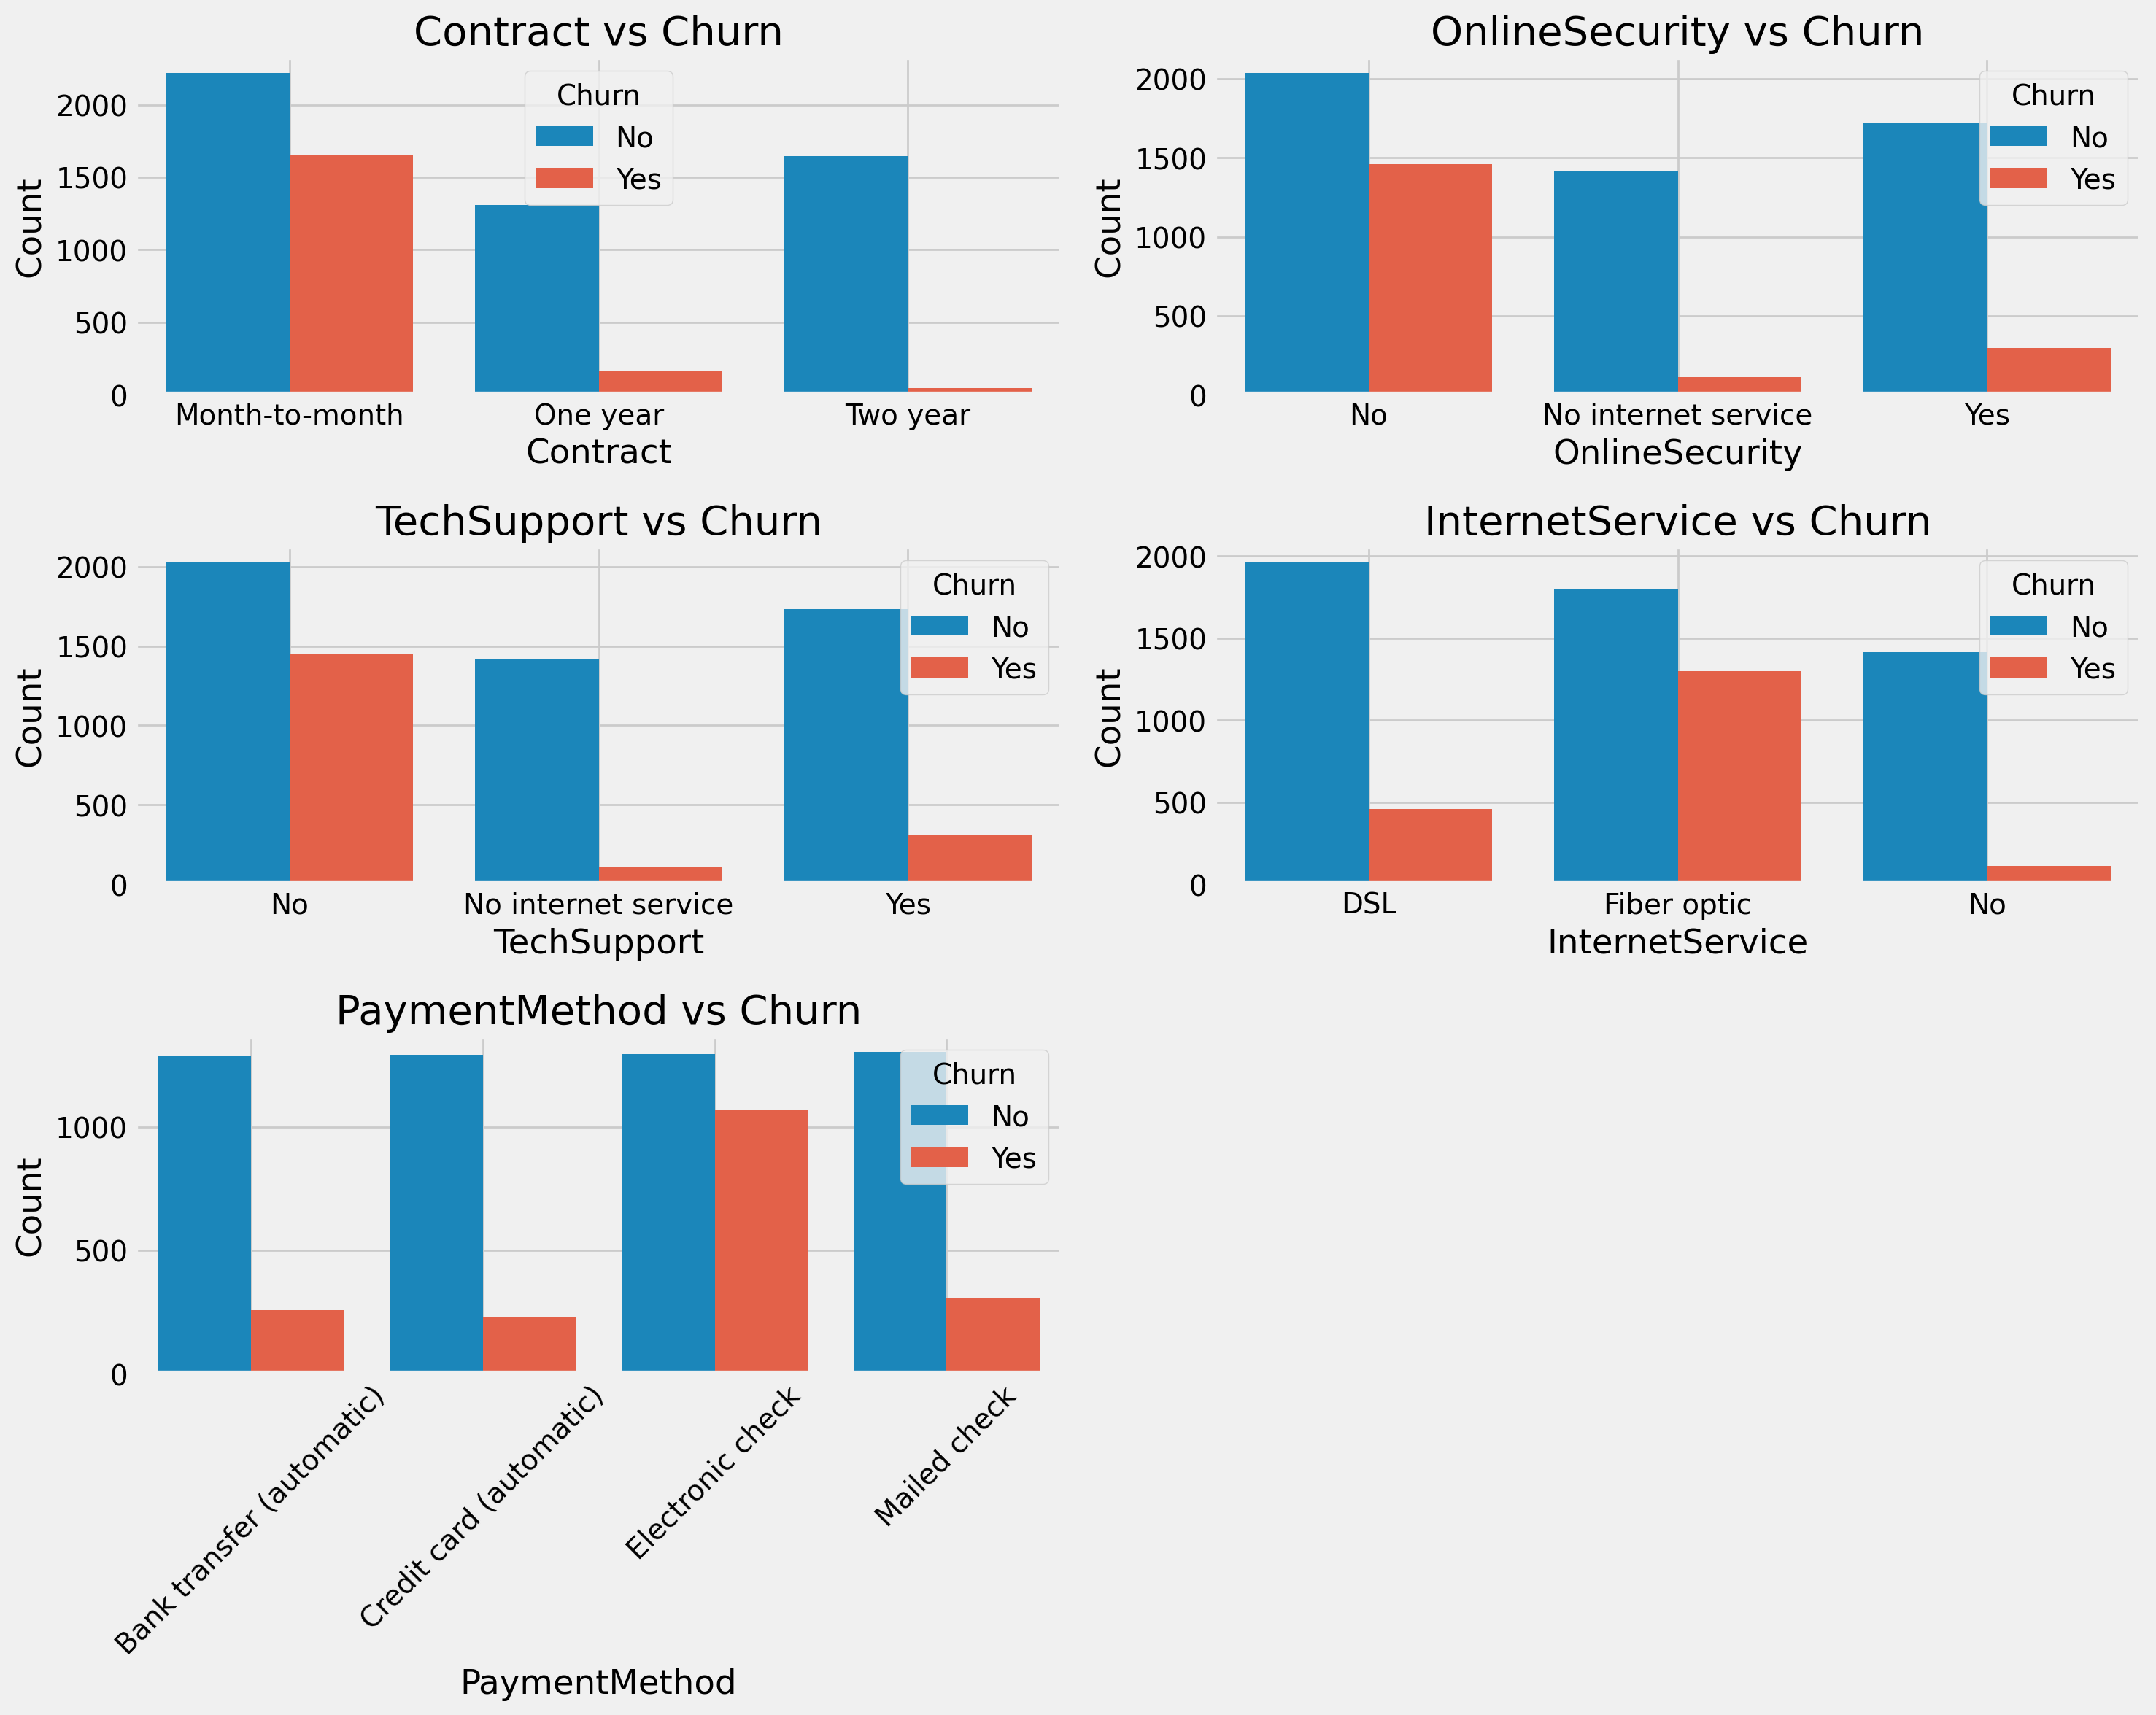

In [ ]:
# 상관관계가 높은 범주형 변수 목록
important_category_cols = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod']

plt.figure(figsize=(15, 12))

for i, column in enumerate(important_category_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.grid(True)
    if column == 'PaymentMethod':
      plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 이탈율을 낮추기 위한 피처 조정 제안

#### 1. **Contract (계약 유형)**
- **Month-to-month 계약** 고객의 이탈율이 높고 **Two year 계약**을 맺은 고객의 이탈율은 매우 낮다.
- 단기 계약을 줄이고 장기 계약 비율을 늘린다.

**서비스 제안**:
- 장기 계약을 독려하는 정책을 도입
  - 신규가입자 **One year** 또는 **Two year 계약**을 선택할 때 더 많은 혜택이나 할인을 제공
  - 기존 사용자 **Month-to-month 계약**의 고객에게 장기 계약으로 전환할 때 인센티브를 제공

#### 2. **OnlineSecurity (온라인 보안 서비스)**
- **No(온라인 보안 서비스가 없는 경우)** 고객의 이탈율이 높다.
- **Yes(온라인 보안 서비스를 사용하는 경우)** 이탈율이 낮다.
- 온라인 보안서비스 비율을 늘린다.

**서비스 제안**:
- **온라인 보안 서비스**를 추가하도록 권장
  - 추가 서비스의 혜택을 강조하는 마케팅을 진행
  - **무료 체험**이나 **할인 프로모션**을 제공

#### 3. **TechSupport (기술 지원 서비스)**
- **No(기술 지원 서비스를 사용하지 않는 고객)**의 이탈율이 높다.
- **Yes(기술 지원 서비스를 사용하는 고객)**은 이탈율이 낮다.
- 기술 지원 서비스 비율을 늘린다.

**서비스 제안**:
  - **기술 지원 서비스**의 혜택을 강조하고 사용하지 않는 고객에게 이를 **추가 서비스로 포함**할 수 있는 옵션을 제공

#### 4. **InternetService (인터넷 서비스 유형)**
- **Fiber optic** 서비스를 사용하는 고객의 이탈율이 높다.
- **DSL** 서비스를 사용하는 고객의 이탈율은 상대적으로 낮다.

**서비스 제안**:
  - **Fiber optic 서비스**에 대한 서비스 품질 개선이나 가격 재검토가 필요
    - 추가 혜택을 제공하거나 **속도 및 안정성 개선**을 위해 노력

#### 5. **PaymentMethod (결제 방식)**
- **Electronic check**로 결제하는 고객의 이탈율이 높다.
- **Bank transfer(자동 이체)**, **Credit card(자동)** 방식의 결제를 사용하는 고객의 이탈율은 상대적으로 낮다.

**서비스 제안**:
- **Electronic check** 결제 고객에게 **자동 이체**나 **신용카드 결제**로 전환할 수 있는 혜택을 제공

---

### 종합적인 제안:
- **장기 계약**과 **추가 서비스**를 통해 고객 이탈율을 낮출 수 있습니다.
- **결제 방식**과 **부가 서비스(온라인 보안, 기술 지원)**를 개선하는 정책을 통해 이탈율을 낮출 수 있습니다.
- 특히 **고객 서비스 개선**과 **가격 정책**을 통해 고객 만족도를 높여, 이탈율을 줄일 수 있습니다.


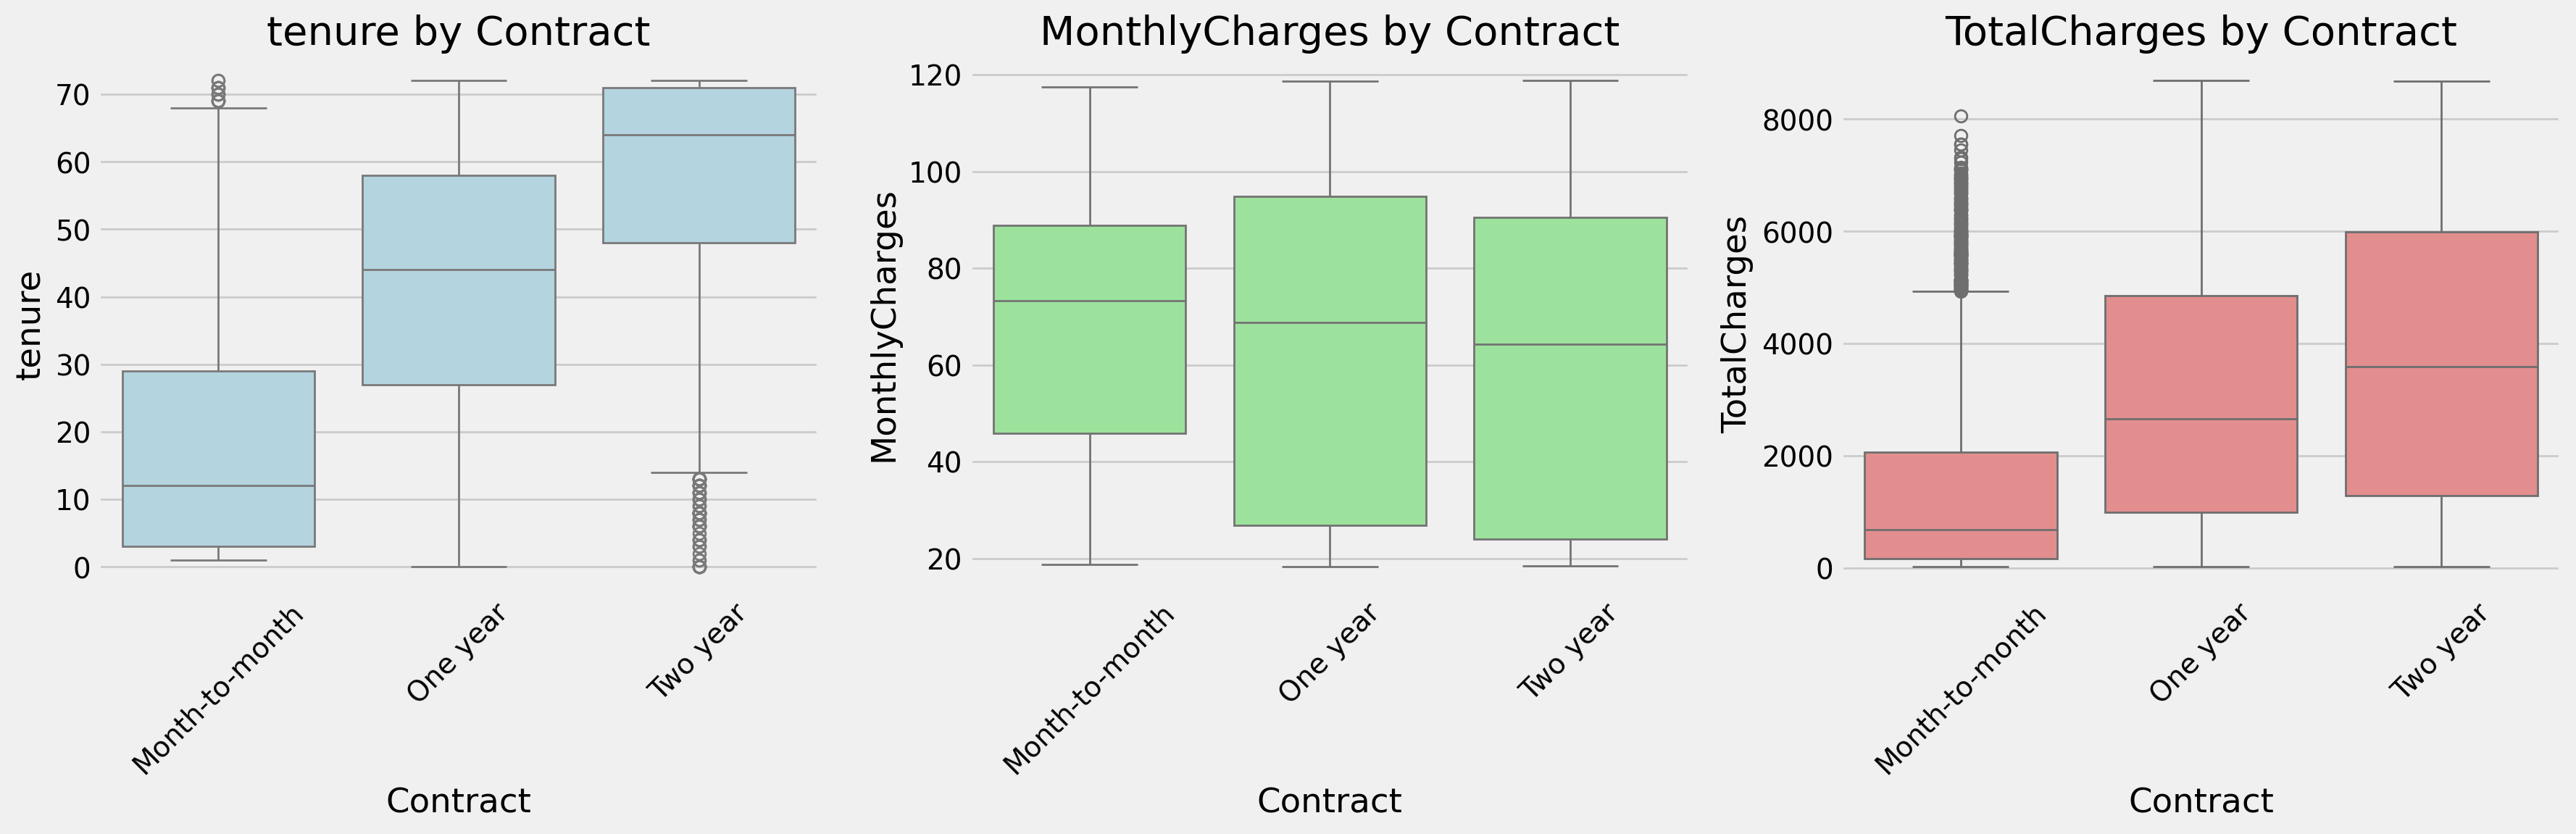

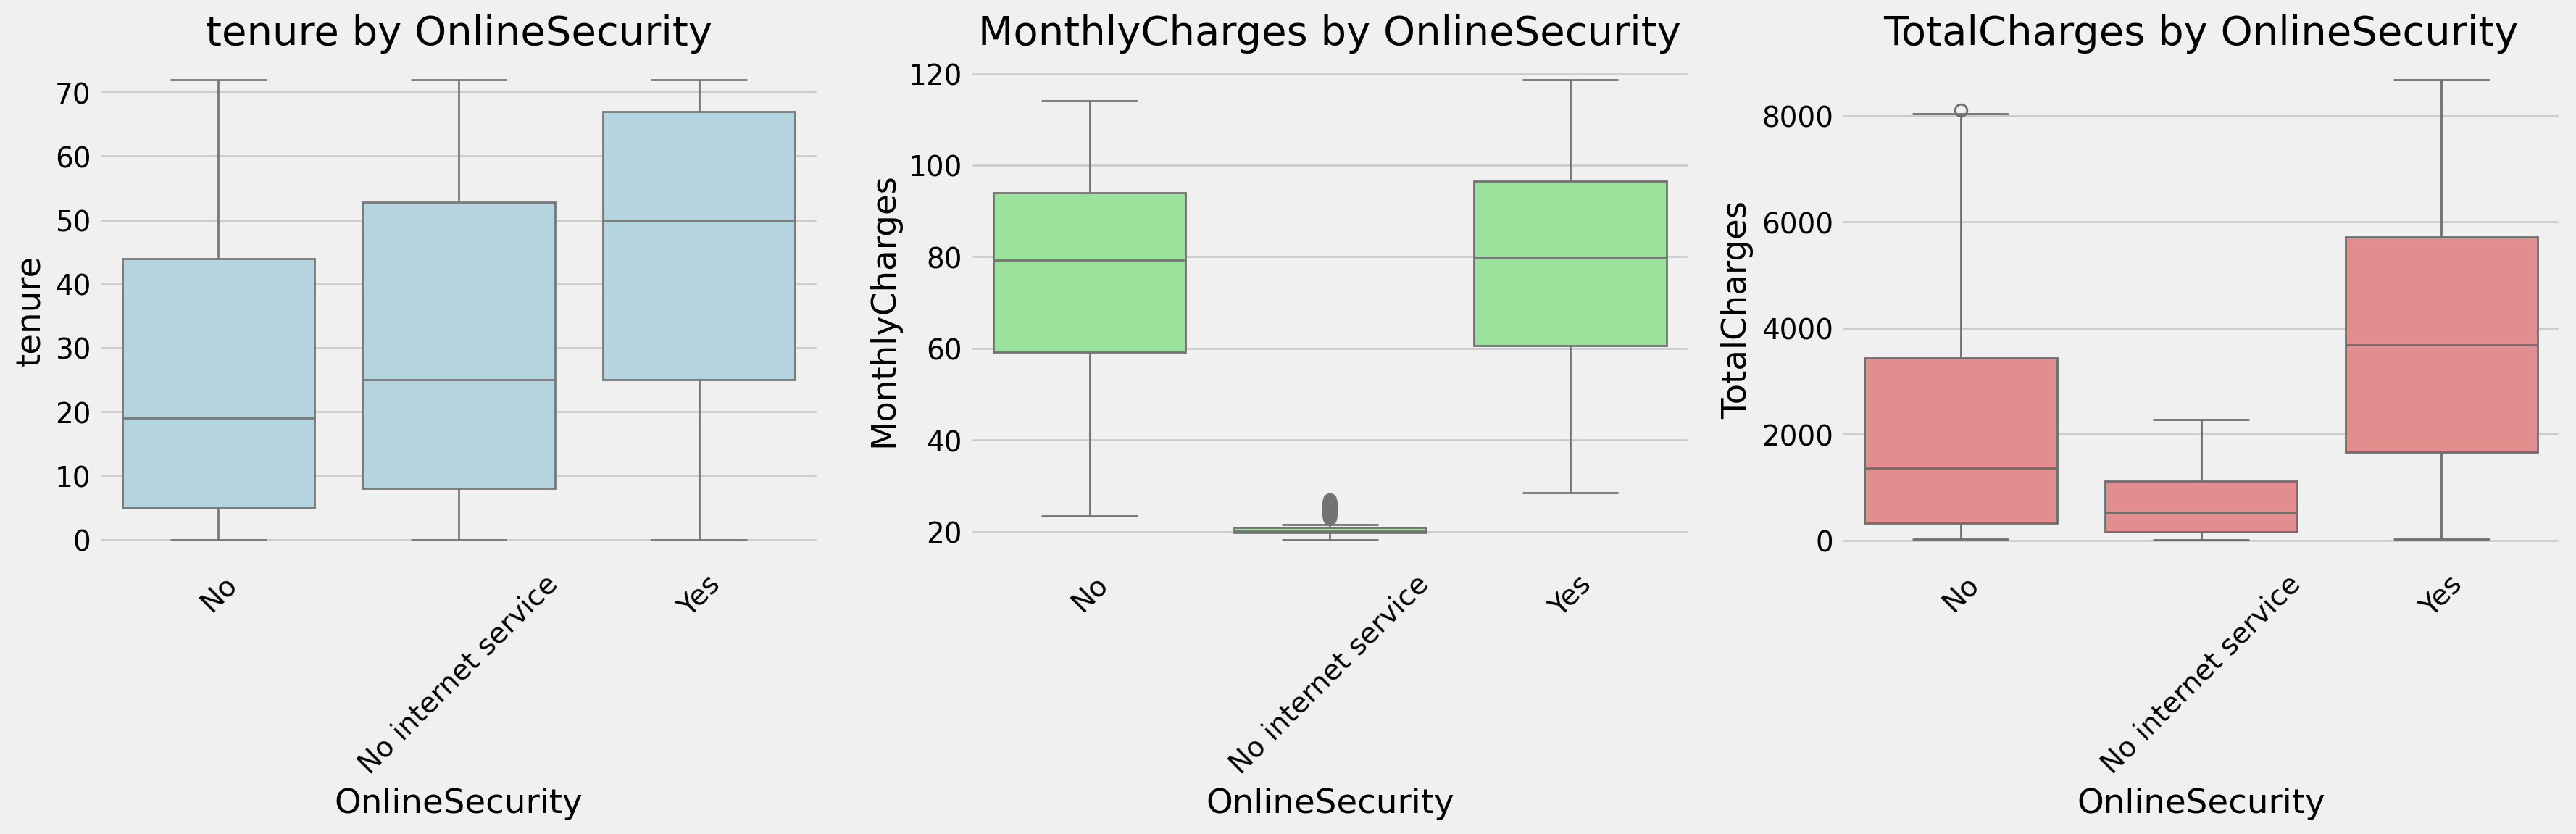

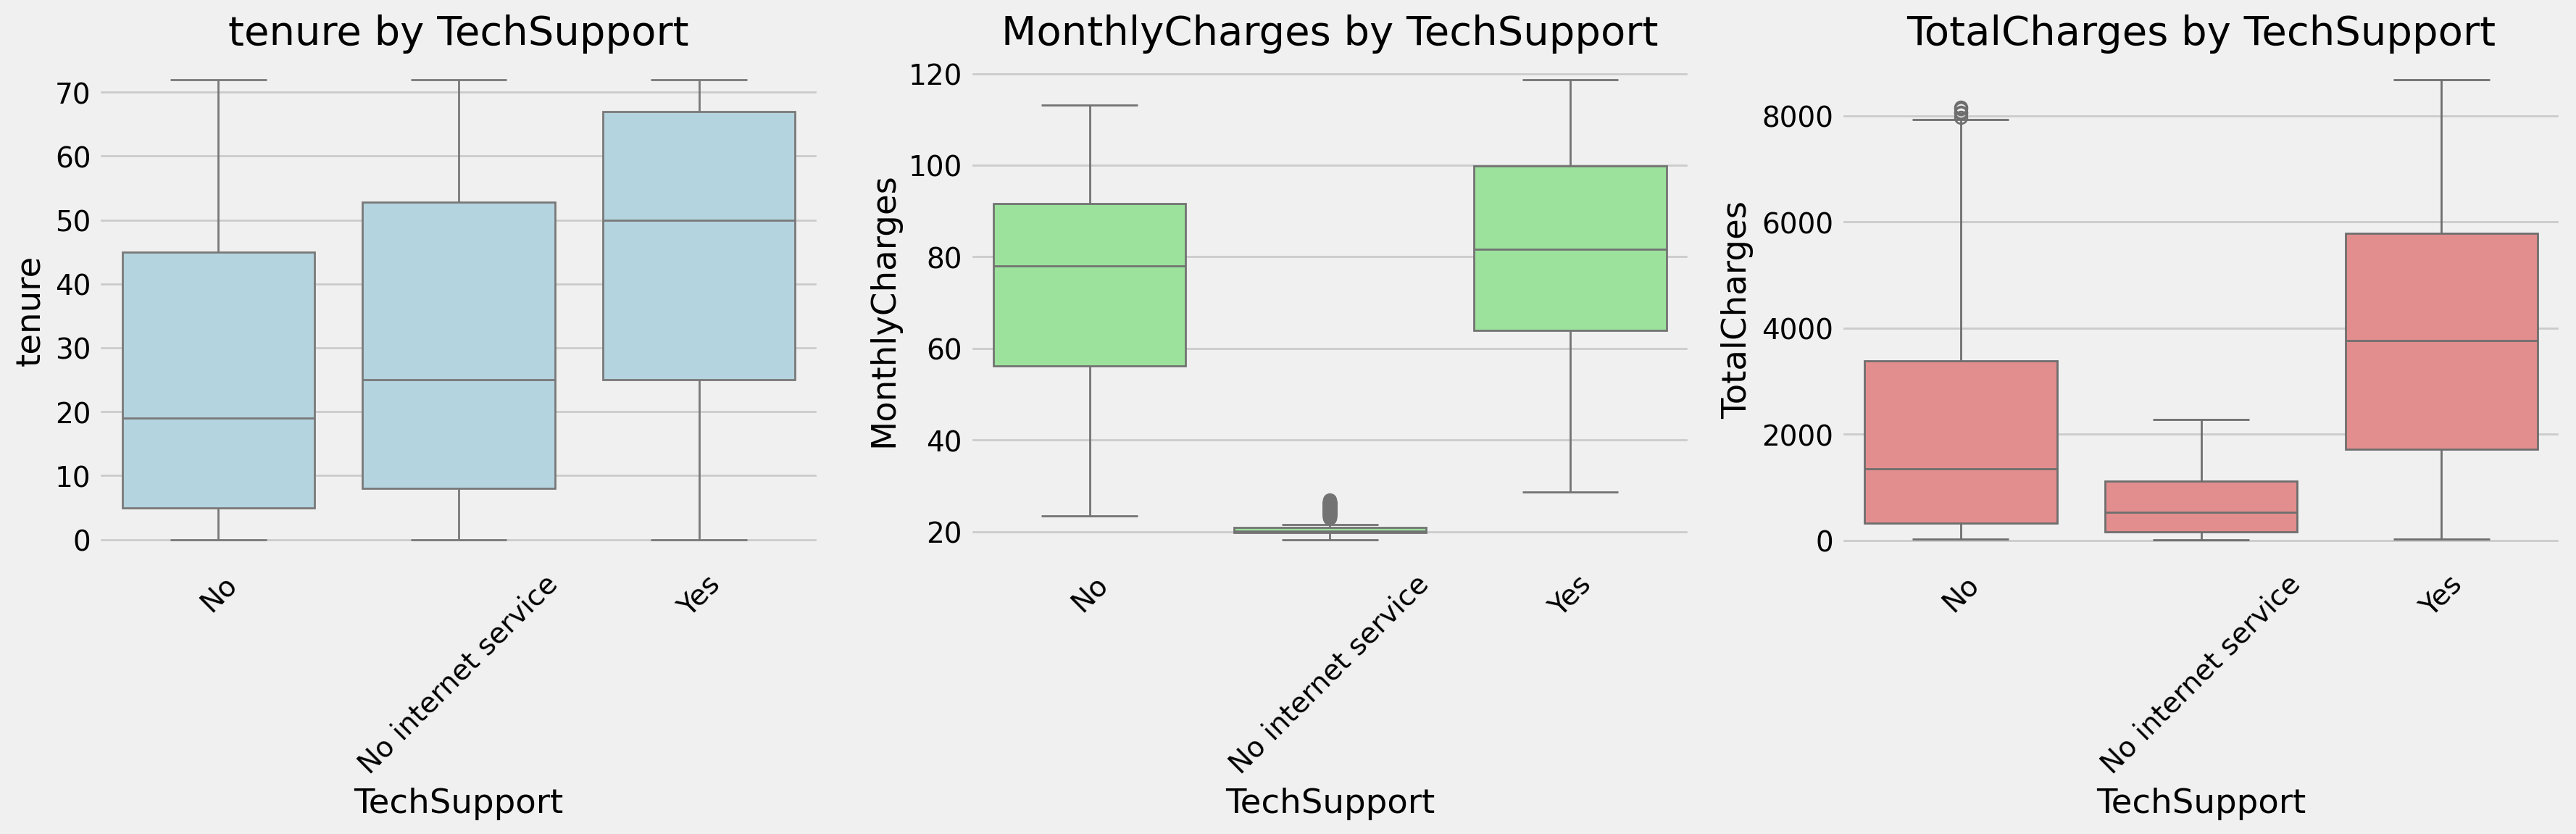

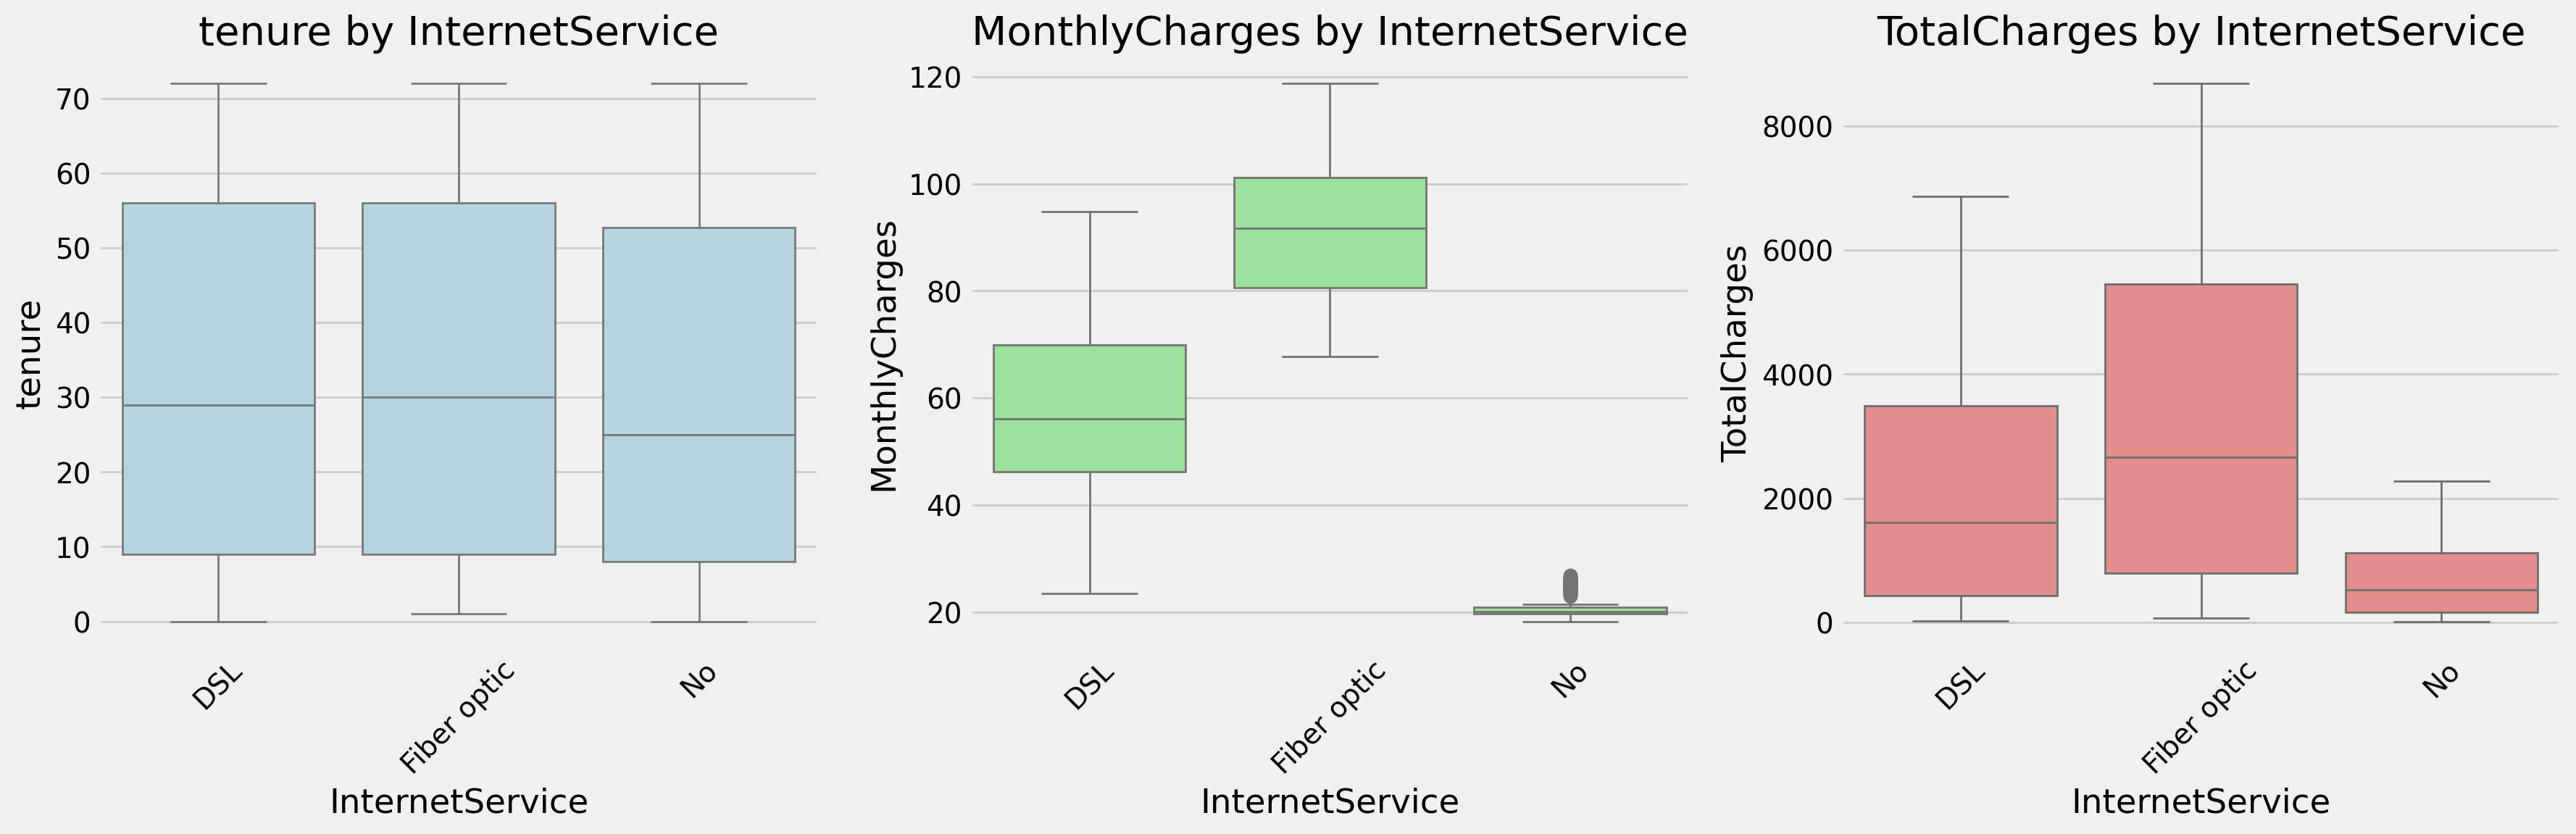

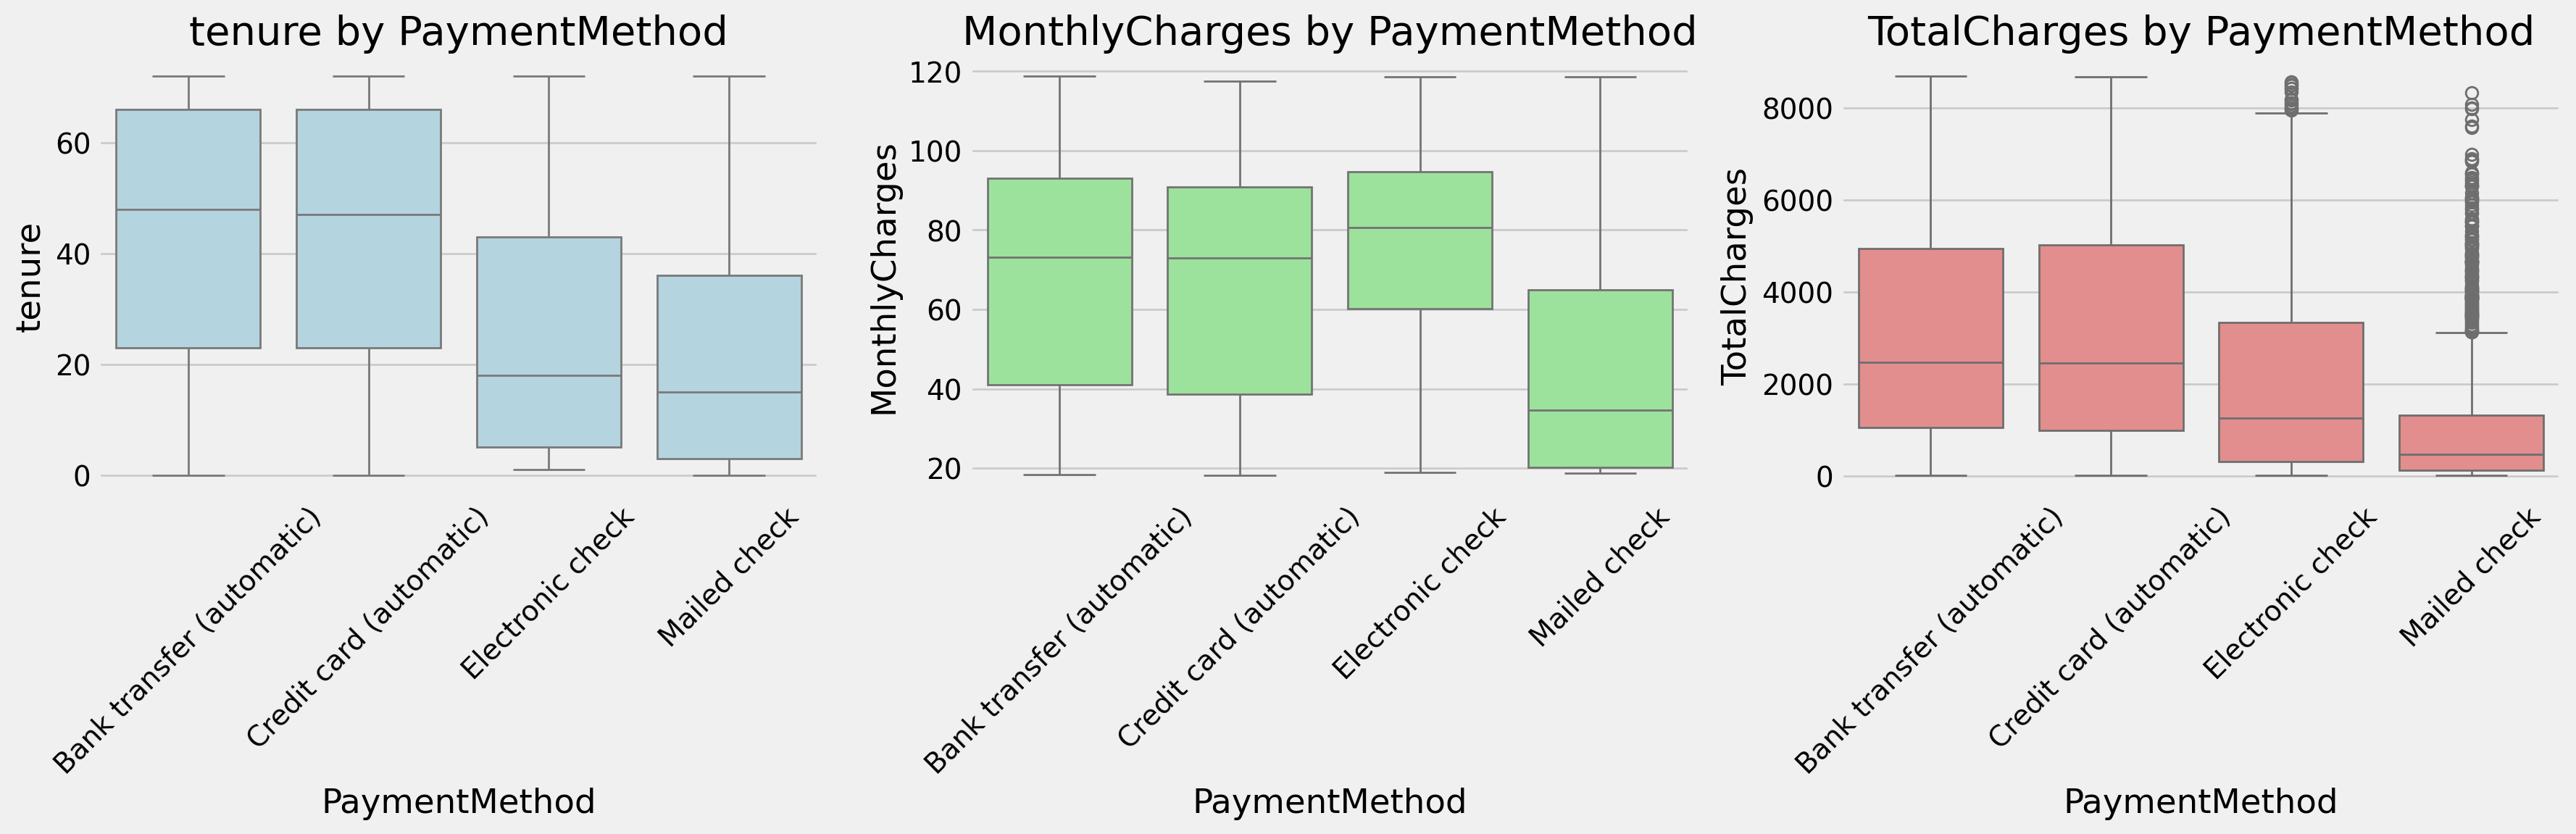

In [ ]:
colors = ['lightblue', 'lightgreen', 'lightcoral']

for cat_col in important_category_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, num_col in enumerate(numerical_cols):
        sns.boxplot(x=cat_col, y=num_col, data=df, ax=axes[i], color=colors[i])
        axes[i].set_title(f'{num_col} by {cat_col}')
        axes[i].set_xlabel(cat_col)
        axes[i].set_ylabel(num_col)
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

### 박스플롯 결과 요약

1. **Contract**:
   - **Tenure**: Two year 계약을 가진 고객들의 가입 기간이 가장 길고, month-to-month 계약을 가진 고객들의 가입 기간이 가장 짧음.
   - **MonthlyCharges**: Month-to-month 계약 고객들이 상대적으로 높은 월 요금을 지불하고, Two year 계약 고객들이 가장 낮은 요금을 지불.
   - **TotalCharges**: Two year 계약을 가진 고객들의 총 요금이 가장 높고, month-to-month 계약 고객들의 총 요금은 가장 낮음.

2. **OnlineSecurity**:
   - **Tenure**: 온라인 보안 서비스를 사용하는 고객들의 가입 기간이 상대적으로 더 긴 경향.
   - **MonthlyCharges**: 온라인 보안 서비스를 사용하지 않는 고객들이 상대적으로 더 높은 월 요금을 지불.
   - **TotalCharges**: 온라인 보안 서비스를 사용하는 고객들의 총 요금이 더 높음.

3. **TechSupport**:
   - **Tenure**: 기술 지원을 사용하는 고객들의 가입 기간이 더 긴 경향.
   - **MonthlyCharges**: 기술 지원을 받지 않는 고객들이 상대적으로 더 높은 월 요금을 지불.
   - **TotalCharges**: 기술 지원을 사용하는 고객들의 총 요금이 더 높음.

4. **InternetService**:
   - **Tenure**: Fiber optic을 사용하는 고객들의 가입 기간이 가장 짧고, DSL을 사용하는 고객들이 더 긴 가입 기간을 가짐.
   - **MonthlyCharges**: Fiber optic을 사용하는 고객들이 더 높은 월 요금을 지불.
   - **TotalCharges**: Fiber optic을 사용하는 고객들의 총 요금이 상대적으로 더 높음.

5. **PaymentMethod**:
   - **Tenure**: 자동 이체 방식으로 결제하는 고객들의 가입 기간이 상대적으로 길고, Mailed check 방식으로 결제하는 고객들이 더 짧음.
   - **MonthlyCharges**: Mailed check 방식으로 결제하는 고객들의 월 요금이 더 낮음.
   - **TotalCharges**: Mailed check 방식으로 결제하는 고객들의 총 요금이 더 낮음.


### 클러스터링

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
cluster_df = df.apply(lambda x: pd.factorize(x)[0]).drop(['customerID', 'Churn', 'Churn_numeric'], axis=1)
cluster_df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0       0              0        0           0       0             0              0                0               0             0                 0            0            0                0         0                 0              0               0             0
1       1              0        1           0       1             1              1                0               1             1                 1            0            0                0         1                 1              1               1             1
2       1              0        1           0       2             1              1                0               1             0                 0            0            0                0         0                 0              1               2             2
3       1              0        1           0       3             0              0                0               1             1                 1            1            0                0         1                 1              2               3             3
4       0              0        1           0       2             1              1                1               0             1                 0            0            0                0         0                 0              0               4             4

In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            7043 non-null   int64
 1   SeniorCitizen     7043 non-null   int64
 2   Partner           7043 non-null   int64
 3   Dependents        7043 non-null   int64
 4   tenure            7043 non-null   int64
 5   PhoneService      7043 non-null   int64
 6   MultipleLines     7043 non-null   int64
 7   InternetService   7043 non-null   int64
 8   OnlineSecurity    7043 non-null   int64
 9   OnlineBackup      7043 non-null   int64
 10  DeviceProtection  7043 non-null   int64
 11  TechSupport       7043 non-null   int64
 12  StreamingTV       7043 non-null   int64
 13  StreamingMovies   7043 non-null   int64
 14  Contract          7043 non-null   int64
 15  PaperlessBilling  7043 non-null   int64
 16  PaymentMethod     7043 non-null   int64
 17  MonthlyCharges    7043 non-null  

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scale = StandardScaler()
scaled_df = pd.DataFrame(scale.fit_transform(cluster_df), columns=cluster_df.columns)

# 정규화된 데이터 출력
scaled_df.head()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0 -1.009559      -0.439916 -1.034530   -0.654012 -1.429631     -3.054010      -2.061669        -1.183234       -0.903589     -1.180777         -0.998016    -0.909172    -1.071457         -1.07821 -0.828207         -0.829798      -1.145198       -1.374349     -1.667320
1  0.990532      -0.439916  0.966622   -0.654012 -1.382789      0.327438      -0.505697        -1.183234        0.351386      0.173655          0.286059    -0.909172    -1.071457         -1.07821  0.371271          1.205113      -0.274744       -1.371920     -1.666793
2  0.990532      -0.439916  0.966622   -0.654012 -1.335948      0.327438      -0.505697        -1.183234        0.351386     -1.180777         -0.998016    -0.909172    -1.071457         -1.07821 -0.828207         -0.829798      -0.274744       -1.369490     -1.666265
3  0.990532      -0.439916  0.966622   -0.654012 -1.289107     -3.054010      -2.061669        -1.183234        0.351386      0.173655          0.286059     0.347362    -1.071457         -1.07821  0.371271          1.205113       0.595711       -1.367061     -1.665737
4 -1.009559      -0.439916  0.966622   -0.654012 -1.335948      0.327438      -0.505697         0.172250       -0.903589      0.173655         -0.998016    -0.909172    -1.071457         -1.07821 -0.828207         -0.829798      -1.145198       -1.364632     -1.665210

In [ ]:
scaled_df.head()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0 -1.009559      -0.439916 -1.034530   -0.654012 -1.429631     -3.054010      -2.061669        -1.183234       -0.903589     -1.180777         -0.998016    -0.909172    -1.071457         -1.07821 -0.828207         -0.829798      -1.145198       -1.374349     -1.667320
1  0.990532      -0.439916  0.966622   -0.654012 -1.382789      0.327438      -0.505697        -1.183234        0.351386      0.173655          0.286059    -0.909172    -1.071457         -1.07821  0.371271          1.205113      -0.274744       -1.371920     -1.666793
2  0.990532      -0.439916  0.966622   -0.654012 -1.335948      0.327438      -0.505697        -1.183234        0.351386     -1.180777         -0.998016    -0.909172    -1.071457         -1.07821 -0.828207         -0.829798      -0.274744       -1.369490     -1.666265
3  0.990532      -0.439916  0.966622   -0.654012 -1.289107     -3.054010      -2.061669        -1.183234        0.351386      0.173655          0.286059     0.347362    -1.071457         -1.07821  0.371271          1.205113       0.595711       -1.367061     -1.665737
4 -1.009559      -0.439916  0.966622   -0.654012 -1.335948      0.327438      -0.505697         0.172250       -0.903589      0.173655         -0.998016    -0.909172    -1.071457         -1.07821 -0.828207         -0.829798      -1.145198       -1.364632     -1.665210

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

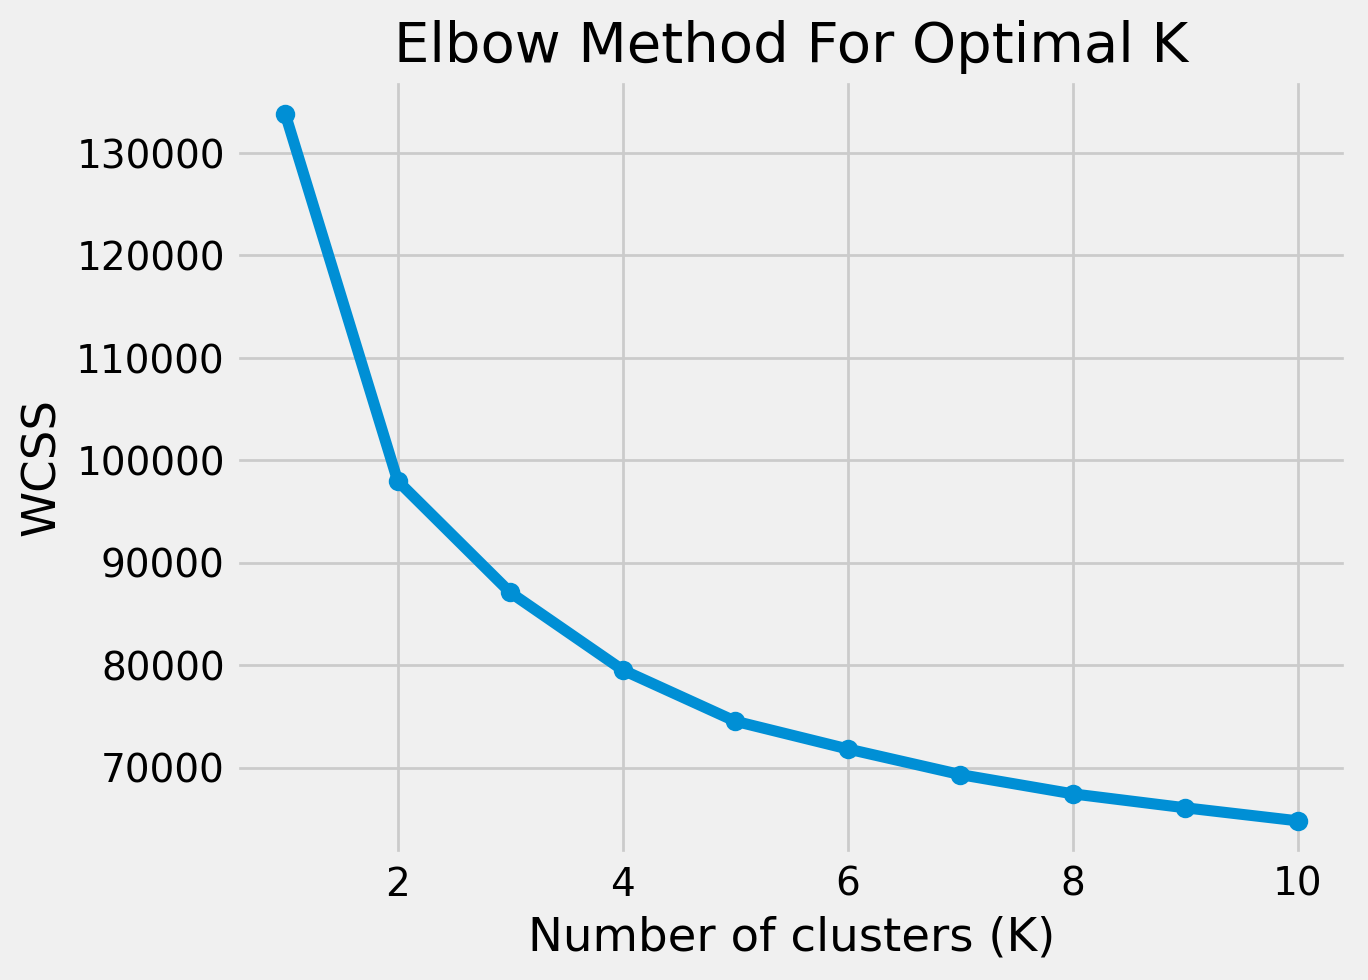

In [ ]:
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)

# K 값에 따른 WCSS 계산
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=52)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # WCSS 값 저장

# 엘보우 그래프 그리기
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# K = 3으로 K-means 모델 생성
kmeans = KMeans(n_clusters=3, random_state=52)

# 데이터를 K-means로 클러스터링
kmeans.fit(scaled_df)

# 각 데이터 포인트의 클러스터 할당 (레이블)
cluster_labels = kmeans.labels_

# 클러스터 레이블을 원본 데이터에 추가 (선택 사항)
scaled_df['Cluster'] = cluster_labels

# 클러스터링 결과 확인 (상위 5개)
print(scaled_df.head())

# 클러스터의 중심 (centroids) 확인
print("클러스터 중심:", kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Cluster
0 -1.009559      -0.439916 -1.034530   -0.654012 -1.429631     -3.054010      -2.061669        -1.183234       -0.903589     -1.180777         -0.998016    -0.909172    -1.071457         -1.07821 -0.828207         -0.829798      -1.145198       -1.374349     -1.667320        0
1  0.990532      -0.439916  0.966622   -0.654012 -1.382789      0.327438      -0.505697        -1.183234        0.351386      0.173655          0.286059    -0.909172    -1.071457         -1.07821  0.371271          1.205113      -0.274744       -1.371920     -1.666793        2
2  0.990532      -0.439916  0.966622   -0.654012 -1.335948      0.327438      -0.505697        -1.183234        0.351386     -1.180777         -0.998016    -0.909172 

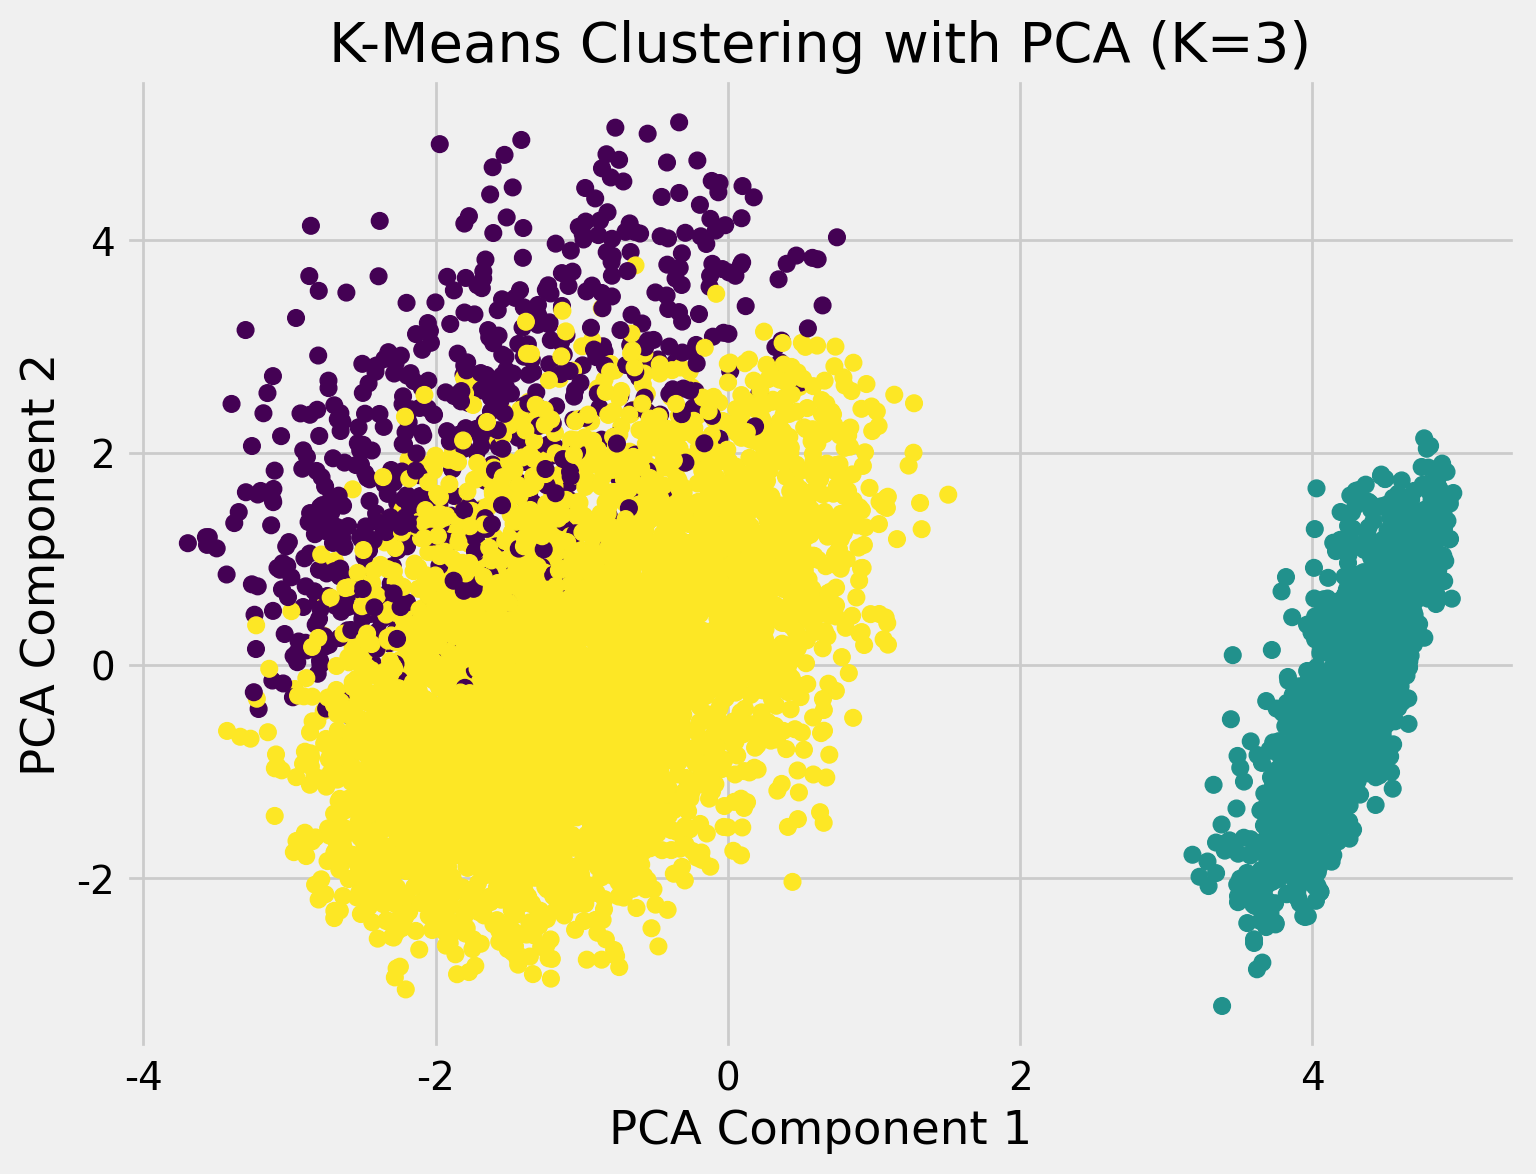

In [ ]:
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_df.drop(columns=['Cluster']))

# 차원 축소된 데이터를 이용해 시각화
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=scaled_df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA (K=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# scaled_df에 원본 데이터의 'Churn' 컬럼을 추가
scaled_df['Churn'] = df['Churn']

# 클러스터별 Churn 비율 계산
churn_rate_by_cluster = scaled_df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack()

# 결과 출력
print(churn_rate_by_cluster)

Churn          No       Yes
Cluster                    
0        0.750733  0.249267
1        0.925950  0.074050
2        0.671975  0.328025


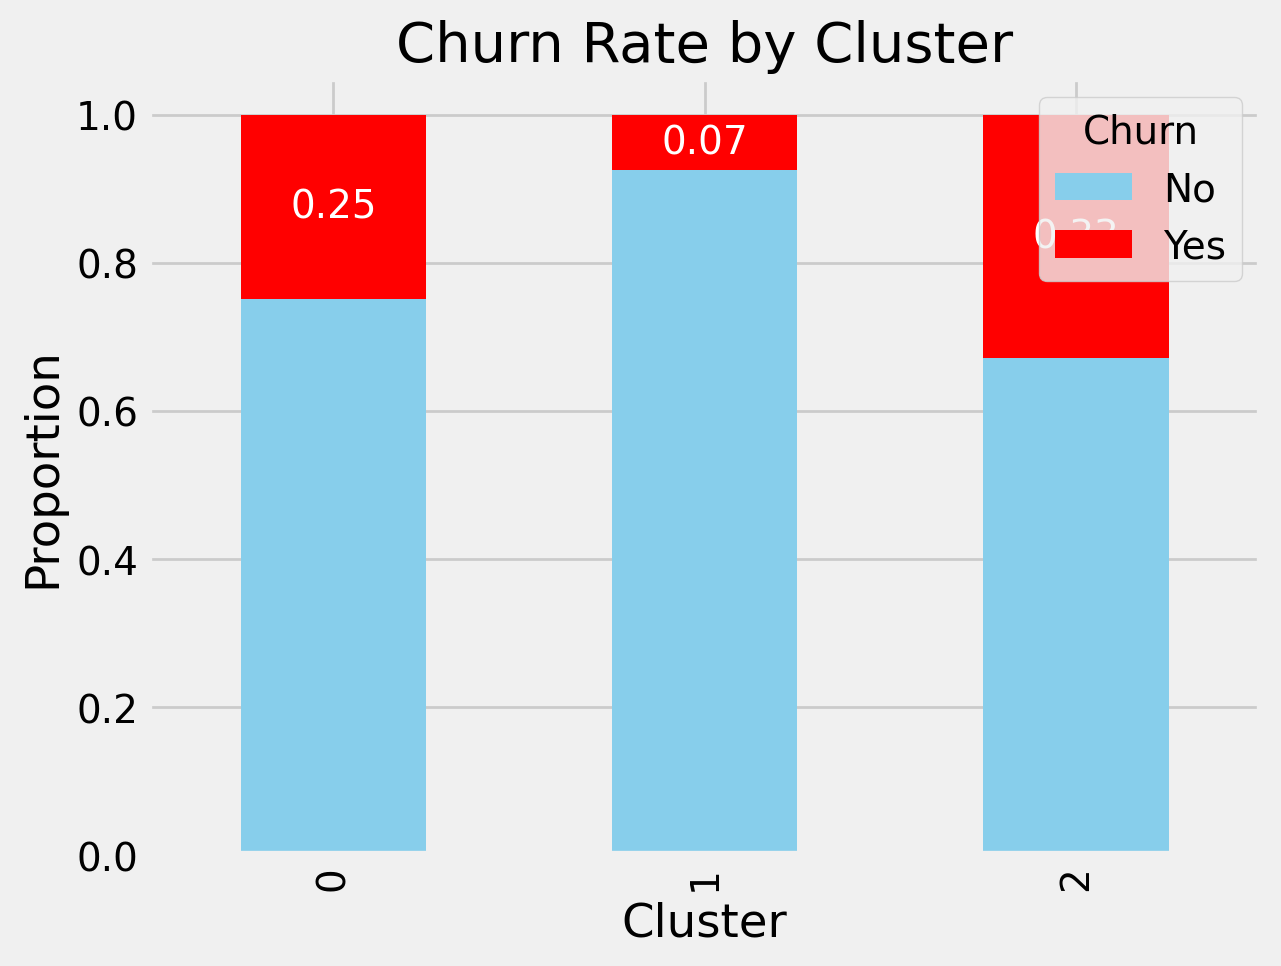

In [ ]:
# 클러스터별 Churn 비율을 바차트로 시각화
ax = churn_rate_by_cluster.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

plt.title('Churn Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')

# 이탈한 고객 (Churn = 1, 빨간색 막대)
for i, container in enumerate(ax.containers):
    if i == 1:
        ax.bar_label(container, fmt='%.2f', label_type='center', color='white')

plt.show()

In [ ]:
# 클러스터 2에 속한 고객들 필터링
cluster_2_customers = df[scaled_df['Cluster'] == 2]

# 클러스터 2에 속한 고객 데이터 확인 (상위 5개)
cluster_2_customers.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling            PaymentMethod  MonthlyCharges  TotalCharges Churn Churn_numeric
1  5575-GNVDE    Male             0      No         No      34          Yes            No             DSL            Yes           No              Yes          No          No              No        One year               No             Mailed check           56.95       1889.50    No             0
2  3668-QPYBK    Male             0      No         No       2          Yes            No             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes             Mailed check           53.85        108.15   Yes             1
4  9237-HQITU  Female             0      No         No       2          Yes            No     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes         Electronic check           70.70        151.65   Yes             1
5  9305-CDSKC  Female             0      No         No       8          Yes           Yes     Fiber optic             No           No              Yes          No         Yes             Yes  Month-to-month              Yes         Electronic check           99.65        820.50   Yes             1
6  1452-KIOVK    Male             0      No        Yes      22          Yes           Yes     Fiber optic             No          Yes               No          No         Yes              No  Month-to-month              Yes  Credit card (automatic)           89.10       1949.40    No             0

In [ ]:
import plotly.express as px

# 1. 범주형 컬럼에 대한 시각화
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']

# 클러스터 2 고객 데이터에서 범주형 컬럼의 비율 계산
for col in categorical_columns:
    value_counts = cluster_2_customers[col].value_counts(normalize=True).reset_index()
    value_counts.columns = [col, 'proportion']

    fig = px.bar(
        value_counts,
        x=col,
        y='proportion',
        title=f'Cluster 2 - {col} Distribution',
        labels={col: col, 'proportion': 'Proportion'},
        color=col,
        height=400
    )
    fig.show()

# 2. 연속형 컬럼에 대한 시각화 (평균 값)
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
mean_values = cluster_2_customers[numeric_columns].mean().reset_index()
mean_values.columns = ['Feature', 'Mean']

fig = px.bar(
    mean_values,
    x='Feature',
    y='Mean',
    title='Cluster 2 - Numeric Columns Mean Values',
    labels={'Feature': 'Feature', 'Mean': 'Mean Value'},
    height=400
)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### 클러스터 2 분석 결과 및 결론

#### 범주형 컬럼 분석:
- **인터넷 서비스(InternetService)**: 64.0%의 고객이 Fiber optic을 사용하고 있으며, 나머지 36.0%는 DSL을 사용 중임.
- **온라인 보안(OnlineSecurity)**: 64.1%의 고객이 온라인 보안을 사용하지 않음.
- **온라인 백업(OnlineBackup)**: 55.7%의 고객이 온라인 백업 서비스를 사용하지 않음.
- **기기 보호(DeviceProtection)**: 56.2%의 고객이 기기 보호 서비스를 사용하지 않음.
- **기술 지원(TechSupport)**: 63.7%의 고객이 기술 지원 서비스를 사용하지 않음.
- **계약 유형(Contract)**: 61.5%의 고객이 월 단위 계약을 사용하고 있으며, 이는 이탈율이 높은 주 원인이 될 수 있음.
- **결제 방식(PaymentMethod)**: 전자 수표 사용 고객이 41.7%로 가장 많음.

#### 연속형 컬럼 분석:
- **가입 기간(tenure)**: 평균 가입 기간이 33개월로, 상대적으로 중간 정도의 기간을 유지하고 있음.
- **월 요금(MonthlyCharges)**: 월 평균 요금이 81.76달러로, 비교적 높은 요금제를 사용하는 고객들이 포함됨.
- **총 지출(TotalCharges)**: 평균 총 지출이 2902.09달러로, 기존 고객으로서 상당한 지출을 한 상태임.

#### 결론:
- **Fiber optic 사용 고객(64%)**이 많지만, **온라인 보안(64.1%)**, **기술 지원(63.7%)**, **기기 보호(56.2%)** 같은 추가 서비스를 많이 사용하지 않음. 이들은 고속 인터넷을 사용하는 만큼, 추가 서비스로 만족도를 높일 기회가 있음.
- **월 단위 계약(61.5%)**을 사용하는 고객이 많아 이탈 가능성이 큼.
- **전자 수표 결제(41.7%)** 사용 고객이 많아, 결제의 불편함이 이탈로 이어질 수 있음.
- **높은 월 요금(81.76달러)**을 지불하는 고객들이 비용에 민감할 수 있음.

#### 전략:
1. **장기 계약 혜택** 제공으로 월 단위 계약 고객을 장기 고객으로 유도.
2. **패키지 서비스** (온라인 보안, 기술 지원, 기기 보호) 제안으로 추가 서비스 사용 촉진.
3. **자동 결제** 등 간편한 결제 방법으로 전자 수표 사용자의 이탈 방지.
4. **요금 할인** 또는 **보상 프로그램**으로 높은 요금에 대한 부담 경감.


이러한 전략을 통해 클러스터 2의 고객 이탈율을 줄이고, 서비스 만족도를 높일 수 있습니다.


### EDA페이지시각화

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
# 삭제할 피처 목록
columns_to_drop = ['MultipleLines', 'customerID']

# 해당 피처들을 데이터프레임에서 삭제
df = df.drop(columns=columns_to_drop)

# 삭제 후 데이터프레임 확인
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges Churn Churn_numeric
0  Female             0     Yes         No       1           No             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85         29.85    No             0
1    Male             0      No         No      34          Yes             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.50    No             0
2    Male             0      No         No       2          Yes             DSL            Yes          Yes               No          No          No              No  Month-to-month              Yes               Mailed check           53.85        108.15   Yes             1
3    Male             0      No         No      45           No             DSL            Yes           No              Yes         Yes          No              No        One year               No  Bank transfer (automatic)           42.30       1840.75    No             0
4  Female             0      No         No       2          Yes     Fiber optic             No           No               No          No          No              No  Month-to-month              Yes           Electronic check           70.70        151.65   Yes             1

In [ ]:
from scipy.stats import pearsonr
# Cramér's V 계산 함수 (범주형 변수와 Churn 간)
def cramers_v(col1, col2, df):
    confusion_matrix = pd.crosstab(df[col1], df[col2])
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# 피어슨 상관계수 계산 함수 (수치형 변수와 Churn 간)
def pearson_corr(col1, col2, df):
    return pearsonr(df[col1], df[col2])[0]

# 범주형 피처 목록 (Churn 제외)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.drop(['Churn', 'Churn_numeric'])

# 수치형 피처 목록
numerical_cols = df.select_dtypes(include=['number'])

# 범주형 피처와 Churn 간의 Cramér's V 상관관계 계산
cramers_v_results = {col: cramers_v('Churn', col, df) for col in categorical_cols}

# 수치형 피처와 Churn 간의 피어슨 상관계수 계산
pearson_corr_results = {col: pearson_corr(col, 'Churn_numeric', df) for col in numerical_cols}

# Cramér's V 상관관계 (범주형 변수) 결과를 내림차순으로 정렬하여 출력
print("Cramér's V 상관관계 (범주형 변수):")
for col, value in sorted(cramers_v_results.items(), key=lambda x: x[1], reverse=True):
    print(f'{col}: {value:.4f}')

# 피어슨 상관계수 (수치형 변수) 결과를 내림차순으로 정렬하여 출력
print("\n피어슨 상관계수 (수치형 변수):")
for col, value in sorted(pearson_corr_results.items(), key=lambda x: x[1], reverse=True):
    print(f'{col}: {value:.4f}')

Cramér's V 상관관계 (범주형 변수):
Contract: 0.4101
OnlineSecurity: 0.3474
TechSupport: 0.3429
InternetService: 0.3225
PaymentMethod: 0.3034
OnlineBackup: 0.2923
DeviceProtection: 0.2816
StreamingMovies: 0.2310
StreamingTV: 0.2305
PaperlessBilling: 0.1915
Dependents: 0.1639
SeniorCitizen: 0.1505
Partner: 0.1501
PhoneService: 0.0114
gender: 0.0083

피어슨 상관계수 (수치형 변수):
MonthlyCharges: 0.1934
TotalCharges: -0.1994
tenure: -0.3522


In [ ]:
# Cramér's V 상관관계와 피어슨 상관계수를 하나의 딕셔너리로 결합
combined_results = {**cramers_v_results, **pearson_corr_results}

# 절대값 기준으로 상위 5개 피처 선택
top_7_features = sorted(combined_results.items(), key=lambda x: abs(x[1]), reverse=True)[:7]

# 결과 출력
print("가장 중요한 피처 7개:")
for col, value in top_7_features:
    print(f'{col}: {value:.4f}')

가장 중요한 피처 7개:
Contract: 0.4101
tenure: -0.3522
OnlineSecurity: 0.3474
TechSupport: 0.3429
InternetService: 0.3225
PaymentMethod: 0.3034
OnlineBackup: 0.2923


In [ ]:
import plotly.express as px

features = list(cramers_v_results.keys()) + list(pearson_corr_results.keys())
correlations = list(cramers_v_results.values()) + list(pearson_corr_results.values())

abs_correlations = [abs(val) for val in correlations]

# TreeMap 시각화
fig = px.treemap(
    names=features,
    parents=[""] * len(features),  # 모든 피처가 최상위에 위치
    values=abs_correlations,  # 절대값을 크기로 사용
    color=correlations,
    color_continuous_scale='RdBu',
    title="vs Churn 상관관계 TreeMap 시각화",
    range_color=[-1, 1]
)

# 박스 안에 텍스트 표시 (피처 이름과 상관계수)
fig.update_traces(texttemplate='%{label}<br>%{value:.4f}', textinfo='label+value')

fig.update_layout(
    height=600,
    width=800,
    title_x=0.5
)

fig.show()

In [ ]:
features = list(cramers_v_results.keys()) + list(pearson_corr_results.keys())
correlations = list(cramers_v_results.values()) + list(pearson_corr_results.values())

# 상관계수 절대값을 기준으로 상위 15개 추출
abs_correlations = [abs(val) for val in correlations]
sorted_data = sorted(zip(abs_correlations, features, correlations), reverse=True)  # 절대값 기준으로 정렬

# 상위 15개의 피처와 상관계수 추출
top_15 = sorted_data[:15]
others = sorted_data[15:]

# 상위 10개의 피처와 나머지 피처 합계
top_15_features = [item[1] for item in top_15] + ['Others']
top_15_values = [item[0] for item in top_15] + [sum(item[0] for item in others)]

fig = px.pie(
    names=top_15_features,
    values=top_15_values,  # 절대값을 크기로 사용
    title="vs Chrun 상관관계 파이차트 시각화",
    hole=0.3
)

# 퍼센트 옆에 피처 이름 추가
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    height=600,
    width=800,
    paper_bgcolor='white'
)

fig.show()

In [ ]:
# 데이터프레임으로 변환 (피처와 상관계수)
data = pd.DataFrame({
    'Feature': features,
    'Correlation': correlations
})

data = data.sort_values(by='Correlation', key=abs, ascending=False)

# 바 차트 시각화
fig = px.bar(
    data,
    x='Feature',
    y='Correlation',
    color='Correlation',
    color_continuous_scale='RdBu',
    title='Churn과의 상관관계 Bar Chart',
    labels={'Correlation': 'Correlation with Churn', 'Feature': 'Feature'}
)

fig.update_layout(
    height=600,
    width=1000,
    xaxis_title="Feature",
    yaxis_title="Correlation with Churn",
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

# 파생 피쳐 생성

In [ ]:
# 1. 고객이 사용 중인 서비스 개수
df['Total_Service_Count'] = (df['PhoneService'] == 'Yes').astype(int) + \
                            (df['MultipleLines'] == 'Yes').astype(int) + \
                            (df['InternetService'] != 'No').astype(int) + \
                            (df['OnlineSecurity'] == 'Yes').astype(int) + \
                            (df['OnlineBackup'] == 'Yes').astype(int) + \
                            (df['DeviceProtection'] == 'Yes').astype(int) + \
                            (df['TechSupport'] == 'Yes').astype(int) + \
                            (df['StreamingTV'] == 'Yes').astype(int) + \
                            (df['StreamingMovies'] == 'Yes').astype(int)

# 2. 서비스당 월 청구 금액
df['MonthlyCharges_Per_Service'] = df['MonthlyCharges'] / df['Total_Service_Count']

# 3. 인터넷 서비스 유형
df['Internet_Service_Type'] = df['InternetService'].apply(lambda x: x if x != 'No' else 'No internet')

# 4. 계약 기간을 월로 변환
df['Contract_Length'] = df['Contract'].apply(lambda x: 1 if x == 'Month-to-month' else (12 if x == 'One year' else 24))

# 5. 시니어 고객과 배우자 여부 결합
df['SeniorCitizen_and_Partner'] = df.apply(lambda x: 'Senior_with_Partner' if x['SeniorCitizen'] == 1 and x['Partner'] == 'Yes' else 'Other', axis=1)

# 6. 온라인 보안과 백업 서비스 둘 다 사용 여부
df['Has_Online_Security_and_Backup'] = df.apply(lambda x: 'Yes' if x['OnlineSecurity'] == 'Yes' and x['OnlineBackup'] == 'Yes' else 'No', axis=1)

# 7. 인터넷 서비스 미사용 여부
df['No_Internet_Service'] = df['InternetService'].apply(lambda x: 'Yes' if x == 'No' else 'No')

# 8. 계약과 종이 없는 청구서 결합
df['Contract_and_Paperless'] = df.apply(lambda x: f"{x['Contract']}_{x['PaperlessBilling']}", axis=1)

# 9. 월 청구 금액이 높고 Fiber optic 서비스 사용 여부
df['High_MonthlyCharges_and_FiberOptic'] = df.apply(lambda x: 'Yes' if x['MonthlyCharges'] > df['MonthlyCharges'].median() and x['InternetService'] == 'Fiber optic' else 'No', axis=1)

# 10. 기술 지원과 디바이스 보호 서비스 모두 사용 여부
df['TechSupport_and_DeviceProtection'] = df.apply(lambda x: 'Yes' if x['TechSupport'] == 'Yes' and x['DeviceProtection'] == 'Yes' else 'No', axis=1)

### 새롭게 생성한 주요 피처들

1. **`Total_Service_Count`**:
   - **설명**: 고객이 사용하고 있는 서비스의 총 개수를 계산한 변수입니다. 전화 서비스, 인터넷 서비스, 온라인 보안 등 여러 서비스의 사용 여부에 따라 이 값이 증가합니다. 다양한 서비스를 사용하는 고객은 이탈률이 낮을 가능성이 큽니다.

2. **`MonthlyCharges_Per_Service`**:
   - **설명**: 고객이 사용하는 서비스의 개수에 따른 평균 월 요금을 계산한 변수입니다. `MonthlyCharges`를 `Total_Service_Count`로 나누어 계산되며, 한 개의 서비스당 청구되는 금액을 나타냅니다. 이 값이 높으면 고객 이탈 가능성이 높을 수 있습니다.

3. **`Internet_Service_Type`**:
   - **설명**: 고객이 사용하는 인터넷 서비스의 종류를 나타내는 변수입니다. `DSL`, `Fiber optic`, `No internet` 세 가지 값으로 분류되며, 인터넷 서비스 유형에 따른 이탈 패턴을 분석하는 데 유용합니다.

4. **`Contract_Length`**:
   - **설명**: 고객의 계약 유형을 기간으로 변환한 변수입니다. `Month-to-month`는 1, `One year`는 12, `Two year`는 24로 설정하여 계약 기간이 길수록 이탈 가능성이 낮음을 반영합니다.

5. **`SeniorCitizen_and_Partner`**:
   - **설명**: 시니어 고객이 배우자와 함께 서비스를 이용하는지 여부를 나타내는 변수입니다. 고령자이고 배우자가 있는 경우, 이탈 가능성이 다를 수 있으므로 이 조합을 고려한 변수입니다.

6. **`Has_Online_Security_and_Backup`**:
   - **설명**: 온라인 보안 서비스와 백업 서비스를 모두 사용하는 고객을 구분하는 변수입니다. 이 두 서비스를 모두 사용하는 고객은 더 충성도가 높을 가능성이 있습니다.

7. **`No_Internet_Service`**:
   - **설명**: 인터넷 서비스를 사용하지 않는 고객을 구분하는 변수입니다. 이탈 가능성에 영향을 미칠 수 있으며, 해당 값은 'No'로 설정된 고객을 구분합니다.

8. **`Contract_and_Paperless`**:
   - **설명**: 계약 기간과 종이 없는 청구서 사용 여부를 결합한 변수입니다. 계약이 길면서 종이 없는 청구서를 사용하는 고객의 이탈률 패턴을 파악하는 데 유용합니다.

9. **`High_MonthlyCharges_and_FiberOptic`**:
   - **설명**: 월 청구 금액이 높고, `Fiber optic` 서비스를 사용하는 고객을 구분하는 변수입니다. 이 조합은 고가 서비스를 사용하는 고객의 이탈률을 분석하는 데 유용합니다.

10. **`TechSupport_and_DeviceProtection`**:
    - **설명**: 기술 지원과 디바이스 보호 서비스를 모두 사용하는 고객을 구분하는 변수입니다. 이 두 서비스를 사용하는 고객은 이탈률이 낮을 수 있습니다.
